<a href="https://colab.research.google.com/github/ankitk2109/Covid_Evolution_Using_Incremental_ML/blob/main/Incremental_learning_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid Dataset

**Required Dataset features and target**

The dataset has 53 columns; 1 to represent the country, 1 to represent the day (it will be an integer), 50 floats to represent the positive cases of the 50 previous days, and 1 column to represent the output that is the average of a full week of cases.

![required_features.jpg](https://drive.google.com/uc?id=1smUwSHRwMT8h-M8kjG3ymmxdhQbe1HvY)


In [3]:
# CHANGED BY ASC.

# Installing Incremental learner: Scikit-Multiflow
!pip install scikit-multiflow
!gdown https://drive.google.com/uc?id=1f5GgBqjAsTUFnubHODmfqn6qiNyDBqIw
!unzip /content/src.zip -d /content/src
!cp -r /content/src/src /content/
!rm -r /content/src/src

# Creating a seperate directory to store all csv's
! mkdir -p /content/csv_files
! mkdir -p /content/csv_files/processed_null
! mkdir -p /content/csv_files/processed
! mkdir -p /content/Result/exp1
! mkdir -p /content/Result/exp2
! mkdir -p /content/Result/exp1/runtime
! mkdir -p /content/Result/exp2/runtime
! mkdir -p /content/Result/exp1/summary
! mkdir -p /content/Result/exp2/summary
! mkdir -p /content/Plots
! mkdir -p /content/Plots/barplot
! mkdir -p /content/Plots/boxplots

# Download the zip file
"""
!zip -r /content/file.zip /content/csv_files
from google.colab import files
files.download("/content/file.zip")
"""

     |████████████████████████████████| 1.1MB 8.0MB/s 
Downloading...
From: https://drive.google.com/uc?id=1f5GgBqjAsTUFnubHODmfqn6qiNyDBqIw
To: /content/src.zip
100% 26.1k/26.1k [00:00<00:00, 10.1MB/s]
Archive:  /content/src.zip
  inflating: /content/src/src/_classification_performance_evaluator.py  
  inflating: /content/src/src/base_evaluator.py  
  inflating: /content/src/src/constants.py  
  inflating: /content/src/src/evaluate_prequential.py  
  inflating: /content/src/src/evaluation_data_buffer.py  
  inflating: /content/src/src/measure_collection.py  


'\n!zip -r /content/file.zip /content/csv_files\nfrom google.colab import files\nfiles.download("/content/file.zip")\n'

In [4]:
"""
# For Box plot: Run this only if manually uploaded the results
!unzip /content/Result.zip -d /content/Result
!cp -r /content/Result/content/Result /content/
!rm -r /content/Result/content/Result
!rm -r /content/Result/content

csv_processed_path = '/content/csv_files/processed'
csv_processed_with_null_path = '/content/csv_files/processed_null'
exp1_path = '/content/Result/exp1'
exp2_path = '/content/Result/exp2'
exp1_runtime_path = '/content/Result/exp1/runtime'
exp2_runtime_path = '/content/Result/exp2/runtime'
exp1_summary_path = '/content/Result/exp1/summary'
exp2_summary_path = '/content/Result/exp2/summary'
bar_plot_path = r'/content/Plots/barplot'
box_plot_path = r'/content/Plots/boxplots'

"""

"\n# For Box plot: Run this only if manually uploaded the results\n!unzip /content/Result.zip -d /content/Result\n!cp -r /content/Result/content/Result /content/\n!rm -r /content/Result/content/Result\n!rm -r /content/Result/content\n\ncsv_processed_path = '/content/csv_files/processed'\ncsv_processed_with_null_path = '/content/csv_files/processed_null'\nexp1_path = '/content/Result/exp1'\nexp2_path = '/content/Result/exp2'\nexp1_runtime_path = '/content/Result/exp1/runtime'\nexp2_runtime_path = '/content/Result/exp2/runtime'\nexp1_summary_path = '/content/Result/exp1/summary'\nexp2_summary_path = '/content/Result/exp2/summary'\nbar_plot_path = r'/content/Plots/barplot'\nbox_plot_path = r'/content/Plots/boxplots'\n\n"

In [5]:
#!pip uninstall keras
#!pip uninstall tensorflow

!pip install keras==2.3.1
!pip install tensorflow==2.1.0

     |████████████████████████████████| 378kB 11.2MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 421.8MB 25kB/s 
     |████████████████████████████████| 3.9MB 21.5MB/s 
     |████████████████████████████████| 450kB 47.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=a0f18bbe4289c06b3d8c146dfff1de7c532fb6eb8d3285270d23bbae89860af3
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Su

In [6]:
# General Imports 
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
import glob
import matplotlib.pyplot as plt
import matplotlib

# Imports for incremental learner
from skmultiflow.data import DataStream
from skmultiflow.trees import HoeffdingTreeRegressor
from src.evaluate_prequential import EvaluatePrequential
from skmultiflow.meta import AdaptiveRandomForestRegressor
from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

# Imports for static Learner
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from time import perf_counter as pc_timer
from functools import wraps

import keras
from keras.layers import Dense, Dropout, LSTM
#from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# For significance tests
from scipy.stats import normaltest
from scipy import stats 
# pd.set_option('display.max_colwidth', 500)

Using TensorFlow backend.


In [7]:
#url = 'https://drive.google.com/file/d/1e7NsptfEFLG2gGLykYlrzjNbDJLiRbGm/view?usp=sharing'
url = 'https://drive.google.com/file/d/1VH-nkePskK3gT6U5qkoOP-0hFT4beszC/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

dateRep  ...  Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0  02/11/2020  ...                                              3.767         
1  01/11/2020  ...                                              3.575         
2  31/10/2020  ...                                              3.554         
3  30/10/2020  ...                                              3.265         
4  29/10/2020  ...                                              2.942         

[5 rows x 12 columns]

In [8]:
# Grouping countries together for analysis
total_countries = df['countriesAndTerritories'].unique()
df_grouped = df.groupby('countriesAndTerritories')
pretrain_days = [30,60,90,120,150,180]  # List of pretrain days
valid_countries = []
decimal = 3  # Specify the scale of decimal places 
error_metrics = ['MAE','MAPE', 'RMSE']

# Setting path variables for both experiments
csv_processed_path = '/content/csv_files/processed'
csv_processed_with_null_path = '/content/csv_files/processed_null'
exp1_path = '/content/Result/exp1'
exp2_path = '/content/Result/exp2'
exp1_runtime_path = '/content/Result/exp1/runtime'
exp2_runtime_path = '/content/Result/exp2/runtime'
exp1_summary_path = '/content/Result/exp1/summary'
exp2_summary_path = '/content/Result/exp2/summary'
bar_plot_path = r'/content/Plots/barplot'
box_plot_path = r'/content/Plots/boxplots'


# Top countries to select for experiment 1
Number_of_countries = 25

## Feature Set with Individual Countries

In [9]:
# Create lags
def create_features_with_lags(df):
  for i in range(89, 0, -1):  # Loop in reverse order for creating ordered lags eg: cases_t-10, cases_t-9... cases_t-1. t=current cases
    df[f'cases_t-{i}'] = df['cases'].shift(i, axis=0)
  return df

In [10]:
# Pre-Processing dataset and saving them into csv's.
for country in total_countries:
  df = df_grouped.get_group(country)

  # Selecting required features
  df= df[['dateRep','cases','countriesAndTerritories']]

  # Rename features
  df.rename(columns={'countriesAndTerritories':'country', 'dateRep':'date'}, inplace=True)

  # Convert to date, sort and set index
  df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y')
  df.sort_values('date', inplace=True)
  df.set_index('date', inplace=True)

  # Adding feature
  df['day_no']= pd.Series([i for i in range(1,len(df)+1)], index=df.index)

  # Reordering features
  df = df[['day_no', 'country','cases']]

  # Adding features through lags
  df = create_features_with_lags(df)

  # Creating target with last 10 days cases
  df['target'] = df.iloc[:,[2]+[i*-1 for i in range(1,10)]].mean(axis=1)

  # Dropping mid columns
  drop_columns = list(df.loc[:,'cases_t-39':'cases_t-1'].columns)  #list(df.loc[:,'cases_t-38':'cases_t-1'].columns)
  df.drop(drop_columns, axis=1, inplace=True)

  # Country name
  filename = df['country'].unique()[0]

  # Saving file
  df.to_csv(f'{csv_processed_with_null_path}/{filename}.csv')

  # Dropping null records
  df.dropna(how='any', axis=0, inplace=True)

  # Valid countries that have records more than max of pretrain
  if len(df)>max(pretrain_days):
    valid_countries.append(country)  
    df.to_csv(f'{csv_processed_path}/{filename}.csv')
  
print('Done!')

Done!


## Total cases of top selected countries

In [11]:
# Added just for plots. Remove later
Number_of_countries = 25


In [12]:
# Replaces underscore from country names
def format_names(list_countries):
  updated_country_list = []
  for country_name in list_countries:
    updated_country_list.append(country_name.replace("_"," "))
  return updated_country_list

In [13]:
# A dictionary of all countries
dict_countries = Counter(valid_countries)

for country in valid_countries:
  dict_countries[country] = df_grouped.get_group(country)['cases'].sum()

# Select top_countries and order(Ascending/Decending) 
top_countries = sorted(dict_countries.items(), key=lambda dict_countries: dict_countries[1], reverse=True) [0:Number_of_countries]

# Creating dataframe of top selected countries
df_top_countries = pd.DataFrame.from_dict(dict(top_countries), orient='index', columns=['Total Cases'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


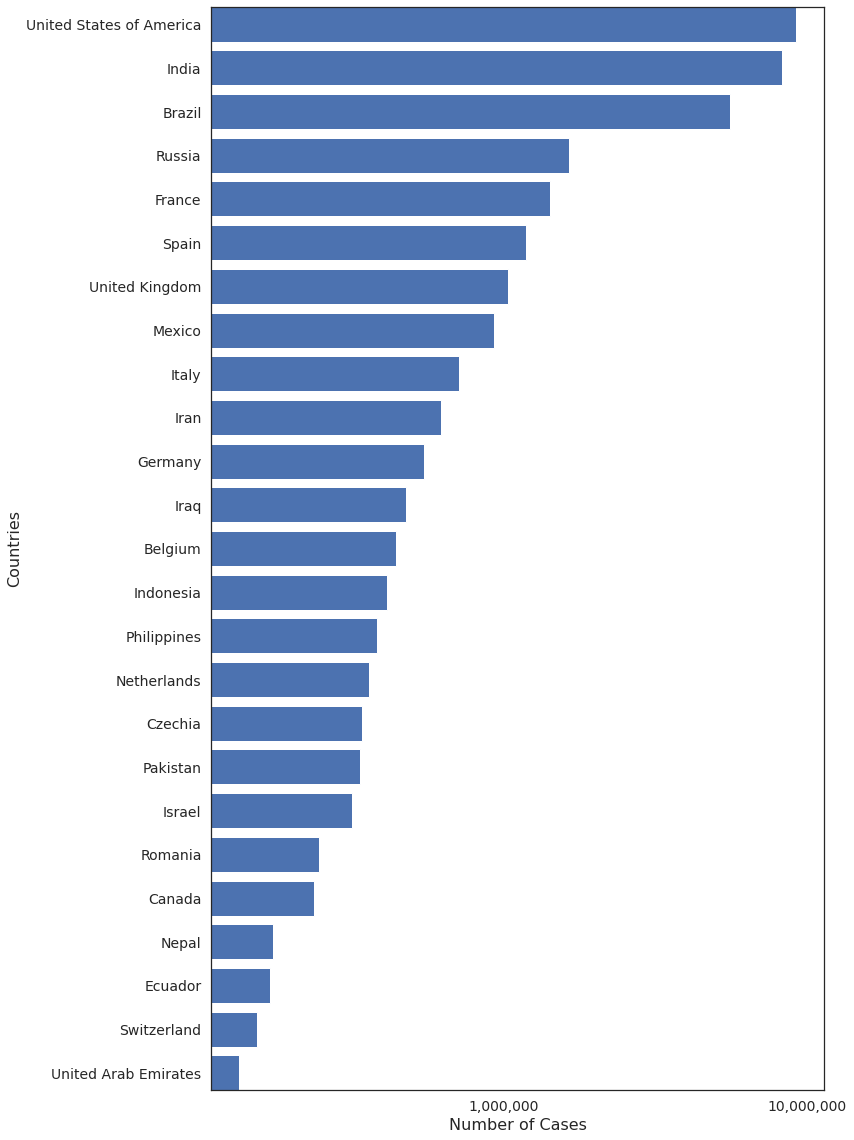

In [14]:
# Plotting graph
sns.set_theme(style='white')
plt.figure(figsize=(12,16))
top_countries_list = format_names(df_top_countries.index)
plt.barh(top_countries_list[::-1], df_top_countries['Total Cases'].values[::-1]) # Reversing the order to have heighest values at the top of bar chart
#plt.title(f'Top {len(top_countries)} Countries with Most Cases')
plt.xscale('log')
ax = plt.axes() # for updating axes values to plain text
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.margins(y=0)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Number of Cases', fontsize=16)
plt.ylabel('Countries',fontsize=16)
plt.tight_layout()
plt.savefig(f'{bar_plot_path}/top_selected_country_cases.pdf')
plt.show()

In [15]:
"""
# Plotting graph
sns.set_theme(style='white')
plt.figure(figsize=(12,16), dpi=90)

#plt.bar(df_top_countries.index, df_top_countries['Total Cases'].values)
top_countries_list = format_names(df_top_countries.index)
plt.barh(top_countries_list, df_top_countries['Total Cases'].values)

#plt.axvline(Number_of_countries-0.5, 0,1, ls='--', c='black')
plt.axhline(y=(Number_of_countries-0.5), ls='--', c='black')

plt.title(f'Top {len(top_countries)} Countries with Most Cases')

plt.xscale('log')
ax = plt.axes() # for updating 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # To get labels in plain text 
#plt.xticks(rotation=90)
plt.margins(y=0)
plt.xlabel('Number of Cases')
plt.ylabel('Countries')
plt.show()
"""

"\n# Plotting graph\nsns.set_theme(style='white')\nplt.figure(figsize=(12,16), dpi=90)\n\n#plt.bar(df_top_countries.index, df_top_countries['Total Cases'].values)\ntop_countries_list = format_names(df_top_countries.index)\nplt.barh(top_countries_list, df_top_countries['Total Cases'].values)\n\n#plt.axvline(Number_of_countries-0.5, 0,1, ls='--', c='black')\nplt.axhline(y=(Number_of_countries-0.5), ls='--', c='black')\n\nplt.title(f'Top {len(top_countries)} Countries with Most Cases')\n\nplt.xscale('log')\nax = plt.axes() # for updating \nax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))\n\n#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # To get labels in plain text \n#plt.xticks(rotation=90)\nplt.margins(y=0)\nplt.xlabel('Number of Cases')\nplt.ylabel('Countries')\nplt.show()\n"

## Average cases of top selected countries

In [16]:
dict_countries_avg = Counter(total_countries)

for country in dict_countries.keys():
  dict_countries_avg[country] = df_grouped.get_group(country)['cases'].mean()

# Average cases for all countries
df_avg_cases_countries = pd.DataFrame.from_dict(dict_countries_avg, orient='index', columns=['Average'])

# List of top selected countries
top_countries = list(df_top_countries.index)

# Average of selected top countries
avg_df = df_avg_cases_countries[df_avg_cases_countries.index.isin(top_countries)]
avg_df

Average
Belgium                   1431.568
Brazil                   18005.536
Canada                     768.964
Czechia                   1109.234
Ecuador                    558.396
France                    4590.633
Germany                   1769.568
India                    26805.580
Indonesia                 1371.375
Iran                      2014.581
Iraq                      1553.229
Israel                    1033.216
Italy                     2303.036
Mexico                    3097.973
Nepal                      588.363
Netherlands               1167.003
Pakistan                  1105.917
Philippines               1260.240
Romania                    806.088
Russia                    5314.224
Spain                     3862.143
Switzerland                499.117
United_Arab_Emirates       443.401
United_Kingdom            3360.110
United_States_of_America 29894.032

# Common Methods for All Experiments

## Common Methods

#### Updated Number of countries

In [17]:
Number_of_countries = 25

In [18]:
# Global variables for countries
countries = top_countries[0:Number_of_countries]

In [19]:
# Return a combined dataframe for a each error statistics(MAE,RMSE,MAPE etc) along with the newly added mean row.
def get_metric_with_mean(result: pd.DataFrame, error_metric: str)->pd.DataFrame:
  df_grouped = result.groupby('EvaluationMeasurement')
  df = df_grouped.get_group(error_metric).reset_index(drop=True)
  df = df.append(df.describe().loc['mean'])
  return df

In [20]:
def calc_mean_to_max_error(df, max_of_pretrain_days, max_of_df):
  i=-1
  for row_num in range(len(df)-1):  # Go before mean row
    i += 1
    for col_num in df.columns[2:]:
      df.loc[row_num,col_num] = df.loc[row_num,col_num]/max_of_pretrain_days[i] 
  
  for col in df.columns[2:]:
      df.loc['mean',col] = df.loc['mean',col]/max_of_df

  return df

In [21]:
# Note: Do not change the filenames, since they are later being used for visualizations 
def save_runtime(df,path,country=None,static_learner=True,alternate_batch=False, transpose=False):
  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  if country==None:
    if static_learner:
      df.to_latex(f'{path}/combined25country_runtime_static.tex')
      df.to_csv(f'{path}/combined25country_runtime_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_runtime_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_runtime_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_runtime_incremental.tex')
        df.to_csv(f'{path}/combined25country_runtime_incremental.csv')
  else:
    if static_learner:
      df.to_latex(f'{path}/{country}_runtime_static.tex')
      df.to_csv(f'{path}/{country}_runtime_static.csv')
    else:
      df.to_latex(f'{path}/{country}_runtime_incremental.tex')
      df.to_csv(f'{path}/{country}_runtime_incremental.csv')

In [22]:
# Note: Do not change the filenames, since they are later being used for visualizations 
def save_summary_table(df,path,country=False,static_learner=True,alternate_batch=False, transpose=False):

  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  if country:
    metric = df.loc['EvaluationMeasurement'].unique()[0]
    if static_learner:
      df.to_latex(f'{path}/top_countries_{metric}_summary_table_static.tex')
      df.to_csv(f'{path}/top_countries_{metric}_summary_table_static.csv')
    else:
      df.to_latex(f'{path}/top_countries_{metric}_summary_table_incremental.tex')
      df.to_csv(f'{path}/top_countries_{metric}_summary_table_incremental.csv')
    
  else:
    if static_learner:
      df.to_latex(f'{path}/combined25country_summary_table_static.tex')
      df.to_csv(f'{path}/combined25country_summary_table_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_summary_table_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_summary_table_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_summary_table_incremental.tex')
        df.to_csv(f'{path}/combined25country_summary_table_incremental.csv')
    

In [23]:
# Note: Do not change the filenames since they are later being used for visualizations
def save_metrics(df, path, country=None, static_learner=True, alternate_batch=False, transpose=False): 
  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  metric_type = df.loc['EvaluationMeasurement'].unique()[0]
  if country==None:
    if static_learner:
      df.to_latex(f'{path}/combined25country_{metric_type}_static.tex')
      df.to_csv(f'{path}/combined25country_{metric_type}_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_{metric_type}_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_{metric_type}_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_{metric_type}_incremental.tex')
        df.to_csv(f'{path}/combined25country_{metric_type}_incremental.csv')
  else:
    if static_learner:
      df.to_latex(f'{path}/{country}_{metric_type}_static.tex')
      df.to_csv(f'{path}/{country}_{metric_type}_static.csv')
    else:
      df.to_latex(f'{path}/{country}_{metric_type}_incremental.tex')
      df.to_csv(f'{path}/{country}_{metric_type}_incremental.csv')

In [24]:
def save_combined_summary_table(df, path, static_learner=False,transpose=False):
  df = df.apply(pd.to_numeric,errors='ignore')
  df = df.round(decimal)
  if transpose:
    df = df.transpose()
  
  if static_learner:
    save_path = f'{path}/summary_table_combined_mean_static'
  else:
    save_path = f'{path}/summary_table_combined_mean_incremental'

  df.to_csv(f'{save_path}.csv')
  df.to_latex(f'{save_path}.tex')

In [25]:
def display_runtime_per_country(results_runtime,countries):
  for i in range(len(countries)):
    print(f'_____________Running Time for {countries[i]}________________')
    print(results_runtime[i].to_string())
    print('\n')

In [26]:
def calc_save_err_metric_countrywise(countries, error_metrics, results, max_of_pretrain_per_country, max_cases_per_country, path, static_learner, transpose):
  countrywise_error_scores={}
  for i in range(len(countries)):
    country_error_score = []
    for error_metric in error_metrics:
      
      df_error_metric = get_metric_with_mean(results[i], error_metric=error_metric)

      #if error_metric != 'MAPE':
      #  df_error_metric = calc_mean_to_max_error(df_error_metric, max_of_pretrain_per_country[i], max_cases_per_country[i])

      country_error_score.append(df_error_metric)
      display_countrywise_scores(countries[i],df_error_metric)

      # Transposing the metrics while saving
      save_metrics(df_error_metric, path=path, country=countries[i], static_learner=static_learner, transpose=transpose)
      
    countrywise_error_scores[countries[i]] = pd.concat(country_error_score,ignore_index=True)
    
  return countrywise_error_scores

In [27]:
def calc_save_err_metric_combined(error_metrics, results, max_of_pretrain_days, max_selected_countries, path, static_learner, alternate_batch, transpose):
  combined_err_metric = []
  for error_metric in error_metrics:
    df_error_metric = get_metric_with_mean(results, error_metric=error_metric)

    #if error_metric != 'MAPE':
    #  df_error_metric = calc_mean_to_max_error(df_error_metric, max_of_pretrain_days, max_selected_countries)

    # Transposing the metrics while saving
    save_metrics(df_error_metric, path=path, static_learner=static_learner, alternate_batch=alternate_batch, transpose=transpose)
    
    combined_err_metric.append(df_error_metric)
  return (pd.concat(combined_err_metric, ignore_index=True))

In [28]:
def get_summary_table(df_result, df_runtime_result, error_metrics, static_learner=True):
  sum_metric=[]
  measure_col_name = 'Metric'
  
  # Setting start row and column for static and incremental learner
  for metric in error_metrics:
    start_row = 'mean'
    if static_learner:
      start_col='RandomForest'
    else:
      start_col='HT_Reg'

    df_metric = get_metric_with_mean(df_result, metric)
    df_row = pd.DataFrame([df_metric.loc[start_row][start_col:]])
    
    df_row[measure_col_name] = str(metric)    
    sum_metric.append(df_row)

  # Adding run time
  df_runtime_row = pd.DataFrame([df_runtime_result.describe().loc[start_row][start_col:]])
  df_runtime_row[measure_col_name]='Time(sec)'
  sum_metric.append(df_runtime_row)

  df_summary = pd.concat(sum_metric, ignore_index=True)
  df_summary.set_index(measure_col_name, inplace=True)

  return df_summary

In [29]:
def get_summary_table_countrywise(df_result_dict, error_metrics, static_learner=True):  #df_runtime_result,
  summary_metric=[]
  measure_col_name = f'Country({str(error_metrics[0])})'
  eval_measure_col = 'EvaluationMeasurement'
  start_row = 'mean'
  if static_learner:
    start_col='RandomForest'
  else:
    start_col='HT_Reg'

  for country in df_result_dict.keys():
    df_result = df_result_dict[country]

    # Setting start row and column for static and incremental learner
    for metric in error_metrics:      
      df_metric = get_metric_with_mean(df_result, metric)
      df_row = pd.DataFrame([df_metric.loc[start_row][start_col:]])
      df_row[eval_measure_col] = metric
      df_row[measure_col_name] = country
      summary_metric.append(df_row)

  df_summary = pd.concat(summary_metric, ignore_index=True)
  df_summary.set_index(measure_col_name, inplace=True)

  return df_summary

In [30]:
def get_sum_table_combined_mean(countrywise_error_score_incremental,results_runtime, static_learner=False):
  sum_table_combined_mean=[]
  measure_col_name = 'Metric'
  start_row = 'mean'
  if static_learner:
    start_col = 'RandomForest'
  else:
    start_col= 'HT_Reg'

  for metric in error_metrics:
    df_sum_cur_metric = get_summary_table_countrywise(countrywise_error_score_incremental, [metric], static_learner=static_learner)
    df_row = pd.DataFrame([df_sum_cur_metric.describe().loc[start_row]])

    df_row[measure_col_name] = metric
    sum_table_combined_mean.append(df_row)

  # Adding run time
  df_runtime = pd.concat(results_runtime, ignore_index=True).describe().loc[start_row][start_col:]
  df_runtime_row = pd.DataFrame([df_runtime])
  df_runtime_row[measure_col_name]='Time(sec)'
  sum_table_combined_mean.append(df_runtime_row)

  # Concating results to one dataframe
  sum_table_combined_mean = pd.concat(sum_table_combined_mean, ignore_index=True)
  sum_table_combined_mean.set_index(measure_col_name, inplace=True)
  return sum_table_combined_mean

In [31]:
def check_significance(target_pop, competitor_pop, significance_at: float):
    """
    Comparing algorithms per batch or per country pairs (exp 2 or 1 respectively), 
      so for each pair, we compare the significance of the best algo to all of the the other algos.
    Ttest performed if the distribution is normal, otherwise we perform a non-parametric test.
    """
    model_pop, population = target_pop, competitor_pop  
    
    # Normality tests
    if len(model_pop) >= 8:  # skew test not valid for smaller populations
      value_mdl, p_mdl = normaltest(model_pop.values)
      value_pop, p_pop = normaltest(population.values)
      if (p_mdl >= 0.05) & (p_pop >= 0.05):
  #       print('It is likely that both populations are normal. Thus, running T-Test...')
          tset, pval = stats.ttest_ind(model_pop, population)
          if pval < significance_at:    # alpha value is 0.05 or 5%
              significant = 'Significant (Ttest)'
          else:
              significant = 'Not Significant (Ttest)'
      else:
  #         print('It is unlikely that the result is normal. Thus, running Wilcoxon test...')
          if np.sum(np.subtract(list(model_pop), list(competitor_pop))) != 0.0:  # if values are identical the test will crash, but we now it's not significant
              tset, pval = stats.wilcoxon(model_pop, population)
              if pval < significance_at:    # alpha value is 0.05 or 5%
                  significant = 'Significant (Wilcox Test)'
              else:
                  significant = 'Not Significant (Wilcox Test)'
          else:
  #             print('Warning: results are identical')
              tset, pval = stats.ttest_ind(model_pop, population)
              significant = 'Not Significant (Wilcox Test)'
    else:
      print('Population too small.')
      if np.sum(np.subtract(list(model_pop), list(competitor_pop))) != 0.0:  # if values are identical the test will crash, but we now it's not significant
          tset, pval = stats.wilcoxon(model_pop, population)
          if pval < significance_at:    # alpha value is 0.05 or 5%
              significant = 'Significant (Wilcox Test)'
          else:
              significant = 'Not Significant (Wilcox Test)'
    return pval, significant 

## Combining Dataset

In [32]:
def sortby_date_and_set_index(df):
  df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
  df.sort_values('date', inplace=True)
  df.set_index('date', inplace=True)
  return df

In [33]:
def get_dataset_with_target(countries, df_grouped):
  
  # Empty list to store Dataframes of each country
  frames = []
  
  for country in countries:
    
    df = df_grouped.get_group(country)

    # Creating feature 'day_no'
    df['day_no']= pd.Series([i for i in range(1,len(df)+1)], index=df.index)

    # Reordering features
    df = df[['day_no', 'country','cases']]

    # Adding features through lags
    df = create_features_with_lags(df)

    # Creating target with last 10 days cases
    df['target'] = df.iloc[:,[2]+[i*-1 for i in range(1,10)]].mean(axis=1)

    # Dropping null columns
    df.dropna(how='any', axis=0, inplace=True)

    # Dropping mid columns
    drop_columns = list(df.loc[:,'cases_t-38':'cases_t-1'].columns)
    df.drop(drop_columns, axis=1, inplace=True)

    frames.append(df)

  return (pd.concat(frames, ignore_index=True))

In [34]:
def reshape_dataframe(*data: np.ndarray):
    # This function adds an extra dimension which is necessary in the LSTM
    arr = []
    for d in data:
        arr.append(np.reshape(np.array(d), (d.shape[0], 1, d.shape[1])))
    return arr

In [35]:
def get_countries_sortedby_cases(valid_countries, df_grouped):
  # A dictionary of all countries
  dict_countries = Counter(valid_countries)

  for country in dict_countries.keys():
    dict_countries[country] = df_grouped.get_group(country)['cases'].sum()

  # Sorting countries based on number of cases
  countries_sortedby_cases = sorted(dict_countries.items(), key=lambda dict_countries: dict_countries[1], reverse=True)

  # Creating dataframe 
  df_countries_sortedbycases = pd.DataFrame.from_dict(dict(countries_sortedby_cases), orient='index', columns=['Total Cases'])
  
  return df_countries_sortedbycases

In [36]:
# Getting a list of valid countries
def get_countries_with_valid_size(df):
  total_countries = list(df_grouped.groups.keys())

  # A list for countries with required datasize
  valid_countries = []

  # List of countries with more than 230 records. Because, max training size = 150, lags removed = 50, prediction = 30.
  for country in total_countries:
    if len(df_grouped.get_group(country)) >= 230:
      valid_countries.append(country)

  return valid_countries

In [37]:
def preprocess_dataset(df):  
  # Selecting required features
  df= df[['dateRep','cases','countriesAndTerritories']]

  # Rename features
  df.rename(columns={'countriesAndTerritories':'country', 'dateRep':'date'}, inplace=True)

  # Convert to date, sort and set index
  df = sortby_date_and_set_index(df)

  return df

In [38]:
# Calculating maximum of dataframe for every pretrain size
def calc_max_of_pretrain_days(pretrain_days,df)->list:
  max_of_pretrain_days = []
  
  for day in pretrain_days:
    df_subset = create_subset(df,day)
    max_of_pretrain_days.append(df_subset['cases'].max())
  
  return max_of_pretrain_days

In [39]:
def display_scores(results):
  #print(f'_________________________________{country}____________________________________________')
  df_MAE = get_metric_with_mean(results,'MAE' )
  df_RMSE = get_metric_with_mean(results,'RMSE')
  df_MAPE = get_metric_with_mean(results,'MAPE')
  print('MAE Score')
  print(df_MAE.to_string())
  print('-----------------------------------------------------------------------------------')
  print('RMSE Score')
  print(df_RMSE.to_string())
  print('-----------------------------------------------------------------------------------')
  print('MAPE Score')
  print(df_MAPE.to_string())
  print('\n\n')

## Alternate Batch

In [40]:
def get_alternate_batch_records_idx(batch_size,total_records): 
  total_batches = total_records//batch_size
  current_batch=1
  start_idx = 0
  end_idx = batch_size
  idx_list = []
  
  while current_batch <= total_batches:
    if current_batch%2!=0:
      idx_list.extend([x for x in range(start_idx,end_idx)])
      start_idx = idx_list[-1]+(batch_size+1)
      end_idx = start_idx + batch_size
    current_batch += 1

  return idx_list

In [41]:
def create_alternate_batch_subset(df,days,batch_size):
  df_grouped = df.groupby('country')
  countries = df['country'].unique()
  frame1,frame2 = [],[]

  for country in countries:
    df_cur_country = df_grouped.get_group(country)

    df1 = df_cur_country.iloc[0:days//2]
    df2 = df_cur_country.iloc[days:days+30]  # Adding 30 for a testing batch that is one month ahead
    
    # Selecting alternate batches
    idx = get_alternate_batch_records_idx(batch_size,total_records=len(df2))
    df2 = df2.iloc[idx]

    # Appending dataframes
    frame1.append(df1)
    frame2.append(df2)

  r1 = pd.concat(frame1, ignore_index=True)
  r2 = pd.concat(frame2, ignore_index=True)
  r = r1.append(r2, ignore_index=True)
  
  return (r)

## Incremental Learner

In [42]:
def instantiate_regressors():
  ht_reg = HoeffdingTreeRegressor()
  hat_reg = HoeffdingAdaptiveTreeRegressor()
  arf_reg = AdaptiveRandomForestRegressor()
  pa_reg = PassiveAggressiveRegressor(max_iter=1, random_state=0, tol=1e-3)

  model = [ht_reg, hat_reg, arf_reg, pa_reg]
  model_names = ['HT_Reg', 'HAT_Reg', 'ARF_Reg', 'PA_Reg']

  return model, model_names

In [43]:
def get_error_scores_per_model(evaluator, mdl_evaluation_scores)-> pd.DataFrame:
  
  for i in range(len(evaluator.model_names)):
    # Desired error metrics
    mse = evaluator.mean_eval_measurements[i].get_mean_square_error()
    mae = evaluator.mean_eval_measurements[i].get_average_error()
    mape = evaluator.mean_eval_measurements[i].get_mean_absolute_percentage_error()
    rmse = sqrt(mse)

    # Dictionary of errors per model
    mdl_evaluation_scores[str(evaluator.model_names[i])] = [rmse, mae, mape]

  return(pd.DataFrame(mdl_evaluation_scores))


In [44]:
def get_running_time_per_model_incremental_learner(evaluator,day):
    cols = ['PretrainDays']  # Adding pretrain as first column
    cols += evaluator.model_names  # Adding remaining columns of different algorithm
    running_time = []
    running_time.append(day)
    for i in range(len(evaluator.model_names)):
        running_time.append(evaluator.running_time_measurements[i]._total_time)

    return (pd.DataFrame([running_time],columns=cols))  # Passing running_time as a list of list to insert it as a row

In [45]:
def display_countrywise_scores(country,df_error_metric):
  print(f'_________________________________{country}____________________________________________')
  print(df_error_metric.to_string())
  print('\n\n')

In [46]:
# Create a dataframe of all countries with pre-train size = pretrain days and test&train size = pretrain days
def create_subset(result,days):
  result_grouped = result.groupby('country')
  countries = result['country'].unique()
  frame1,frame2 = [],[]
  for country in countries:
    df = result_grouped.get_group(country) 
    df1 = df.iloc[0:days]
    df2 = df.iloc[days:days+30]
    frame1.append(df1)
    frame2.append(df2)

  r1 = pd.concat(frame1, ignore_index=True)
  r2 = pd.concat(frame2, ignore_index=True)
  r = r1.append(r2, ignore_index=True)
  
  return (r)

## Static Learner

In [47]:
def mean_absolute_percentage_error(actual, predicted):
    """
    Mean absolute percentage error (MAPE).
    :return error
    """
    actual =  np.array(actual) 
    predicted = np.array(predicted) 

    mask = actual != 0
    return (np.fabs(actual - predicted) / np.fabs(actual))[mask].mean()

In [48]:
def get_scores(y_true, model_predictions, days):
    mdl_evaluation_scores = {}
    mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']
    mdl_evaluation_scores['PretrainDays'] = [days] * len(mdl_evaluation_scores['EvaluationMeasurement'])

    for model in model_predictions:
        y_pred = model_predictions[model]
        if model == 'LSTM':
            rmse = mean_squared_error(y_true[:, np.newaxis], y_pred, squared=False)
            mae = mean_absolute_error(y_true[:, np.newaxis], y_pred)
            mape = mean_absolute_percentage_error(y_true[:, np.newaxis], y_pred)
        else:
            rmse = mean_squared_error(y_true, y_pred, squared=False)
            mae = mean_absolute_error(y_true, y_pred)
            mape = mean_absolute_percentage_error(y_true, y_pred)

        mdl_evaluation_scores[model] = [rmse, mae, mape]
    return pd.DataFrame(mdl_evaluation_scores)

In [49]:
def get_running_time_per_model_static_learner(model_predictions,total_execution_time):
    cols = ['PretrainDays']
    cols += model_predictions.keys()
    return pd.DataFrame(total_execution_time, columns=cols)


def measure(wrapped_func):
    @wraps(wrapped_func)
    def _time_it(*args, **kwargs):
        start = pc_timer()
        try:
            model_predictions = wrapped_func(*args, **kwargs)
        finally:
            end_ = pc_timer() - start
            return model_predictions, end_
    return _time_it


@measure
def train_test_model(regressor, X_train, y_train, X_test):
    regressor.fit(X_train, y_train)
    return regressor.predict(X_test)


@measure
def train_test_lstm(regressor, X_train_lstm, y_train, X_val_lstm, y_val, X_test_lstm, patience, epochs, batch_size_lstm):
    regressor.compile(loss='mae', optimizer='adagrad', metrics=['mse', 'mae'])

    history = regressor.fit(
        X_train_lstm,
        y_train,
        validation_data=(X_val_lstm, y_val),
        epochs=epochs,
        batch_size=batch_size_lstm,
        callbacks=[EarlyStopping(monitor='val_loss',
                                 mode='min',
                                 patience=patience)])

    return regressor.predict(X_test_lstm)

In [50]:
def define_lstm_model(x_train_lstm, layers, activations, patience):
    # Start defining the model
    input_shape = x_train_lstm.shape

    # Definining model first with LSTM n layers
    model = Sequential()
    model.add(LSTM(layers[0], input_shape=input_shape[1:], activation=activations[0], return_sequences=True))

    # Adding middle layers
    for l in range(1, len(layers)-1):
      model.add(LSTM(layers[l], activation=activations[l], return_sequences=True))
      model.add(Dropout(0.2))

    # Add last Dense and LSTMs layers
    if len(layers) > 1:
      model.add(Dense(layers[-1], activation=activations[-1]))
      model.add(Dropout(0.2))
      model.add(LSTM(layers[-1], activation=activations[-1]))

    model.add(Dense(1))  # output layer. Since we have only 1 output value
    # End defining model

    return model


In [51]:
def normalize_dataset(*dataframes):
    arr = []
    for df in dataframes:
        arr.append(StandardScaler().fit_transform(df))
    return arr

In [52]:
def get_validation_set(df_train, batch_size=10):
    lst_idx = -1
    total_batches = len(df_train) // batch_size
    train_set, val_set = [], []

    for cur_batch in range(total_batches):
        start = lst_idx + 1
        end = start + batch_size
        if cur_batch % 2 == 0:
            train_set.append(df_train.iloc[start:end])
        else:
            val_set.append(df_train.iloc[start:end])

        lst_idx = end - 1  # adjusting last index because we add 1 in starting

    return pd.concat(train_set, ignore_index=True), pd.concat(val_set, ignore_index=True)


# Experiment 1
Training and testing with five countries individually. 

### Dataset Description

* cases(t): Number of cases on current day(Column='cases') 

* cases(t-n): Number of cases 'n' days before current day 't'

* 30 day gap: Training from day number t-89 to t-39(50 days). Then a gap of 30 days and then creating target by averaging t to t-9(10 Days).


In [53]:
# Sample set for understanding dataset
sample_df = pd.read_csv(f'{csv_processed_path}/United_States_of_America.csv')
sample_df.tail(5)

date  day_no  ... cases_t-40    target
214  2020-10-29     304  ...  50209.000 70342.900
215  2020-10-30     305  ...  40295.000 73139.900
216  2020-10-31     306  ...  39852.000 77412.300
217  2020-11-01     307  ...  53153.000 79007.900
218  2020-11-02     308  ...  38307.000 79902.200

[5 rows x 55 columns]

## Incremental Learner

In [54]:
def scikit_multiflow(df, pretrain_days):

  # Creating a stream from dataframe
  stream = DataStream(np.array(df.iloc[:,4:-1]), y=np.array(df.iloc[:,-1])) # Selecting features x=[t-89:t-39] and y=[target]. TODO: Drop columns with name 

  model, model_names = instantiate_regressors()

  frames, running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      pretrain_days = day
      max_samples = pretrain_days + 30  #Testing on set one month ahead only

      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=day,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], 
                                    max_samples=max_samples)
      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE']
      mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

  # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df

In [55]:
# Training all countries
results_incremental = []
results_runtime_incremental = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
  # Read each country  
  df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

  # Get evaluation scores and running time for country
  evaluation_scores_df, running_time_df = scikit_multiflow(df_country,pretrain_days)

  # Appending evaluation scores and runtime for each country
  results_incremental.append(evaluation_scores_df)
  results_runtime_incremental.append(running_time_df)

  # Get max of each pretrain subset and for each country dataset
  max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))
  max_cases_per_country.append(df_country['cases'].max())

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 30 sample(s).
Evaluating...
 #################### [98%] [1.51s]
Processed samples: 60
Mean performance:
HT_Reg - MSE          : 11285489.5076
HT_Reg - MAPE          : 0.1067
HT_Reg - MAE          : 2707.566934
HAT_Reg - MSE          : 9711711.9392
HAT_Reg - MAPE          : 0.0949
HAT_Reg - MAE          : 2430.415481
ARF_Reg - MSE          : 287943136.3192
ARF_Reg - MAPE          : 0.5921
ARF_Reg - MAE          : 14882.208173
PA_Reg - MSE          : 62927183059.5860
PA_Reg - MAPE          : 8.2249
PA_Reg - MAE          : 193965.777290
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 60 sample(s).
Evaluating...
 #################### [99%] [2.46s]
Processed samples: 90
Mean performance:
HT_Reg - MSE          : 480459803.5196
HT_Reg - MAPE          : 0.8064
HT_Reg - MAE          : 17494.530883
HAT_Reg - MSE          : 530223512.1853
HAT_Reg - MAPE          : 0.8683
HAT_Reg - MAE          : 18802.580804
ARF_Reg - M

In [56]:
# Save the running time for each country
for i in range(len(countries)):
  save_runtime(results_runtime_incremental[i], path=exp1_runtime_path, country = countries[i], static_learner=False)

# Display countrywise running time complexity
display_runtime_per_country(results_runtime_incremental, countries)

_____________Running Time for United_States_of_America________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.046    0.061    1.355   0.031
1            60   0.118    0.205    2.104   0.030
2            90   0.164    0.195    3.246   0.031
3           120   0.246    0.287    4.839   0.031
4           150   0.329    0.387    5.848   0.031
5           180   0.411    0.465    6.804   0.032


_____________Running Time for India________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.040    0.056    1.307   0.032
1            60   0.067    0.100    2.191   0.034
2            90   0.127    0.161    3.679   0.031
3           120   0.197    0.239    6.501   0.030
4           150   0.286    0.340    8.030   0.031
5           180   0.354    0.536    8.965   0.033


_____________Running Time for Brazil________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.043    0.057    1.237   0.033
1            60   0.

In [57]:
countrywise_error_score_incremental = calc_save_err_metric_countrywise(countries, error_metrics, results_incremental, max_of_pretrain_per_country, max_cases_per_country, path=exp1_path, static_learner=False, transpose=True)

_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays    HT_Reg   HAT_Reg   ARF_Reg      PA_Reg
0                      MAE        30.000  2707.567  2430.415 14882.208  193965.777
1                      MAE        60.000 17494.531 18802.581 19925.377  670387.456
2                      MAE        90.000 14284.090 14284.488 13788.469  472027.577
3                      MAE       120.000 10347.791 10347.791  6443.845  799895.356
4                      MAE       150.000  1875.442  1875.442 27215.878 1717538.680
5                      MAE       180.000  1833.208  1833.208 17377.846  760302.267
mean                   NaN       105.000  8090.438  8262.321 16605.604  769019.519



_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0                     MAPE        30.000   0.107    0.

In [58]:
# Get summary table for each country for specified metric
summary_table_countrywise_incremental = get_summary_table_countrywise(countrywise_error_score_incremental, ['MAPE'], static_learner=False)

# Saving the summary table
save_summary_table(summary_table_countrywise_incremental, exp1_summary_path,country=True, static_learner=False,alternate_batch=False,transpose=True)

summary_table_countrywise_incremental

HT_Reg  HAT_Reg  ...  PA_Reg  EvaluationMeasurement
Country(MAPE)                              ...                               
United_States_of_America   0.236    0.244  ...  20.214                   MAPE
India                      0.271    0.264  ...   1.266                   MAPE
Brazil                     0.239    0.263  ...   7.748                   MAPE
Russia                     0.747    0.800  ...   6.320                   MAPE
France                     0.570    0.559  ...  58.336                   MAPE
Spain                      0.673    0.677  ...  43.569                   MAPE
United_Kingdom             0.467    0.448  ...  18.806                   MAPE
Mexico                     0.047    0.047  ...   3.558                   MAPE
Italy                      1.190    1.152  ...  25.761                   MAPE
Iran                       0.108    0.111  ...   6.919                   MAPE
Germany                    0.789    0.762  ...  45.307                   MAPE
Iraq                       0.569    0.568  ...   0.914                   MAPE
Belgium                    0.811    0.781  ...  26.284                   MAPE
Indonesia                  0.054    0.050  ...   1.536                   MAPE
Philippines                0.386    0.383  ...   2.119                   MAPE
Netherlands                0.579    0.569  ...  10.170                   MAPE
Czechia                    0.445    0.412  ...   2.685                   MAPE
Pakistan                   0.434    0.438  ...   7.902                   MAPE
Israel                     0.598    0.595  ...   8.364                   MAPE
Romania                    0.181    0.183  ...   2.233                   MAPE
Canada                     0.299    0.306  ...  11.710                   MAPE
Nepal                      0.798    0.799  ...   4.585                   MAPE
Ecuador                    0.833    0.869  ...  20.991                   MAPE
Switzerland                1.541    1.711  ...  29.619                   MAPE
United_Arab_Emirates       0.154    0.152  ...   4.322                   MAPE

[25 rows x 5 columns]

In [59]:
sum_inc_countrywise_mean = get_sum_table_combined_mean(countrywise_error_score_incremental,results_runtime_incremental)
save_combined_summary_table(sum_inc_countrywise_mean, exp1_summary_path, static_learner=False, transpose=True) 
sum_inc_countrywise_mean

HT_Reg  HAT_Reg  ARF_Reg    PA_Reg
Metric                                        
MAE       2133.111 2159.765 5377.010 56258.950
MAPE         0.521    0.526    2.265    14.850
RMSE      2884.414 2918.775 6431.435 80223.090
Time(sec)    0.187    0.227    4.334     0.033

## Static Learner

In [60]:
def scikit_learn(df, training_days):
    frames = []
    model_predictions = {
        'RandomForest': [],
        'GradientBoosting': [],
        'LinearSVR': [],
        'DecisionTree': [],
        'BayesianRidge': [],
        'LSTM': []
        #'MLPRegressor': [],
        #'LinearRegression': []
    }
    total_execution_time = []
            
    # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
    # params (others like epoch and batch size are also hardcoded in train_test_lstm())
    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
    activations = ['tanh', 'tanh', 'relu']
    epochs = 500
    patience = 20
    batch_size_lstm = 10

    for day in training_days:
        
        cur_exec_time = [day]  # Keeping runing time for each pre-train set

        train = df.iloc[:day, :]
        test = df.iloc[day:day + 30, :]  # Testing on set one month ahead only, hence day+30.
        
        # training and test sets for all models except LSTM
        X_train, y_train = train.iloc[:, 4:-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, 4:-1], test.iloc[:, -1]

        # Seperating validation set from train set
        train_df, val_df = get_validation_set(train, batch_size=10)

        # Splitting test and validation into dependent and independent sets
        X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
        X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

        # Normalizing dataset
        X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

        # Reshaping the dataframes
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)
       

        rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
        model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
        cur_exec_time.append(exec_time)


        gb_reg = GradientBoostingRegressor(random_state=0)
        model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        lsv_reg = LinearSVR(random_state=0, tol=1e-5)
        model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        dt_reg = DecisionTreeRegressor(random_state=0)
        model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        br_reg = BayesianRidge()
        model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        
        lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
        model_predictions['LSTM'],exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs, batch_size_lstm)
        cur_exec_time.append(exec_time)

        
        mdl_evaluation_df = get_scores(y_test, model_predictions, day)
        total_execution_time.append(cur_exec_time)
        frames.append(mdl_evaluation_df)

    evaluation_score_df = pd.concat(frames, ignore_index=True)
    running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
    return evaluation_score_df, running_time_df


In [61]:
# Training all countries
results_static = []
results_runtime_static = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
  # Read country wise csv file
  df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

  # Evaluation scores and running time of each algorithm over different pre-training days
  evaluation_scores_df, running_time_df = scikit_learn(df_country, pretrain_days)

  # Append result of each pretrain size in results
  results_static.append(evaluation_scores_df)

  # Appending every country runtime 
  results_runtime_static.append(running_time_df)

  # Calculating max cases per country based on pre-train size
  max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))

  # Maximum case of each country
  max_cases_per_country.append(df_country['cases'].max())

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 84ms/step - loss: 24206.4580 - mse: 624614528.0000 - mae: 24206.4570 - val_loss: 30089.3633 - val_mse: 906656064.0000 - val_mae: 30089.3633
Epoch 2/500
20/20 [==============================] - 0s 909us/step - loss: 24206.4277 - mse: 624613184.0000 - mae: 24206.4277 - val_loss: 30089.3398 - val_mse: 906654720.0000 - val_mae: 30089.3398
Epoch 3/500
20/20 [==============================] - 0s 896us/step - loss: 24206.4062 - mse: 624612032.0000 - mae: 24206.4062 - val_loss: 30089.3125 - val_mse: 906653184.0000 - val_mae: 30089.3125
Epoch 4/500
20/20 [==============================] - 0s 822us/step - loss: 24206.3721 - mse: 624610496.0000 - mae: 24206.3711 - val_loss: 30089.2812 - val_mse: 906651328.0000 - val_mae: 30089.2812
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 24206.3047 - mse: 624607552.0000 - mae: 24206.3027 - val_loss: 30089.2246 - val_mse: 906647872.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 63ms/step - loss: 24466.5143 - mse: 625249728.0000 - mae: 24466.5137 - val_loss: 26857.2188 - val_mse: 732523776.0000 - val_mae: 26857.2168
Epoch 2/500
30/30 [==============================] - 0s 833us/step - loss: 24466.4889 - mse: 625248512.0000 - mae: 24466.4902 - val_loss: 26857.1960 - val_mse: 732522560.0000 - val_mae: 26857.1953
Epoch 3/500
30/30 [==============================] - 0s 779us/step - loss: 24466.4668 - mse: 625247360.0000 - mae: 24466.4668 - val_loss: 26857.1634 - val_mse: 732520704.0000 - val_mae: 26857.1621
Epoch 4/500
30/30 [==============================] - 0s 932us/step - loss: 24466.4193 - mse: 625245056.0000 - mae: 24466.4180 - val_loss: 26857.0495 - val_mse: 732514176.0000 - val_mae: 26857.0508
Epoch 5/500
30/30 [==============================] - 0s 841us/step - loss: 24466.2298 - mse: 625236288.0000 - mae: 24466.2285 - val_loss: 26856.5286 - val_mse: 732484160

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 35ms/step - loss: 24047.3348 - mse: 597861824.0000 - mae: 24047.3359 - val_loss: 25553.8979 - val_mse: 666560064.0000 - val_mae: 25553.8965
Epoch 2/500
50/50 [==============================] - 0s 652us/step - loss: 24047.1934 - mse: 597855040.0000 - mae: 24047.1953 - val_loss: 25553.5005 - val_mse: 666538240.0000 - val_mae: 25553.5000
Epoch 3/500
50/50 [==============================] - 0s 616us/step - loss: 24045.5492 - mse: 597778176.0000 - mae: 24045.5508 - val_loss: 25549.8477 - val_mse: 666339456.0000 - val_mae: 25549.8477
Epoch 4/500
50/50 [==============================] - 0s 611us/step - loss: 24039.0082 - mse: 597450944.0000 - mae: 24039.0078 - val_loss: 25539.9355 - val_mse: 665822336.0000 - val_mae: 25539.9336
Epoch 5/500
50/50 [==============================] - 0s 648us/step - loss: 24028.3762 - mse: 596983872.0000 - mae: 24028.3750 - val_loss: 25525.8271 - val_mse: 665098752

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 29ms/step - loss: 29102.6107 - mse: 994166592.0000 - mae: 29102.6133 - val_loss: 34679.6602 - val_mse: 1438882432.0000 - val_mae: 34679.6602
Epoch 2/500
60/60 [==============================] - 0s 698us/step - loss: 29102.0671 - mse: 994134848.0000 - mae: 29102.0664 - val_loss: 34677.8883 - val_mse: 1438768384.0000 - val_mae: 34677.8867
Epoch 3/500
60/60 [==============================] - 0s 653us/step - loss: 29096.5739 - mse: 993834944.0000 - mae: 29096.5723 - val_loss: 34665.6442 - val_mse: 1437985024.0000 - val_mae: 34665.6445
Epoch 4/500
60/60 [==============================] - 0s 614us/step - loss: 29077.4899 - mse: 992778304.0000 - mae: 29077.4902 - val_loss: 34640.4004 - val_mse: 1436308608.0000 - val_mae: 34640.4023
Epoch 5/500
60/60 [==============================] - 0s 623us/step - loss: 29055.1934 - mse: 991393024.0000 - mae: 29055.1934 - val_loss: 34612.0827 - val_mse: 14343

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 25ms/step - loss: 35870.7000 - mse: 1551459328.0000 - mae: 35870.6953 - val_loss: 37658.1875 - val_mse: 1674843776.0000 - val_mae: 37658.1875
Epoch 2/500
80/80 [==============================] - 0s 603us/step - loss: 35870.2317 - mse: 1551426432.0000 - mae: 35870.2305 - val_loss: 37656.4436 - val_mse: 1674706048.0000 - val_mae: 37656.4414
Epoch 3/500
80/80 [==============================] - 0s 522us/step - loss: 35865.6465 - mse: 1551094656.0000 - mae: 35865.6445 - val_loss: 37647.6574 - val_mse: 1674033536.0000 - val_mae: 37647.6562
Epoch 4/500
80/80 [==============================] - 0s 600us/step - loss: 35854.5686 - mse: 1550295296.0000 - mae: 35854.5703 - val_loss: 37634.8468 - val_mse: 1673051520.0000 - val_mae: 37634.8516
Epoch 5/500
80/80 [==============================] - 0s 558us/step - loss: 35842.9932 - mse: 1549446016.0000 - mae: 35842.9922 - val_loss: 37621.8435 - val_mse: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 23ms/step - loss: 36156.3466 - mse: 1543866112.0000 - mae: 36156.3438 - val_loss: 38268.2530 - val_mse: 1666690048.0000 - val_mae: 38268.2500
Epoch 2/500
90/90 [==============================] - 0s 715us/step - loss: 36153.6593 - mse: 1543631104.0000 - mae: 36153.6602 - val_loss: 38261.3817 - val_mse: 1666111232.0000 - val_mae: 38261.3828
Epoch 3/500
90/90 [==============================] - 0s 539us/step - loss: 36137.8307 - mse: 1542390912.0000 - mae: 36137.8281 - val_loss: 38237.4961 - val_mse: 1664177536.0000 - val_mae: 38237.4961
Epoch 4/500
90/90 [==============================] - 0s 519us/step - loss: 36107.3474 - mse: 1540103040.0000 - mae: 36107.3477 - val_loss: 38199.2737 - val_mse: 1661134464.0000 - val_mae: 38199.2734
Epoch 5/500
90/90 [==============================] - 0s 559us/step - loss: 36055.8416 - mse: 1536191104.0000 - mae: 36055.8438 - val_loss: 38146.7342 - val_mse: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 85ms/step - loss: 738.9714 - mse: 829282.3125 - mae: 738.9715 - val_loss: 711.0078 - val_mse: 527252.9375 - val_mae: 711.0078
Epoch 2/500
20/20 [==============================] - 0s 766us/step - loss: 738.9411 - mse: 829236.3750 - mae: 738.9411 - val_loss: 710.9827 - val_mse: 527217.5000 - val_mae: 710.9827
Epoch 3/500
20/20 [==============================] - 0s 855us/step - loss: 738.9161 - mse: 829203.8750 - mae: 738.9161 - val_loss: 710.9574 - val_mse: 527181.8750 - val_mae: 710.9574
Epoch 4/500
20/20 [==============================] - 0s 800us/step - loss: 738.8859 - mse: 829156.1250 - mae: 738.8859 - val_loss: 710.9274 - val_mse: 527139.6875 - val_mae: 710.9274
Epoch 5/500
20/20 [==============================] - 0s 771us/step - loss: 738.8468 - mse: 829107.1250 - mae: 738.8468 - val_loss: 710.8873 - val_mse: 527084.0000 - val_mae: 710.8873
Epoch 6/500
20/20 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 72ms/step - loss: 1637.3229 - mse: 4521304.5000 - mae: 1637.3229 - val_loss: 2644.3591 - val_mse: 10815903.0000 - val_mae: 2644.3589
Epoch 2/500
30/30 [==============================] - 0s 791us/step - loss: 1637.2679 - mse: 4521137.5000 - mae: 1637.2679 - val_loss: 2644.2631 - val_mse: 10815539.0000 - val_mae: 2644.2629
Epoch 3/500
30/30 [==============================] - 0s 733us/step - loss: 1637.0831 - mse: 4520799.0000 - mae: 1637.0833 - val_loss: 2643.6886 - val_mse: 10813889.0000 - val_mae: 2643.6885
Epoch 4/500
30/30 [==============================] - 0s 736us/step - loss: 1636.3089 - mse: 4519579.5000 - mae: 1636.3088 - val_loss: 2641.4514 - val_mse: 10807728.0000 - val_mae: 2641.4517
Epoch 5/500
30/30 [==============================] - 0s 731us/step - loss: 1633.6816 - mse: 4515406.0000 - mae: 1633.6815 - val_loss: 2636.8277 - val_mse: 10795020.0000 - val_mae: 2636.8276
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 35ms/step - loss: 5100.9113 - mse: 48605792.0000 - mae: 5100.9111 - val_loss: 4477.8695 - val_mse: 33087116.0000 - val_mae: 4477.8696
Epoch 2/500
50/50 [==============================] - 0s 575us/step - loss: 5100.6428 - mse: 48604228.0000 - mae: 5100.6426 - val_loss: 4476.9067 - val_mse: 33082154.0000 - val_mae: 4476.9072
Epoch 3/500
50/50 [==============================] - 0s 576us/step - loss: 5098.0266 - mse: 48591136.0000 - mae: 5098.0269 - val_loss: 4469.8965 - val_mse: 33046394.0000 - val_mae: 4469.8965
Epoch 4/500
50/50 [==============================] - 0s 572us/step - loss: 5089.4987 - mse: 48551592.0000 - mae: 5089.4990 - val_loss: 4456.8223 - val_mse: 32975802.0000 - val_mae: 4456.8228
Epoch 5/500
50/50 [==============================] - 0s 600us/step - loss: 5075.1591 - mse: 48459952.0000 - mae: 5075.1587 - val_loss: 4441.5479 - val_mse: 32888310.0000 - val_mae: 4441.5479
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 35ms/step - loss: 8366.7837 - mse: 142962432.0000 - mae: 8366.7842 - val_loss: 12068.7354 - val_mse: 298673280.0000 - val_mae: 12068.7354
Epoch 2/500
60/60 [==============================] - 0s 668us/step - loss: 8366.2784 - mse: 142958064.0000 - mae: 8366.2783 - val_loss: 12066.7124 - val_mse: 298653984.0000 - val_mae: 12066.7129
Epoch 3/500
60/60 [==============================] - 0s 589us/step - loss: 8361.8944 - mse: 142925872.0000 - mae: 8361.8945 - val_loss: 12057.7699 - val_mse: 298566848.0000 - val_mae: 12057.7695
Epoch 4/500
60/60 [==============================] - 0s 599us/step - loss: 8351.5694 - mse: 142839072.0000 - mae: 8351.5693 - val_loss: 12043.9394 - val_mse: 298420576.0000 - val_mae: 12043.9395
Epoch 5/500
60/60 [==============================] - 0s 563us/step - loss: 8338.6962 - mse: 142755536.0000 - mae: 8338.6963 - val_loss: 12029.0449 - val_mse: 298229344.0000 - va

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 20378.7258 - mse: 916129408.0000 - mae: 20378.7266 - val_loss: 18686.3078 - val_mse: 743993600.0000 - val_mae: 18686.3066
Epoch 2/500
80/80 [==============================] - 0s 538us/step - loss: 20376.1935 - mse: 916090048.0000 - mae: 20376.1953 - val_loss: 18678.4901 - val_mse: 743878784.0000 - val_mae: 18678.4902
Epoch 3/500
80/80 [==============================] - 0s 540us/step - loss: 20364.5107 - mse: 915882688.0000 - mae: 20364.5117 - val_loss: 18658.9010 - val_mse: 743419200.0000 - val_mae: 18658.9004
Epoch 4/500
80/80 [==============================] - 0s 538us/step - loss: 20339.2402 - mse: 915140416.0000 - mae: 20339.2402 - val_loss: 18626.2880 - val_mse: 742437568.0000 - val_mae: 18626.2891
Epoch 5/500
80/80 [==============================] - 0s 510us/step - loss: 20305.5618 - mse: 914027904.0000 - mae: 20305.5625 - val_loss: 18584.5206 - val_mse: 741089024

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 24ms/step - loss: 27657.2904 - mse: 1635663744.0000 - mae: 27657.2910 - val_loss: 32680.0881 - val_mse: 2082578560.0000 - val_mae: 32680.0898
Epoch 2/500
90/90 [==============================] - 0s 579us/step - loss: 27656.9039 - mse: 1635650432.0000 - mae: 27656.9023 - val_loss: 32678.8621 - val_mse: 2082534016.0000 - val_mae: 32678.8613
Epoch 3/500
90/90 [==============================] - 0s 509us/step - loss: 27653.4153 - mse: 1635545856.0000 - mae: 27653.4160 - val_loss: 32670.6560 - val_mse: 2082228736.0000 - val_mae: 32670.6562
Epoch 4/500
90/90 [==============================] - 0s 526us/step - loss: 27640.0069 - mse: 1635093760.0000 - mae: 27640.0059 - val_loss: 32654.4775 - val_mse: 2081488896.0000 - val_mae: 32654.4785
Epoch 5/500
90/90 [==============================] - 0s 516us/step - loss: 27623.2112 - mse: 1634422272.0000 - mae: 27623.2109 - val_loss: 32636.6419 - val_mse: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 83ms/step - loss: 1510.0010 - mse: 3238686.7500 - mae: 1510.0010 - val_loss: 1417.4677 - val_mse: 2062842.6250 - val_mae: 1417.4677
Epoch 2/500
20/20 [==============================] - 0s 933us/step - loss: 1509.9713 - mse: 3238602.5000 - mae: 1509.9713 - val_loss: 1417.4421 - val_mse: 2062771.0000 - val_mae: 1417.4421
Epoch 3/500
20/20 [==============================] - 0s 917us/step - loss: 1509.9446 - mse: 3238525.5000 - mae: 1509.9446 - val_loss: 1417.4158 - val_mse: 2062697.3750 - val_mae: 1417.4158
Epoch 4/500
20/20 [==============================] - 0s 847us/step - loss: 1509.9081 - mse: 3238430.5000 - mae: 1509.9081 - val_loss: 1417.3823 - val_mse: 2062605.7500 - val_mae: 1417.3823
Epoch 5/500
20/20 [==============================] - 0s 800us/step - loss: 1509.8395 - mse: 3238270.5000 - mae: 1509.8396 - val_loss: 1417.3269 - val_mse: 2062460.0000 - val_mae: 1417.3269
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 56ms/step - loss: 3837.6974 - mse: 26728802.0000 - mae: 3837.6975 - val_loss: 6691.3373 - val_mse: 74243640.0000 - val_mae: 6691.3374
Epoch 2/500
30/30 [==============================] - 0s 700us/step - loss: 3837.6545 - mse: 26728486.0000 - mae: 3837.6545 - val_loss: 6691.2928 - val_mse: 74243072.0000 - val_mae: 6691.2925
Epoch 3/500
30/30 [==============================] - 0s 696us/step - loss: 3837.6083 - mse: 26728218.0000 - mae: 3837.6084 - val_loss: 6691.2117 - val_mse: 74242264.0000 - val_mae: 6691.2114
Epoch 4/500
30/30 [==============================] - 0s 860us/step - loss: 3837.4793 - mse: 26727530.0000 - mae: 3837.4795 - val_loss: 6690.9059 - val_mse: 74239832.0000 - val_mae: 6690.9058
Epoch 5/500
30/30 [==============================] - 0s 746us/step - loss: 3837.0970 - mse: 26725940.0000 - mae: 3837.0969 - val_loss: 6689.7640 - val_mse: 74231896.0000 - val_mae: 6689.7637
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 42ms/step - loss: 12239.0562 - mse: 271849216.0000 - mae: 12239.0566 - val_loss: 11435.7681 - val_mse: 220774352.0000 - val_mae: 11435.7686
Epoch 2/500
50/50 [==============================] - 0s 618us/step - loss: 12238.9623 - mse: 271846976.0000 - mae: 12238.9629 - val_loss: 11435.5541 - val_mse: 220769504.0000 - val_mae: 11435.5547
Epoch 3/500
50/50 [==============================] - 0s 574us/step - loss: 12238.5008 - mse: 271837824.0000 - mae: 12238.5000 - val_loss: 11433.5273 - val_mse: 220734000.0000 - val_mae: 11433.5273
Epoch 4/500
50/50 [==============================] - 0s 574us/step - loss: 12234.2813 - mse: 271753024.0000 - mae: 12234.2812 - val_loss: 11424.6715 - val_mse: 220572752.0000 - val_mae: 11424.6719
Epoch 5/500
50/50 [==============================] - 0s 585us/step - loss: 12223.6435 - mse: 271556320.0000 - mae: 12223.6426 - val_loss: 11410.9686 - val_mse: 220309888

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 28ms/step - loss: 16327.4105 - mse: 452414656.0000 - mae: 16327.4102 - val_loss: 19914.7178 - val_mse: 603277696.0000 - val_mae: 19914.7168
Epoch 2/500
60/60 [==============================] - 0s 594us/step - loss: 16326.7583 - mse: 452403552.0000 - mae: 16326.7588 - val_loss: 19911.9114 - val_mse: 603214784.0000 - val_mae: 19911.9121
Epoch 3/500
60/60 [==============================] - 0s 602us/step - loss: 16320.8146 - mse: 452302208.0000 - mae: 16320.8135 - val_loss: 19901.7425 - val_mse: 602975872.0000 - val_mae: 19901.7422
Epoch 4/500
60/60 [==============================] - 0s 733us/step - loss: 16311.0418 - mse: 452126720.0000 - mae: 16311.0420 - val_loss: 19889.8495 - val_mse: 602683776.0000 - val_mae: 19889.8496
Epoch 5/500
60/60 [==============================] - 0s 693us/step - loss: 16294.5286 - mse: 451787872.0000 - mae: 16294.5293 - val_loss: 19871.4960 - val_mse: 602196224

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 26ms/step - loss: 22886.4880 - mse: 795740672.0000 - mae: 22886.4883 - val_loss: 23427.7310 - val_mse: 801298944.0000 - val_mae: 23427.7305
Epoch 2/500
80/80 [==============================] - 0s 555us/step - loss: 22886.3774 - mse: 795735360.0000 - mae: 22886.3789 - val_loss: 23427.4643 - val_mse: 801284800.0000 - val_mae: 23427.4648
Epoch 3/500
80/80 [==============================] - 0s 529us/step - loss: 22885.3076 - mse: 795673984.0000 - mae: 22885.3086 - val_loss: 23424.5370 - val_mse: 801112640.0000 - val_mae: 23424.5352
Epoch 4/500
80/80 [==============================] - 0s 573us/step - loss: 22880.2056 - mse: 795400320.0000 - mae: 22880.2051 - val_loss: 23416.1843 - val_mse: 800664512.0000 - val_mae: 23416.1836
Epoch 5/500
80/80 [==============================] - 0s 666us/step - loss: 22869.0974 - mse: 794777856.0000 - mae: 22869.0977 - val_loss: 23403.5543 - val_mse: 799993280

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 18ms/step - loss: 24196.0909 - mse: 842677632.0000 - mae: 24196.0918 - val_loss: 25722.6895 - val_mse: 882292800.0000 - val_mae: 25722.6895
Epoch 2/500
90/90 [==============================] - 0s 601us/step - loss: 24192.4931 - mse: 842568384.0000 - mae: 24192.4922 - val_loss: 25713.3053 - val_mse: 881970368.0000 - val_mae: 25713.3047
Epoch 3/500
90/90 [==============================] - 0s 530us/step - loss: 24175.6699 - mse: 842035840.0000 - mae: 24175.6719 - val_loss: 25693.6627 - val_mse: 881237952.0000 - val_mae: 25693.6602
Epoch 4/500
90/90 [==============================] - 0s 509us/step - loss: 24153.3832 - mse: 841278336.0000 - mae: 24153.3828 - val_loss: 25669.9441 - val_mse: 880315968.0000 - val_mae: 25669.9453
Epoch 5/500
90/90 [==============================] - 0s 530us/step - loss: 24129.3503 - mse: 840378880.0000 - mae: 24129.3496 - val_loss: 25641.4081 - val_mse: 879161920

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 105ms/step - loss: 2131.0363 - mse: 8338633.5000 - mae: 2131.0364 - val_loss: 1255.1748 - val_mse: 1816711.2500 - val_mae: 1255.1748
Epoch 2/500
20/20 [==============================] - 0s 829us/step - loss: 2131.0031 - mse: 8338494.5000 - mae: 2131.0032 - val_loss: 1255.1464 - val_mse: 1816640.2500 - val_mae: 1255.1464
Epoch 3/500
20/20 [==============================] - 0s 862us/step - loss: 2130.9753 - mse: 8338386.5000 - mae: 2130.9753 - val_loss: 1255.1184 - val_mse: 1816571.7500 - val_mae: 1255.1184
Epoch 4/500
20/20 [==============================] - 0s 886us/step - loss: 2130.9453 - mse: 8338239.0000 - mae: 2130.9453 - val_loss: 1255.0879 - val_mse: 1816497.2500 - val_mae: 1255.0879
Epoch 5/500
20/20 [==============================] - 0s 907us/step - loss: 2130.9062 - mse: 8338086.5000 - mae: 2130.9062 - val_loss: 1255.0498 - val_mse: 1816407.6250 - val_mae: 1255.0498
Epoch 6/500

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 55ms/step - loss: 4854.1230 - mse: 41046824.0000 - mae: 4854.1230 - val_loss: 5867.4091 - val_mse: 47030760.0000 - val_mae: 5867.4092
Epoch 2/500
30/30 [==============================] - 0s 726us/step - loss: 4854.0994 - mse: 41046592.0000 - mae: 4854.0996 - val_loss: 5867.3910 - val_mse: 47030540.0000 - val_mae: 5867.3911
Epoch 3/500
30/30 [==============================] - 0s 689us/step - loss: 4854.0824 - mse: 41046420.0000 - mae: 4854.0825 - val_loss: 5867.3736 - val_mse: 47030348.0000 - val_mae: 5867.3740
Epoch 4/500
30/30 [==============================] - 0s 757us/step - loss: 4854.0650 - mse: 41046264.0000 - mae: 4854.0649 - val_loss: 5867.3520 - val_mse: 47030116.0000 - val_mae: 5867.3521
Epoch 5/500
30/30 [==============================] - 0s 715us/step - loss: 4854.0417 - mse: 41046068.0000 - mae: 4854.0415 - val_loss: 5867.3036 - val_mse: 47029656.0000 - val_mae: 5867.3032
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 44ms/step - loss: 6315.8738 - mse: 53640864.0000 - mae: 6315.8735 - val_loss: 6601.6860 - val_mse: 54653976.0000 - val_mae: 6601.6860
Epoch 2/500
50/50 [==============================] - 0s 636us/step - loss: 6315.5995 - mse: 53638260.0000 - mae: 6315.5996 - val_loss: 6600.5701 - val_mse: 54641208.0000 - val_mae: 6600.5703
Epoch 3/500
50/50 [==============================] - 0s 661us/step - loss: 6312.6884 - mse: 53599876.0000 - mae: 6312.6880 - val_loss: 6594.4712 - val_mse: 54569720.0000 - val_mae: 6594.4712
Epoch 4/500
50/50 [==============================] - 0s 652us/step - loss: 6305.3216 - mse: 53518256.0000 - mae: 6305.3213 - val_loss: 6587.3638 - val_mse: 54485928.0000 - val_mae: 6587.3643
Epoch 5/500
50/50 [==============================] - 0s 612us/step - loss: 6296.0241 - mse: 53401868.0000 - mae: 6296.0239 - val_loss: 6579.9108 - val_mse: 54398040.0000 - val_mae: 6579.9111
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 30ms/step - loss: 6364.4662 - mse: 51977496.0000 - mae: 6364.4668 - val_loss: 6630.1918 - val_mse: 51409968.0000 - val_mae: 6630.1919
Epoch 2/500
60/60 [==============================] - 0s 731us/step - loss: 6364.3501 - mse: 51976080.0000 - mae: 6364.3501 - val_loss: 6629.8795 - val_mse: 51406096.0000 - val_mae: 6629.8794
Epoch 3/500
60/60 [==============================] - 0s 627us/step - loss: 6363.1016 - mse: 51964164.0000 - mae: 6363.1016 - val_loss: 6626.7842 - val_mse: 51367164.0000 - val_mae: 6626.7842
Epoch 4/500
60/60 [==============================] - 0s 622us/step - loss: 6357.5641 - mse: 51897400.0000 - mae: 6357.5640 - val_loss: 6619.5442 - val_mse: 51273356.0000 - val_mae: 6619.5444
Epoch 5/500
60/60 [==============================] - 0s 603us/step - loss: 6348.3098 - mse: 51798404.0000 - mae: 6348.3096 - val_loss: 6608.9873 - val_mse: 51134912.0000 - val_mae: 6608.9873
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 27ms/step - loss: 6107.9570 - mse: 46143788.0000 - mae: 6107.9565 - val_loss: 6437.3892 - val_mse: 48050428.0000 - val_mae: 6437.3892
Epoch 2/500
80/80 [==============================] - 0s 596us/step - loss: 6105.9715 - mse: 46120392.0000 - mae: 6105.9717 - val_loss: 6431.3413 - val_mse: 47972556.0000 - val_mae: 6431.3413
Epoch 3/500
80/80 [==============================] - 0s 523us/step - loss: 6095.8303 - mse: 45999540.0000 - mae: 6095.8301 - val_loss: 6413.6617 - val_mse: 47743144.0000 - val_mae: 6413.6616
Epoch 4/500
80/80 [==============================] - 0s 569us/step - loss: 6073.2416 - mse: 45727272.0000 - mae: 6073.2412 - val_loss: 6387.5855 - val_mse: 47407056.0000 - val_mae: 6387.5859
Epoch 5/500
80/80 [==============================] - 0s 577us/step - loss: 6046.3883 - mse: 45373240.0000 - mae: 6046.3892 - val_loss: 6357.6668 - val_mse: 47024180.0000 - val_mae: 6357.6670
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 19ms/step - loss: 5993.4744 - mse: 43883020.0000 - mae: 5993.4741 - val_loss: 6163.7949 - val_mse: 43434580.0000 - val_mae: 6163.7949
Epoch 2/500
90/90 [==============================] - 0s 524us/step - loss: 5992.9953 - mse: 43877428.0000 - mae: 5992.9951 - val_loss: 6161.7034 - val_mse: 43409532.0000 - val_mae: 6161.7036
Epoch 3/500
90/90 [==============================] - 0s 630us/step - loss: 5986.2405 - mse: 43795196.0000 - mae: 5986.2402 - val_loss: 6149.1973 - val_mse: 43256324.0000 - val_mae: 6149.1973
Epoch 4/500
90/90 [==============================] - 0s 533us/step - loss: 5971.7389 - mse: 43620208.0000 - mae: 5971.7388 - val_loss: 6131.4789 - val_mse: 43038600.0000 - val_mae: 6131.4785
Epoch 5/500
90/90 [==============================] - 0s 512us/step - loss: 5948.3666 - mse: 43342296.0000 - mae: 5948.3672 - val_loss: 6106.0649 - val_mse: 42727400.0000 - val_mae: 6106.0645
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 80ms/step - loss: 3046.8170 - mse: 10035894.0000 - mae: 3046.8171 - val_loss: 3747.8484 - val_mse: 14129405.0000 - val_mae: 3747.8484
Epoch 2/500
20/20 [==============================] - 0s 785us/step - loss: 3046.7869 - mse: 10035711.0000 - mae: 3046.7869 - val_loss: 3747.8218 - val_mse: 14129203.0000 - val_mae: 3747.8218
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 3046.7594 - mse: 10035532.0000 - mae: 3046.7593 - val_loss: 3747.7944 - val_mse: 14128998.0000 - val_mae: 3747.7944
Epoch 4/500
20/20 [==============================] - 0s 996us/step - loss: 3046.7234 - mse: 10035310.0000 - mae: 3046.7234 - val_loss: 3747.7598 - val_mse: 14128733.0000 - val_mae: 3747.7598
Epoch 5/500
20/20 [==============================] - 0s 873us/step - loss: 3046.6748 - mse: 10034986.0000 - mae: 3046.6746 - val_loss: 3747.7070 - val_mse: 14128325.0000 - val_mae: 3747.7070
Epoc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 67ms/step - loss: 2348.2074 - mse: 7002306.5000 - mae: 2348.2073 - val_loss: 1815.5305 - val_mse: 5338525.0000 - val_mae: 1815.5305
Epoch 2/500
30/30 [==============================] - 0s 781us/step - loss: 2348.1440 - mse: 7001999.0000 - mae: 2348.1438 - val_loss: 1815.4494 - val_mse: 5338197.5000 - val_mae: 1815.4495
Epoch 3/500
30/30 [==============================] - 0s 777us/step - loss: 2348.0282 - mse: 7001410.0000 - mae: 2348.0281 - val_loss: 1815.2054 - val_mse: 5337035.0000 - val_mae: 1815.2054
Epoch 4/500
30/30 [==============================] - 0s 714us/step - loss: 2347.5128 - mse: 6998434.0000 - mae: 2347.5127 - val_loss: 1814.0631 - val_mse: 5331168.0000 - val_mae: 1814.0631
Epoch 5/500
30/30 [==============================] - 0s 948us/step - loss: 2345.7761 - mse: 6988542.0000 - mae: 2345.7761 - val_loss: 1810.8109 - val_mse: 5314832.5000 - val_mae: 1810.8109
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 35ms/step - loss: 1630.5841 - mse: 4332296.5000 - mae: 1630.5841 - val_loss: 1477.7657 - val_mse: 4061942.7500 - val_mae: 1477.7659
Epoch 2/500
50/50 [==============================] - 0s 608us/step - loss: 1630.5269 - mse: 4332117.0000 - mae: 1630.5269 - val_loss: 1477.7026 - val_mse: 4061748.5000 - val_mae: 1477.7026
Epoch 3/500
50/50 [==============================] - 0s 611us/step - loss: 1630.4279 - mse: 4331694.5000 - mae: 1630.4280 - val_loss: 1477.4087 - val_mse: 4060612.5000 - val_mae: 1477.4087
Epoch 4/500
50/50 [==============================] - 0s 695us/step - loss: 1629.5874 - mse: 4328142.0000 - mae: 1629.5875 - val_loss: 1475.5388 - val_mse: 4053349.2500 - val_mae: 1475.5388
Epoch 5/500
50/50 [==============================] - 0s 736us/step - loss: 1626.8288 - mse: 4317257.5000 - mae: 1626.8289 - val_loss: 1471.2293 - val_mse: 4037799.5000 - val_mae: 1471.2294
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 35ms/step - loss: 1452.4500 - mse: 3663448.0000 - mae: 1452.4500 - val_loss: 1177.4875 - val_mse: 2822414.2500 - val_mae: 1177.4875
Epoch 2/500
60/60 [==============================] - 0s 862us/step - loss: 1452.3847 - mse: 3663235.7500 - mae: 1452.3848 - val_loss: 1177.3795 - val_mse: 2822091.7500 - val_mae: 1177.3795
Epoch 3/500
60/60 [==============================] - 0s 585us/step - loss: 1452.0526 - mse: 3661728.5000 - mae: 1452.0527 - val_loss: 1176.3950 - val_mse: 2818616.0000 - val_mae: 1176.3950
Epoch 4/500
60/60 [==============================] - 0s 575us/step - loss: 1449.5714 - mse: 3651492.2500 - mae: 1449.5715 - val_loss: 1171.1881 - val_mse: 2802275.5000 - val_mae: 1171.1881
Epoch 5/500
60/60 [==============================] - 0s 684us/step - loss: 1443.0703 - mse: 3632182.5000 - mae: 1443.0703 - val_loss: 1159.7483 - val_mse: 2771498.5000 - val_mae: 1159.7482
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 1547.4812 - mse: 3805602.5000 - mae: 1547.4812 - val_loss: 1226.3664 - val_mse: 2759871.5000 - val_mae: 1226.3663
Epoch 2/500
80/80 [==============================] - 0s 608us/step - loss: 1546.2172 - mse: 3799254.5000 - mae: 1546.2170 - val_loss: 1221.0128 - val_mse: 2739569.2500 - val_mae: 1221.0128
Epoch 3/500
80/80 [==============================] - 0s 513us/step - loss: 1536.7079 - mse: 3755772.5000 - mae: 1536.7080 - val_loss: 1209.3258 - val_mse: 2699387.0000 - val_mae: 1209.3259
Epoch 4/500
80/80 [==============================] - 0s 520us/step - loss: 1524.7729 - mse: 3711284.5000 - mae: 1524.7729 - val_loss: 1195.0929 - val_mse: 2655233.5000 - val_mae: 1195.0930
Epoch 5/500
80/80 [==============================] - 0s 695us/step - loss: 1502.8171 - mse: 3636761.5000 - mae: 1502.8171 - val_loss: 1173.0865 - val_mse: 2593967.2500 - val_mae: 1173.0864
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 24ms/step - loss: 2145.9049 - mse: 8786473.0000 - mae: 2145.9050 - val_loss: 2456.1308 - val_mse: 13565892.0000 - val_mae: 2456.1309
Epoch 2/500
90/90 [==============================] - 0s 594us/step - loss: 2145.8084 - mse: 8786031.0000 - mae: 2145.8086 - val_loss: 2455.7819 - val_mse: 13563952.0000 - val_mae: 2455.7820
Epoch 3/500
90/90 [==============================] - 0s 560us/step - loss: 2144.1132 - mse: 8775093.0000 - mae: 2144.1133 - val_loss: 2451.0918 - val_mse: 13535370.0000 - val_mae: 2451.0918
Epoch 4/500
90/90 [==============================] - 0s 563us/step - loss: 2138.3898 - mse: 8741456.0000 - mae: 2138.3896 - val_loss: 2443.4984 - val_mse: 13484447.0000 - val_mae: 2443.4985
Epoch 5/500
90/90 [==============================] - 0s 534us/step - loss: 2128.7750 - mse: 8690633.0000 - mae: 2128.7749 - val_loss: 2431.8917 - val_mse: 13413857.0000 - val_mae: 2431.8916
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 86ms/step - loss: 5067.5459 - mse: 30466348.0000 - mae: 5067.5459 - val_loss: 5173.7583 - val_mse: 27360426.0000 - val_mae: 5173.7583
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 5067.5156 - mse: 30466048.0000 - mae: 5067.5156 - val_loss: 5173.7329 - val_mse: 27360156.0000 - val_mae: 5173.7329
Epoch 3/500
20/20 [==============================] - 0s 784us/step - loss: 5067.4873 - mse: 30465744.0000 - mae: 5067.4873 - val_loss: 5173.7046 - val_mse: 27359866.0000 - val_mae: 5173.7046
Epoch 4/500
20/20 [==============================] - 0s 808us/step - loss: 5067.4460 - mse: 30465228.0000 - mae: 5067.4463 - val_loss: 5173.6602 - val_mse: 27359372.0000 - val_mae: 5173.6602
Epoch 5/500
20/20 [==============================] - 0s 884us/step - loss: 5067.3323 - mse: 30463828.0000 - mae: 5067.3325 - val_loss: 5173.5459 - val_mse: 27358084.0000 - val_mae: 5173.5459
Epoc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 70ms/step - loss: 3721.9845 - mse: 20667196.0000 - mae: 3721.9844 - val_loss: 2456.0802 - val_mse: 10118023.0000 - val_mae: 2456.0803
Epoch 2/500
30/30 [==============================] - 0s 780us/step - loss: 3721.9423 - mse: 20666908.0000 - mae: 3721.9421 - val_loss: 2456.0355 - val_mse: 10117826.0000 - val_mae: 2456.0354
Epoch 3/500
30/30 [==============================] - 0s 744us/step - loss: 3721.8935 - mse: 20666568.0000 - mae: 3721.8933 - val_loss: 2455.9533 - val_mse: 10117477.0000 - val_mae: 2455.9534
Epoch 4/500
30/30 [==============================] - 0s 759us/step - loss: 3721.7656 - mse: 20665758.0000 - mae: 3721.7656 - val_loss: 2455.7047 - val_mse: 10116391.0000 - val_mae: 2455.7046
Epoch 5/500
30/30 [==============================] - 0s 721us/step - loss: 3721.4347 - mse: 20663130.0000 - mae: 3721.4346 - val_loss: 2454.9980 - val_mse: 10112862.0000 - val_mae: 2454.9978
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 2410.1646 - mse: 12484328.0000 - mae: 2410.1648 - val_loss: 1920.6209 - val_mse: 7613348.0000 - val_mae: 1920.6208
Epoch 2/500
50/50 [==============================] - 0s 617us/step - loss: 2410.1312 - mse: 12484160.0000 - mae: 2410.1311 - val_loss: 1920.5932 - val_mse: 7613241.5000 - val_mae: 1920.5934
Epoch 3/500
50/50 [==============================] - 0s 581us/step - loss: 2410.1023 - mse: 12484006.0000 - mae: 2410.1023 - val_loss: 1920.5568 - val_mse: 7613077.5000 - val_mae: 1920.5566
Epoch 4/500
50/50 [==============================] - 0s 610us/step - loss: 2410.0383 - mse: 12483624.0000 - mae: 2410.0383 - val_loss: 1920.4046 - val_mse: 7612169.0000 - val_mae: 1920.4045
Epoch 5/500
50/50 [==============================] - 0s 623us/step - loss: 2409.6975 - mse: 12481151.0000 - mae: 2409.6975 - val_loss: 1919.4937 - val_mse: 7606911.0000 - val_mae: 1919.4938
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 29ms/step - loss: 2091.2572 - mse: 10447328.0000 - mae: 2091.2571 - val_loss: 1536.4276 - val_mse: 5345029.5000 - val_mae: 1536.4275
Epoch 2/500
60/60 [==============================] - 0s 639us/step - loss: 2091.1629 - mse: 10446863.0000 - mae: 2091.1631 - val_loss: 1536.2183 - val_mse: 5344138.0000 - val_mae: 1536.2183
Epoch 3/500
60/60 [==============================] - 0s 629us/step - loss: 2090.4856 - mse: 10442474.0000 - mae: 2090.4856 - val_loss: 1534.5392 - val_mse: 5336755.0000 - val_mae: 1534.5392
Epoch 4/500
60/60 [==============================] - 0s 584us/step - loss: 2087.4798 - mse: 10425781.0000 - mae: 2087.4800 - val_loss: 1528.7685 - val_mse: 5315395.0000 - val_mae: 1528.7684
Epoch 5/500
60/60 [==============================] - 0s 569us/step - loss: 2078.2942 - mse: 10386980.0000 - mae: 2078.2942 - val_loss: 1515.8367 - val_mse: 5271272.0000 - val_mae: 1515.8367
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 27ms/step - loss: 2527.9477 - mse: 12240082.0000 - mae: 2527.9478 - val_loss: 1826.2923 - val_mse: 6421407.0000 - val_mae: 1826.2922
Epoch 2/500
80/80 [==============================] - 0s 561us/step - loss: 2527.4073 - mse: 12236174.0000 - mae: 2527.4072 - val_loss: 1824.7398 - val_mse: 6412291.5000 - val_mae: 1824.7396
Epoch 3/500
80/80 [==============================] - 0s 593us/step - loss: 2523.8069 - mse: 12208101.0000 - mae: 2523.8071 - val_loss: 1818.3521 - val_mse: 6378027.0000 - val_mae: 1818.3522
Epoch 4/500
80/80 [==============================] - 0s 543us/step - loss: 2514.6064 - mse: 12144959.0000 - mae: 2514.6067 - val_loss: 1805.7705 - val_mse: 6318470.5000 - val_mae: 1805.7705
Epoch 5/500
80/80 [==============================] - 0s 640us/step - loss: 2502.3435 - mse: 12079426.0000 - mae: 2502.3433 - val_loss: 1791.1295 - val_mse: 6257133.0000 - val_mae: 1791.1295
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 19ms/step - loss: 3224.9560 - mse: 19592786.0000 - mae: 3224.9563 - val_loss: 3468.4659 - val_mse: 24561288.0000 - val_mae: 3468.4661
Epoch 2/500
90/90 [==============================] - 0s 570us/step - loss: 3220.1460 - mse: 19548244.0000 - mae: 3220.1465 - val_loss: 3453.9870 - val_mse: 24431938.0000 - val_mae: 3453.9871
Epoch 3/500
90/90 [==============================] - 0s 589us/step - loss: 3198.3518 - mse: 19365984.0000 - mae: 3198.3518 - val_loss: 3426.2589 - val_mse: 24181004.0000 - val_mae: 3426.2590
Epoch 4/500
90/90 [==============================] - 0s 541us/step - loss: 3168.0327 - mse: 19130318.0000 - mae: 3168.0327 - val_loss: 3390.0156 - val_mse: 23883458.0000 - val_mae: 3390.0156
Epoch 5/500
90/90 [==============================] - 0s 586us/step - loss: 3124.0934 - mse: 18778440.0000 - mae: 3124.0935 - val_loss: 3343.7207 - val_mse: 23519538.0000 - val_mae: 3343.7209
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 104ms/step - loss: 3841.2909 - mse: 15646846.0000 - mae: 3841.2905 - val_loss: 4529.5132 - val_mse: 20543604.0000 - val_mae: 4529.5132
Epoch 2/500
20/20 [==============================] - 0s 935us/step - loss: 3841.2556 - mse: 15646576.0000 - mae: 3841.2554 - val_loss: 4529.4805 - val_mse: 20543308.0000 - val_mae: 4529.4805
Epoch 3/500
20/20 [==============================] - 0s 824us/step - loss: 3841.2159 - mse: 15646291.0000 - mae: 3841.2161 - val_loss: 4529.4395 - val_mse: 20542932.0000 - val_mae: 4529.4395
Epoch 4/500
20/20 [==============================] - 0s 898us/step - loss: 3841.1470 - mse: 15645834.0000 - mae: 3841.1470 - val_loss: 4529.3618 - val_mse: 20542216.0000 - val_mae: 4529.3618
Epoch 5/500
20/20 [==============================] - 0s 793us/step - loss: 3840.8976 - mse: 15644045.0000 - mae: 3840.8977 - val_loss: 4529.1299 - val_mse: 20540082.0000 - val_mae: 4529.1299
E

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 58ms/step - loss: 3725.9490 - mse: 14554037.0000 - mae: 3725.9490 - val_loss: 3867.1588 - val_mse: 15843877.0000 - val_mae: 3867.1589
Epoch 2/500
30/30 [==============================] - 0s 768us/step - loss: 3725.9217 - mse: 14553841.0000 - mae: 3725.9219 - val_loss: 3867.1371 - val_mse: 15843710.0000 - val_mae: 3867.1370
Epoch 3/500
30/30 [==============================] - 0s 820us/step - loss: 3725.8993 - mse: 14553675.0000 - mae: 3725.8994 - val_loss: 3867.1130 - val_mse: 15843522.0000 - val_mae: 3867.1130
Epoch 4/500
30/30 [==============================] - 0s 747us/step - loss: 3725.8727 - mse: 14553478.0000 - mae: 3725.8728 - val_loss: 3867.0708 - val_mse: 15843181.0000 - val_mae: 3867.0708
Epoch 5/500
30/30 [==============================] - 0s 741us/step - loss: 3725.8389 - mse: 14553214.0000 - mae: 3725.8389 - val_loss: 3866.9612 - val_mse: 15842239.0000 - val_mae: 3866.9614
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 36ms/step - loss: 2775.0561 - mse: 9531195.0000 - mae: 2775.0562 - val_loss: 3189.1329 - val_mse: 12219410.0000 - val_mae: 3189.1326
Epoch 2/500
50/50 [==============================] - 0s 620us/step - loss: 2774.7864 - mse: 9529603.0000 - mae: 2774.7866 - val_loss: 3188.3622 - val_mse: 12214161.0000 - val_mae: 3188.3623
Epoch 3/500
50/50 [==============================] - 0s 553us/step - loss: 2772.2613 - mse: 9515777.0000 - mae: 2772.2612 - val_loss: 3182.2620 - val_mse: 12173746.0000 - val_mae: 3182.2620
Epoch 4/500
50/50 [==============================] - 0s 581us/step - loss: 2763.2173 - mse: 9466776.0000 - mae: 2763.2173 - val_loss: 3168.7137 - val_mse: 12087359.0000 - val_mae: 3168.7139
Epoch 5/500
50/50 [==============================] - 0s 574us/step - loss: 2748.1202 - mse: 9384820.0000 - mae: 2748.1201 - val_loss: 3151.8704 - val_mse: 11980907.0000 - val_mae: 3151.8706
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 27ms/step - loss: 2411.3503 - mse: 8001219.5000 - mae: 2411.3503 - val_loss: 2351.9566 - val_mse: 8301248.0000 - val_mae: 2351.9565
Epoch 2/500
60/60 [==============================] - 0s 646us/step - loss: 2411.0824 - mse: 7999699.5000 - mae: 2411.0823 - val_loss: 2351.2857 - val_mse: 8296865.5000 - val_mae: 2351.2854
Epoch 3/500
60/60 [==============================] - 0s 568us/step - loss: 2409.1493 - mse: 7989420.5000 - mae: 2409.1492 - val_loss: 2347.0027 - val_mse: 8271664.0000 - val_mae: 2347.0027
Epoch 4/500
60/60 [==============================] - 0s 566us/step - loss: 2401.9625 - mse: 7950112.0000 - mae: 2401.9622 - val_loss: 2335.9743 - val_mse: 8212512.5000 - val_mae: 2335.9744
Epoch 5/500
60/60 [==============================] - 0s 574us/step - loss: 2385.8471 - mse: 7869606.5000 - mae: 2385.8472 - val_loss: 2315.1573 - val_mse: 8104671.0000 - val_mae: 2315.1572
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 25ms/step - loss: 2015.9808 - mse: 6184786.5000 - mae: 2015.9808 - val_loss: 2137.8426 - val_mse: 7220044.0000 - val_mae: 2137.8425
Epoch 2/500
80/80 [==============================] - 0s 529us/step - loss: 2015.0296 - mse: 6179569.0000 - mae: 2015.0297 - val_loss: 2134.9101 - val_mse: 7199912.0000 - val_mae: 2134.9099
Epoch 3/500
80/80 [==============================] - 0s 548us/step - loss: 2007.9068 - mse: 6134197.5000 - mae: 2007.9069 - val_loss: 2123.1343 - val_mse: 7125670.0000 - val_mae: 2123.1343
Epoch 4/500
80/80 [==============================] - 0s 563us/step - loss: 1992.7720 - mse: 6056171.5000 - mae: 1992.7721 - val_loss: 2105.2876 - val_mse: 7031262.0000 - val_mae: 2105.2878
Epoch 5/500
80/80 [==============================] - 0s 538us/step - loss: 1965.0293 - mse: 5942287.5000 - mae: 1965.0293 - val_loss: 2074.2167 - val_mse: 6886515.5000 - val_mae: 2074.2166
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 19ms/step - loss: 2021.9797 - mse: 5995068.5000 - mae: 2021.9799 - val_loss: 2175.4217 - val_mse: 7092719.5000 - val_mae: 2175.4219
Epoch 2/500
90/90 [==============================] - 0s 526us/step - loss: 2019.6255 - mse: 5981830.5000 - mae: 2019.6255 - val_loss: 2167.0436 - val_mse: 7045458.5000 - val_mae: 2167.0437
Epoch 3/500
90/90 [==============================] - 0s 574us/step - loss: 2004.1085 - mse: 5916254.0000 - mae: 2004.1085 - val_loss: 2142.8438 - val_mse: 6936586.5000 - val_mae: 2142.8438
Epoch 4/500
90/90 [==============================] - 0s 555us/step - loss: 1971.4601 - mse: 5781834.0000 - mae: 1971.4602 - val_loss: 2110.6032 - val_mse: 6799890.5000 - val_mae: 2110.6033
Epoch 5/500
90/90 [==============================] - 0s 515us/step - loss: 1931.7791 - mse: 5625635.0000 - mae: 1931.7793 - val_loss: 2068.8326 - val_mse: 6623264.5000 - val_mae: 2068.8325
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 102ms/step - loss: 885.8626 - mse: 1046301.6250 - mae: 885.8626 - val_loss: 845.9927 - val_mse: 748751.6250 - val_mae: 845.9927
Epoch 2/500
20/20 [==============================] - 0s 945us/step - loss: 885.8368 - mse: 1046257.6875 - mae: 885.8367 - val_loss: 845.9716 - val_mse: 748716.1250 - val_mae: 845.9716
Epoch 3/500
20/20 [==============================] - 0s 981us/step - loss: 885.8145 - mse: 1046219.6250 - mae: 885.8145 - val_loss: 845.9510 - val_mse: 748681.8750 - val_mae: 845.9510
Epoch 4/500
20/20 [==============================] - 0s 791us/step - loss: 885.7853 - mse: 1046175.8750 - mae: 885.7853 - val_loss: 845.9260 - val_mse: 748641.5625 - val_mae: 845.9260
Epoch 5/500
20/20 [==============================] - 0s 763us/step - loss: 885.7369 - mse: 1046117.3750 - mae: 885.7369 - val_loss: 845.8885 - val_mse: 748584.3125 - val_mae: 845.8885
Epoch 6/500
20/20 [=================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 62ms/step - loss: 1547.8256 - mse: 3476785.0000 - mae: 1547.8256 - val_loss: 2162.1622 - val_mse: 6052384.5000 - val_mae: 2162.1624
Epoch 2/500
30/30 [==============================] - 0s 982us/step - loss: 1547.6960 - mse: 3476462.7500 - mae: 1547.6959 - val_loss: 2161.8018 - val_mse: 6051310.5000 - val_mae: 2161.8018
Epoch 3/500
30/30 [==============================] - 0s 701us/step - loss: 1546.8075 - mse: 3474903.5000 - mae: 1546.8074 - val_loss: 2159.1376 - val_mse: 6043872.0000 - val_mae: 2159.1377
Epoch 4/500
30/30 [==============================] - 0s 713us/step - loss: 1542.7379 - mse: 3467051.0000 - mae: 1542.7379 - val_loss: 2151.7954 - val_mse: 6023058.0000 - val_mae: 2151.7954
Epoch 5/500
30/30 [==============================] - 0s 674us/step - loss: 1537.5732 - mse: 3458467.0000 - mae: 1537.5731 - val_loss: 2144.3165 - val_mse: 6001758.5000 - val_mae: 2144.3167
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 32ms/step - loss: 2943.2297 - mse: 12437824.0000 - mae: 2943.2297 - val_loss: 2874.5390 - val_mse: 10841158.0000 - val_mae: 2874.5391
Epoch 2/500
50/50 [==============================] - 0s 649us/step - loss: 2943.1541 - mse: 12437436.0000 - mae: 2943.1541 - val_loss: 2874.3379 - val_mse: 10840363.0000 - val_mae: 2874.3379
Epoch 3/500
50/50 [==============================] - 0s 715us/step - loss: 2942.7046 - mse: 12435983.0000 - mae: 2942.7046 - val_loss: 2873.3263 - val_mse: 10836501.0000 - val_mae: 2873.3262
Epoch 4/500
50/50 [==============================] - 0s 665us/step - loss: 2941.0501 - mse: 12430673.0000 - mae: 2941.0503 - val_loss: 2870.4613 - val_mse: 10825170.0000 - val_mae: 2870.4614
Epoch 5/500
50/50 [==============================] - 0s 589us/step - loss: 2938.4975 - mse: 12421376.0000 - mae: 2938.4976 - val_loss: 2866.8029 - val_mse: 10809874.0000 - val_mae: 2866.8027
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 36ms/step - loss: 3609.7383 - mse: 18421756.0000 - mae: 3609.7380 - val_loss: 4066.9483 - val_mse: 21197864.0000 - val_mae: 4066.9482
Epoch 2/500
60/60 [==============================] - 0s 619us/step - loss: 3609.5689 - mse: 18420874.0000 - mae: 3609.5691 - val_loss: 4066.4140 - val_mse: 21194884.0000 - val_mae: 4066.4141
Epoch 3/500
60/60 [==============================] - 0s 596us/step - loss: 3607.8101 - mse: 18412554.0000 - mae: 3607.8098 - val_loss: 4062.9058 - val_mse: 21173452.0000 - val_mae: 4062.9058
Epoch 4/500
60/60 [==============================] - 0s 578us/step - loss: 3603.2880 - mse: 18385592.0000 - mae: 3603.2881 - val_loss: 4057.1333 - val_mse: 21129896.0000 - val_mae: 4057.1333
Epoch 5/500
60/60 [==============================] - 0s 621us/step - loss: 3596.1530 - mse: 18336420.0000 - mae: 3596.1531 - val_loss: 4048.7914 - val_mse: 21066748.0000 - val_mae: 4048.7915
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 4112.1980 - mse: 21779838.0000 - mae: 4112.1982 - val_loss: 4269.6749 - val_mse: 22483698.0000 - val_mae: 4269.6748
Epoch 2/500
80/80 [==============================] - 0s 524us/step - loss: 4110.3448 - mse: 21769934.0000 - mae: 4110.3447 - val_loss: 4263.1908 - val_mse: 22443150.0000 - val_mae: 4263.1909
Epoch 3/500
80/80 [==============================] - 0s 605us/step - loss: 4099.1632 - mse: 21688536.0000 - mae: 4099.1631 - val_loss: 4246.0562 - val_mse: 22315070.0000 - val_mae: 4246.0562
Epoch 4/500
80/80 [==============================] - 0s 531us/step - loss: 4076.6503 - mse: 21521402.0000 - mae: 4076.6504 - val_loss: 4222.6813 - val_mse: 22126136.0000 - val_mae: 4222.6812
Epoch 5/500
80/80 [==============================] - 0s 511us/step - loss: 4053.9581 - mse: 21354448.0000 - mae: 4053.9583 - val_loss: 4196.6749 - val_mse: 21914410.0000 - val_mae: 4196.6748
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 22ms/step - loss: 4141.7057 - mse: 21501288.0000 - mae: 4141.7061 - val_loss: 4417.0907 - val_mse: 22956748.0000 - val_mae: 4417.0908
Epoch 2/500
90/90 [==============================] - 0s 582us/step - loss: 4138.1441 - mse: 21479424.0000 - mae: 4138.1436 - val_loss: 4409.5608 - val_mse: 22905332.0000 - val_mae: 4409.5610
Epoch 3/500
90/90 [==============================] - 0s 548us/step - loss: 4130.6146 - mse: 21436936.0000 - mae: 4130.6147 - val_loss: 4400.3845 - val_mse: 22840116.0000 - val_mae: 4400.3848
Epoch 4/500
90/90 [==============================] - 0s 555us/step - loss: 4117.9201 - mse: 21363862.0000 - mae: 4117.9199 - val_loss: 4384.9586 - val_mse: 22729278.0000 - val_mae: 4384.9585
Epoch 5/500
90/90 [==============================] - 0s 568us/step - loss: 4100.5370 - mse: 21237246.0000 - mae: 4100.5366 - val_loss: 4363.8683 - val_mse: 22572884.0000 - val_mae: 4363.8682
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 83ms/step - loss: 4216.7014 - mse: 18807460.0000 - mae: 4216.7017 - val_loss: 4014.7983 - val_mse: 16174053.0000 - val_mae: 4014.7983
Epoch 2/500
20/20 [==============================] - 0s 995us/step - loss: 4216.6716 - mse: 18807214.0000 - mae: 4216.6719 - val_loss: 4014.7727 - val_mse: 16173846.0000 - val_mae: 4014.7727
Epoch 3/500
20/20 [==============================] - 0s 829us/step - loss: 4216.6429 - mse: 18806970.0000 - mae: 4216.6431 - val_loss: 4014.7446 - val_mse: 16173624.0000 - val_mae: 4014.7446
Epoch 4/500
20/20 [==============================] - 0s 834us/step - loss: 4216.6086 - mse: 18806662.0000 - mae: 4216.6084 - val_loss: 4014.7083 - val_mse: 16173328.0000 - val_mae: 4014.7083
Epoch 5/500
20/20 [==============================] - 0s 876us/step - loss: 4216.5579 - mse: 18806220.0000 - mae: 4216.5576 - val_loss: 4014.6484 - val_mse: 16172843.0000 - val_mae: 4014.6484
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 65ms/step - loss: 3239.1320 - mse: 13101622.0000 - mae: 3239.1321 - val_loss: 2330.5940 - val_mse: 7255910.0000 - val_mae: 2330.5940
Epoch 2/500
30/30 [==============================] - 0s 741us/step - loss: 3239.0929 - mse: 13101381.0000 - mae: 3239.0930 - val_loss: 2330.5548 - val_mse: 7255737.5000 - val_mae: 2330.5549
Epoch 3/500
30/30 [==============================] - 0s 739us/step - loss: 3239.0525 - mse: 13101107.0000 - mae: 3239.0525 - val_loss: 2330.4942 - val_mse: 7255451.0000 - val_mae: 2330.4944
Epoch 4/500
30/30 [==============================] - 0s 706us/step - loss: 3238.9604 - mse: 13100588.0000 - mae: 3238.9604 - val_loss: 2330.3237 - val_mse: 7254655.5000 - val_mae: 2330.3237
Epoch 5/500
30/30 [==============================] - 0s 683us/step - loss: 3238.5726 - mse: 13098295.0000 - mae: 3238.5725 - val_loss: 2329.7505 - val_mse: 7251822.5000 - val_mae: 2329.7505
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 2089.6849 - mse: 7920738.5000 - mae: 2089.6848 - val_loss: 1822.6314 - val_mse: 5464383.0000 - val_mae: 1822.6312
Epoch 2/500
50/50 [==============================] - 0s 645us/step - loss: 2089.6338 - mse: 7920556.0000 - mae: 2089.6335 - val_loss: 1822.5789 - val_mse: 5464198.0000 - val_mae: 1822.5789
Epoch 3/500
50/50 [==============================] - 0s 611us/step - loss: 2089.5584 - mse: 7920265.0000 - mae: 2089.5583 - val_loss: 1822.4335 - val_mse: 5463760.0000 - val_mae: 1822.4333
Epoch 4/500
50/50 [==============================] - 0s 644us/step - loss: 2089.1314 - mse: 7918859.0000 - mae: 2089.1313 - val_loss: 1821.2667 - val_mse: 5460821.0000 - val_mae: 1821.2668
Epoch 5/500
50/50 [==============================] - 0s 581us/step - loss: 2086.4028 - mse: 7909952.5000 - mae: 2086.4028 - val_loss: 1815.9719 - val_mse: 5445284.0000 - val_mae: 1815.9720
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 27ms/step - loss: 1773.9585 - mse: 6606990.0000 - mae: 1773.9585 - val_loss: 1286.8463 - val_mse: 3658436.5000 - val_mae: 1286.8462
Epoch 2/500
60/60 [==============================] - 0s 572us/step - loss: 1773.8763 - mse: 6606633.0000 - mae: 1773.8763 - val_loss: 1286.6814 - val_mse: 3657823.0000 - val_mae: 1286.6814
Epoch 3/500
60/60 [==============================] - 0s 601us/step - loss: 1773.4196 - mse: 6604003.0000 - mae: 1773.4197 - val_loss: 1285.3246 - val_mse: 3652874.5000 - val_mae: 1285.3247
Epoch 4/500
60/60 [==============================] - 0s 610us/step - loss: 1769.4618 - mse: 6586275.0000 - mae: 1769.4617 - val_loss: 1277.0017 - val_mse: 3628640.7500 - val_mae: 1277.0017
Epoch 5/500
60/60 [==============================] - 0s 626us/step - loss: 1757.3835 - mse: 6545315.0000 - mae: 1757.3834 - val_loss: 1262.9097 - val_mse: 3592551.0000 - val_mae: 1262.9098
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 26ms/step - loss: 1431.1333 - mse: 5002701.0000 - mae: 1431.1333 - val_loss: 1151.8034 - val_mse: 3152039.5000 - val_mae: 1151.8036
Epoch 2/500
80/80 [==============================] - 0s 535us/step - loss: 1428.8245 - mse: 4993391.5000 - mae: 1428.8245 - val_loss: 1145.4177 - val_mse: 3130524.0000 - val_mae: 1145.4177
Epoch 3/500
80/80 [==============================] - 0s 491us/step - loss: 1418.5273 - mse: 4951737.5000 - mae: 1418.5272 - val_loss: 1130.6726 - val_mse: 3088526.2500 - val_mae: 1130.6726
Epoch 4/500
80/80 [==============================] - 0s 508us/step - loss: 1396.0098 - mse: 4879169.5000 - mae: 1396.0098 - val_loss: 1101.6167 - val_mse: 3015817.2500 - val_mae: 1101.6167
Epoch 5/500
80/80 [==============================] - 0s 549us/step - loss: 1360.3138 - mse: 4782344.0000 - mae: 1360.3137 - val_loss: 1061.0387 - val_mse: 2924932.0000 - val_mae: 1061.0387
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 19ms/step - loss: 1426.7358 - mse: 4662339.0000 - mae: 1426.7357 - val_loss: 1177.9564 - val_mse: 2819550.2500 - val_mae: 1177.9565
Epoch 2/500
90/90 [==============================] - 0s 582us/step - loss: 1423.9814 - mse: 4652156.5000 - mae: 1423.9814 - val_loss: 1170.9958 - val_mse: 2798561.7500 - val_mae: 1170.9957
Epoch 3/500
90/90 [==============================] - 0s 587us/step - loss: 1413.2550 - mse: 4608341.0000 - mae: 1413.2550 - val_loss: 1158.2219 - val_mse: 2764281.0000 - val_mae: 1158.2219
Epoch 4/500
90/90 [==============================] - 0s 565us/step - loss: 1396.4590 - mse: 4557797.5000 - mae: 1396.4590 - val_loss: 1139.6446 - val_mse: 2718388.7500 - val_mae: 1139.6447
Epoch 5/500
90/90 [==============================] - 0s 584us/step - loss: 1372.5440 - mse: 4479648.0000 - mae: 1372.5441 - val_loss: 1115.2045 - val_mse: 2661407.2500 - val_mae: 1115.2045
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 97ms/step - loss: 1972.8904 - mse: 4230509.5000 - mae: 1972.8904 - val_loss: 2230.4644 - val_mse: 5073847.5000 - val_mae: 2230.4644
Epoch 2/500
20/20 [==============================] - 0s 990us/step - loss: 1972.8565 - mse: 4230379.0000 - mae: 1972.8567 - val_loss: 2230.4314 - val_mse: 5073703.5000 - val_mae: 2230.4314
Epoch 3/500
20/20 [==============================] - 0s 785us/step - loss: 1972.8159 - mse: 4230227.5000 - mae: 1972.8158 - val_loss: 2230.3870 - val_mse: 5073510.0000 - val_mae: 2230.3870
Epoch 4/500
20/20 [==============================] - 0s 758us/step - loss: 1972.7643 - mse: 4230024.0000 - mae: 1972.7644 - val_loss: 2230.3188 - val_mse: 5073215.0000 - val_mae: 2230.3188
Epoch 5/500
20/20 [==============================] - 0s 769us/step - loss: 1972.6544 - mse: 4229641.0000 - mae: 1972.6543 - val_loss: 2230.1809 - val_mse: 5072625.0000 - val_mae: 2230.1809
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 55ms/step - loss: 1788.0774 - mse: 3501650.7500 - mae: 1788.0774 - val_loss: 1769.9023 - val_mse: 3407089.5000 - val_mae: 1769.9023
Epoch 2/500
30/30 [==============================] - 0s 769us/step - loss: 1788.0184 - mse: 3501443.0000 - mae: 1788.0182 - val_loss: 1769.8269 - val_mse: 3406811.2500 - val_mae: 1769.8269
Epoch 3/500
30/30 [==============================] - 0s 755us/step - loss: 1787.9232 - mse: 3501101.2500 - mae: 1787.9231 - val_loss: 1769.6734 - val_mse: 3406238.5000 - val_mae: 1769.6735
Epoch 4/500
30/30 [==============================] - 0s 698us/step - loss: 1787.7027 - mse: 3500356.7500 - mae: 1787.7026 - val_loss: 1769.2924 - val_mse: 3404807.7500 - val_mae: 1769.2925
Epoch 5/500
30/30 [==============================] - 0s 691us/step - loss: 1787.1235 - mse: 3498255.5000 - mae: 1787.1234 - val_loss: 1768.2878 - val_mse: 3401118.7500 - val_mae: 1768.2877
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 35ms/step - loss: 2031.0305 - mse: 4407192.5000 - mae: 2031.0305 - val_loss: 1970.5078 - val_mse: 4217497.0000 - val_mae: 1970.5078
Epoch 2/500
50/50 [==============================] - 0s 552us/step - loss: 2030.9742 - mse: 4406965.0000 - mae: 2030.9741 - val_loss: 1970.4173 - val_mse: 4217143.0000 - val_mae: 1970.4172
Epoch 3/500
50/50 [==============================] - 0s 605us/step - loss: 2030.7445 - mse: 4406008.5000 - mae: 2030.7444 - val_loss: 1969.7356 - val_mse: 4214523.0000 - val_mae: 1969.7356
Epoch 4/500
50/50 [==============================] - 0s 601us/step - loss: 2028.8898 - mse: 4398720.5000 - mae: 2028.8896 - val_loss: 1964.9768 - val_mse: 4196136.0000 - val_mae: 1964.9769
Epoch 5/500
50/50 [==============================] - 0s 557us/step - loss: 2021.5268 - mse: 4369447.5000 - mae: 2021.5267 - val_loss: 1953.6850 - val_mse: 4152516.7500 - val_mae: 1953.6849
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 27ms/step - loss: 2107.2487 - mse: 4705139.5000 - mae: 2107.2488 - val_loss: 2131.7285 - val_mse: 4821184.0000 - val_mae: 2131.7285
Epoch 2/500
60/60 [==============================] - 0s 599us/step - loss: 2107.0721 - mse: 4704333.0000 - mae: 2107.0720 - val_loss: 2131.2360 - val_mse: 4818899.0000 - val_mae: 2131.2358
Epoch 3/500
60/60 [==============================] - 0s 601us/step - loss: 2105.8855 - mse: 4698814.0000 - mae: 2105.8855 - val_loss: 2128.4264 - val_mse: 4805991.0000 - val_mae: 2128.4265
Epoch 4/500
60/60 [==============================] - 0s 574us/step - loss: 2101.7669 - mse: 4679875.0000 - mae: 2101.7671 - val_loss: 2121.9832 - val_mse: 4777533.0000 - val_mae: 2121.9832
Epoch 5/500
60/60 [==============================] - 0s 531us/step - loss: 2094.2882 - mse: 4648854.5000 - mae: 2094.2881 - val_loss: 2113.1828 - val_mse: 4740159.0000 - val_mae: 2113.1829
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 19ms/step - loss: 2177.6957 - mse: 4961322.5000 - mae: 2177.6958 - val_loss: 2186.7366 - val_mse: 5038582.0000 - val_mae: 2186.7366
Epoch 2/500
80/80 [==============================] - 0s 581us/step - loss: 2177.0528 - mse: 4958362.5000 - mae: 2177.0527 - val_loss: 2183.9836 - val_mse: 5025608.0000 - val_mae: 2183.9836
Epoch 3/500
80/80 [==============================] - 0s 510us/step - loss: 2168.5038 - mse: 4920107.0000 - mae: 2168.5037 - val_loss: 2164.1417 - val_mse: 4936173.5000 - val_mae: 2164.1418
Epoch 4/500
80/80 [==============================] - 0s 511us/step - loss: 2143.6118 - mse: 4813089.0000 - mae: 2143.6118 - val_loss: 2133.0069 - val_mse: 4800994.5000 - val_mae: 2133.0068
Epoch 5/500
80/80 [==============================] - 0s 489us/step - loss: 2105.8093 - mse: 4650540.0000 - mae: 2105.8093 - val_loss: 2091.6213 - val_mse: 4624999.0000 - val_mae: 2091.6213
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 22ms/step - loss: 2161.8175 - mse: 4871231.5000 - mae: 2161.8174 - val_loss: 2222.4548 - val_mse: 5165038.0000 - val_mae: 2222.4546
Epoch 2/500
90/90 [==============================] - 0s 598us/step - loss: 2161.0824 - mse: 4867967.5000 - mae: 2161.0825 - val_loss: 2219.8120 - val_mse: 5152924.0000 - val_mae: 2219.8123
Epoch 3/500
90/90 [==============================] - 0s 563us/step - loss: 2152.2194 - mse: 4828072.0000 - mae: 2152.2195 - val_loss: 2203.1018 - val_mse: 5078201.5000 - val_mae: 2203.1018
Epoch 4/500
90/90 [==============================] - 0s 517us/step - loss: 2124.7796 - mse: 4708842.5000 - mae: 2124.7795 - val_loss: 2171.4167 - val_mse: 4939554.0000 - val_mae: 2171.4167
Epoch 5/500
90/90 [==============================] - 0s 516us/step - loss: 2085.7196 - mse: 4542499.5000 - mae: 2085.7197 - val_loss: 2127.7203 - val_mse: 4752356.0000 - val_mae: 2127.7202
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 83ms/step - loss: 3774.3441 - mse: 15658782.0000 - mae: 3774.3442 - val_loss: 4386.1787 - val_mse: 19693626.0000 - val_mae: 4386.1787
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 3774.3248 - mse: 15658642.0000 - mae: 3774.3250 - val_loss: 4386.1611 - val_mse: 19693462.0000 - val_mae: 4386.1611
Epoch 3/500
20/20 [==============================] - 0s 848us/step - loss: 3774.3040 - mse: 15658483.0000 - mae: 3774.3040 - val_loss: 4386.1377 - val_mse: 19693254.0000 - val_mae: 4386.1377
Epoch 4/500
20/20 [==============================] - 0s 793us/step - loss: 3774.2761 - mse: 15658269.0000 - mae: 3774.2761 - val_loss: 4386.1113 - val_mse: 19693016.0000 - val_mae: 4386.1113
Epoch 5/500
20/20 [==============================] - 0s 831us/step - loss: 3774.2283 - mse: 15657862.0000 - mae: 3774.2280 - val_loss: 4386.0664 - val_mse: 19692600.0000 - val_mae: 4386.0664
Epoc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 64ms/step - loss: 2829.5165 - mse: 10736226.0000 - mae: 2829.5166 - val_loss: 2163.9029 - val_mse: 7454250.0000 - val_mae: 2163.9028
Epoch 2/500
30/30 [==============================] - 0s 755us/step - loss: 2829.4837 - mse: 10736042.0000 - mae: 2829.4839 - val_loss: 2163.8742 - val_mse: 7454120.0000 - val_mae: 2163.8743
Epoch 3/500
30/30 [==============================] - 0s 720us/step - loss: 2829.4512 - mse: 10735856.0000 - mae: 2829.4509 - val_loss: 2163.8269 - val_mse: 7453866.0000 - val_mae: 2163.8269
Epoch 4/500
30/30 [==============================] - 0s 718us/step - loss: 2829.3751 - mse: 10735300.0000 - mae: 2829.3750 - val_loss: 2163.6474 - val_mse: 7452732.5000 - val_mae: 2163.6472
Epoch 5/500
30/30 [==============================] - 0s 897us/step - loss: 2829.0637 - mse: 10733195.0000 - mae: 2829.0637 - val_loss: 2162.9871 - val_mse: 7448521.0000 - val_mae: 2162.9871
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 32ms/step - loss: 1880.3268 - mse: 6526640.5000 - mae: 1880.3269 - val_loss: 1711.5728 - val_mse: 5622241.5000 - val_mae: 1711.5729
Epoch 2/500
50/50 [==============================] - 0s 580us/step - loss: 1880.2528 - mse: 6526371.0000 - mae: 1880.2528 - val_loss: 1711.4738 - val_mse: 5621900.0000 - val_mae: 1711.4739
Epoch 3/500
50/50 [==============================] - 0s 603us/step - loss: 1880.0076 - mse: 6525414.5000 - mae: 1880.0077 - val_loss: 1710.9327 - val_mse: 5619874.0000 - val_mae: 1710.9326
Epoch 4/500
50/50 [==============================] - 0s 536us/step - loss: 1878.7055 - mse: 6520107.0000 - mae: 1878.7054 - val_loss: 1708.1657 - val_mse: 5608500.5000 - val_mae: 1708.1656
Epoch 5/500
50/50 [==============================] - 0s 560us/step - loss: 1873.0225 - mse: 6495211.5000 - mae: 1873.0223 - val_loss: 1701.1539 - val_mse: 5580055.5000 - val_mae: 1701.1539
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 41ms/step - loss: 1627.8422 - mse: 5461154.0000 - mae: 1627.8423 - val_loss: 1294.6769 - val_mse: 3820179.2500 - val_mae: 1294.6769
Epoch 2/500
60/60 [==============================] - 0s 761us/step - loss: 1627.2641 - mse: 5458075.0000 - mae: 1627.2642 - val_loss: 1291.9789 - val_mse: 3808235.2500 - val_mae: 1291.9789
Epoch 3/500
60/60 [==============================] - 0s 627us/step - loss: 1617.4693 - mse: 5406475.5000 - mae: 1617.4694 - val_loss: 1275.4018 - val_mse: 3749411.0000 - val_mae: 1275.4019
Epoch 4/500
60/60 [==============================] - 0s 687us/step - loss: 1600.0662 - mse: 5335457.0000 - mae: 1600.0663 - val_loss: 1257.2248 - val_mse: 3694029.7500 - val_mae: 1257.2247
Epoch 5/500
60/60 [==============================] - 0s 647us/step - loss: 1577.9822 - mse: 5267168.5000 - mae: 1577.9822 - val_loss: 1235.1428 - val_mse: 3628673.5000 - val_mae: 1235.1428
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 1442.0531 - mse: 4314290.5000 - mae: 1442.0531 - val_loss: 1232.5797 - val_mse: 3380862.2500 - val_mae: 1232.5796
Epoch 2/500
80/80 [==============================] - 0s 540us/step - loss: 1438.1997 - mse: 4301211.0000 - mae: 1438.1997 - val_loss: 1221.8521 - val_mse: 3342685.7500 - val_mae: 1221.8522
Epoch 3/500
80/80 [==============================] - 0s 536us/step - loss: 1420.3229 - mse: 4231516.5000 - mae: 1420.3229 - val_loss: 1199.0239 - val_mse: 3273613.2500 - val_mae: 1199.0239
Epoch 4/500
80/80 [==============================] - 0s 522us/step - loss: 1392.3485 - mse: 4127590.7500 - mae: 1392.3485 - val_loss: 1167.4014 - val_mse: 3186439.2500 - val_mae: 1167.4014
Epoch 5/500
80/80 [==============================] - 0s 518us/step - loss: 1358.4728 - mse: 4013743.5000 - mae: 1358.4729 - val_loss: 1129.2594 - val_mse: 3087628.5000 - val_mae: 1129.2593
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 17ms/step - loss: 1420.5036 - mse: 4008755.2500 - mae: 1420.5035 - val_loss: 1274.9421 - val_mse: 3086528.2500 - val_mae: 1274.9420
Epoch 2/500
90/90 [==============================] - 0s 553us/step - loss: 1419.2052 - mse: 4003857.5000 - mae: 1419.2051 - val_loss: 1270.4234 - val_mse: 3070881.7500 - val_mae: 1270.4233
Epoch 3/500
90/90 [==============================] - 0s 587us/step - loss: 1410.4459 - mse: 3968193.5000 - mae: 1410.4458 - val_loss: 1255.8229 - val_mse: 3025493.0000 - val_mae: 1255.8229
Epoch 4/500
90/90 [==============================] - 0s 533us/step - loss: 1396.0561 - mse: 3918406.7500 - mae: 1396.0560 - val_loss: 1237.5836 - val_mse: 2974130.0000 - val_mae: 1237.5837
Epoch 5/500
90/90 [==============================] - 0s 537us/step - loss: 1375.2374 - mse: 3847734.0000 - mae: 1375.2373 - val_loss: 1214.2018 - val_mse: 2911519.2500 - val_mae: 1214.2017
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 96ms/step - loss: 42.0482 - mse: 1896.5886 - mae: 42.0482 - val_loss: 51.0451 - val_mse: 2717.8921 - val_mae: 51.0451
Epoch 2/500
20/20 [==============================] - 0s 803us/step - loss: 42.0236 - mse: 1894.4961 - mae: 42.0236 - val_loss: 51.0243 - val_mse: 2715.7402 - val_mae: 51.0243
Epoch 3/500
20/20 [==============================] - 0s 783us/step - loss: 42.0007 - mse: 1892.5277 - mae: 42.0007 - val_loss: 51.0025 - val_mse: 2713.3987 - val_mae: 51.0025
Epoch 4/500
20/20 [==============================] - 0s 736us/step - loss: 41.9658 - mse: 1889.2543 - mae: 41.9658 - val_loss: 50.9691 - val_mse: 2709.6919 - val_mae: 50.9691
Epoch 5/500
20/20 [==============================] - 0s 768us/step - loss: 41.9030 - mse: 1883.2917 - mae: 41.9030 - val_loss: 50.9031 - val_mse: 2702.0901 - val_mae: 50.9031
Epoch 6/500
20/20 [==============================] - 0s 772us/step - loss: 41.7906

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 57ms/step - loss: 53.3687 - mse: 3215.8560 - mae: 53.3687 - val_loss: 81.6708 - val_mse: 8368.9873 - val_mae: 81.6709
Epoch 2/500
30/30 [==============================] - 0s 792us/step - loss: 53.3331 - mse: 3212.0510 - mae: 53.3331 - val_loss: 81.6307 - val_mse: 8363.2051 - val_mae: 81.6307
Epoch 3/500
30/30 [==============================] - 0s 769us/step - loss: 53.2760 - mse: 3206.6028 - mae: 53.2760 - val_loss: 81.4897 - val_mse: 8346.5381 - val_mae: 81.4897
Epoch 4/500
30/30 [==============================] - 0s 757us/step - loss: 52.9541 - mse: 3177.1636 - mae: 52.9541 - val_loss: 80.6838 - val_mse: 8258.1123 - val_mae: 80.6838
Epoch 5/500
30/30 [==============================] - 0s 750us/step - loss: 51.7870 - mse: 3087.4077 - mae: 51.7870 - val_loss: 78.8330 - val_mse: 8060.2646 - val_mae: 78.8330
Epoch 6/500
30/30 [==============================] - 0s 781us/step - loss: 50.1519

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 421.3284 - mse: 531019.1875 - mae: 421.3284 - val_loss: 316.0840 - val_mse: 271426.1875 - val_mae: 316.0840
Epoch 2/500
50/50 [==============================] - 0s 636us/step - loss: 421.0701 - mse: 530911.9375 - mae: 421.0701 - val_loss: 315.0904 - val_mse: 271227.5625 - val_mae: 315.0904
Epoch 3/500
50/50 [==============================] - 0s 550us/step - loss: 418.4895 - mse: 530445.7500 - mae: 418.4895 - val_loss: 309.7421 - val_mse: 270402.8438 - val_mae: 309.7421
Epoch 4/500
50/50 [==============================] - 0s 588us/step - loss: 410.4264 - mse: 529085.7500 - mae: 410.4264 - val_loss: 301.3507 - val_mse: 268859.3438 - val_mae: 301.3508
Epoch 5/500
50/50 [==============================] - 0s 572us/step - loss: 403.1174 - mse: 526350.8750 - mae: 403.1175 - val_loss: 292.5410 - val_mse: 266382.1875 - val_mae: 292.5410
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 29ms/step - loss: 739.7340 - mse: 1349160.8750 - mae: 739.7341 - val_loss: 940.4024 - val_mse: 1783744.8750 - val_mae: 940.4025
Epoch 2/500
60/60 [==============================] - 0s 645us/step - loss: 739.6446 - mse: 1348934.8750 - mae: 739.6447 - val_loss: 940.2139 - val_mse: 1783027.7500 - val_mae: 940.2139
Epoch 3/500
60/60 [==============================] - 0s 613us/step - loss: 738.9886 - mse: 1346477.7500 - mae: 738.9886 - val_loss: 939.1453 - val_mse: 1778613.3750 - val_mae: 939.1453
Epoch 4/500
60/60 [==============================] - 0s 602us/step - loss: 736.6914 - mse: 1338970.6250 - mae: 736.6914 - val_loss: 936.1149 - val_mse: 1767154.8750 - val_mae: 936.1149
Epoch 5/500
60/60 [==============================] - 0s 590us/step - loss: 732.8755 - mse: 1328420.5000 - mae: 732.8755 - val_loss: 930.5739 - val_mse: 1747204.7500 - val_mae: 930.5739
Epoch 6/500
60/60 [=============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 24ms/step - loss: 1377.8398 - mse: 3816848.5000 - mae: 1377.8398 - val_loss: 1255.1819 - val_mse: 2951862.5000 - val_mae: 1255.1819
Epoch 2/500
80/80 [==============================] - 0s 525us/step - loss: 1375.6420 - mse: 3814263.2500 - mae: 1375.6420 - val_loss: 1247.1098 - val_mse: 2942156.7500 - val_mae: 1247.1099
Epoch 3/500
80/80 [==============================] - 0s 505us/step - loss: 1364.4976 - mse: 3793711.5000 - mae: 1364.4978 - val_loss: 1231.0866 - val_mse: 2920468.5000 - val_mae: 1231.0865
Epoch 4/500
80/80 [==============================] - 0s 541us/step - loss: 1350.5488 - mse: 3765276.5000 - mae: 1350.5488 - val_loss: 1217.9873 - val_mse: 2899873.2500 - val_mae: 1217.9873
Epoch 5/500
80/80 [==============================] - 0s 549us/step - loss: 1344.3988 - mse: 3744720.5000 - mae: 1344.3987 - val_loss: 1212.3148 - val_mse: 2882384.2500 - val_mae: 1212.3148
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 19ms/step - loss: 1698.9013 - mse: 5417692.0000 - mae: 1698.9012 - val_loss: 1873.0719 - val_mse: 5923070.0000 - val_mae: 1873.0719
Epoch 2/500
90/90 [==============================] - 0s 540us/step - loss: 1696.5579 - mse: 5412601.5000 - mae: 1696.5579 - val_loss: 1864.8684 - val_mse: 5906167.0000 - val_mae: 1864.8684
Epoch 3/500
90/90 [==============================] - 0s 497us/step - loss: 1682.0200 - mse: 5383238.0000 - mae: 1682.0200 - val_loss: 1841.7571 - val_mse: 5845111.5000 - val_mae: 1841.7570
Epoch 4/500
90/90 [==============================] - 0s 502us/step - loss: 1664.6675 - mse: 5313821.5000 - mae: 1664.6675 - val_loss: 1823.9030 - val_mse: 5771293.0000 - val_mae: 1823.9030
Epoch 5/500
90/90 [==============================] - 0s 513us/step - loss: 1648.7884 - mse: 5242216.5000 - mae: 1648.7886 - val_loss: 1812.9136 - val_mse: 5703519.0000 - val_mae: 1812.9136
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 81ms/step - loss: 1177.6743 - mse: 1412995.3750 - mae: 1177.6743 - val_loss: 1463.5582 - val_mse: 2147607.5000 - val_mae: 1463.5582
Epoch 2/500
20/20 [==============================] - 0s 958us/step - loss: 1177.6544 - mse: 1412949.1250 - mae: 1177.6545 - val_loss: 1463.5436 - val_mse: 2147564.5000 - val_mae: 1463.5436
Epoch 3/500
20/20 [==============================] - 0s 849us/step - loss: 1177.6404 - mse: 1412916.2500 - mae: 1177.6404 - val_loss: 1463.5315 - val_mse: 2147529.2500 - val_mae: 1463.5315
Epoch 4/500
20/20 [==============================] - 0s 828us/step - loss: 1177.6288 - mse: 1412888.8750 - mae: 1177.6288 - val_loss: 1463.5209 - val_mse: 2147498.2500 - val_mae: 1463.5209
Epoch 5/500
20/20 [==============================] - 0s 854us/step - loss: 1177.6183 - mse: 1412864.6250 - mae: 1177.6184 - val_loss: 1463.5107 - val_mse: 2147468.5000 - val_mae: 1463.5107
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 64ms/step - loss: 918.4539 - mse: 995772.5625 - mae: 918.4539 - val_loss: 768.3112 - val_mse: 858692.0000 - val_mae: 768.3113
Epoch 2/500
30/30 [==============================] - 0s 864us/step - loss: 918.4086 - mse: 995687.9375 - mae: 918.4086 - val_loss: 768.2543 - val_mse: 858594.4375 - val_mae: 768.2543
Epoch 3/500
30/30 [==============================] - 0s 781us/step - loss: 918.3257 - mse: 995520.0625 - mae: 918.3256 - val_loss: 768.0644 - val_mse: 858219.9375 - val_mae: 768.0643
Epoch 4/500
30/30 [==============================] - 0s 902us/step - loss: 917.9420 - mse: 994662.1250 - mae: 917.9420 - val_loss: 767.0001 - val_mse: 855981.5625 - val_mae: 767.0001
Epoch 5/500
30/30 [==============================] - 0s 803us/step - loss: 916.4152 - mse: 991215.7500 - mae: 916.4152 - val_loss: 764.0759 - val_mse: 849979.1875 - val_mae: 764.0759
Epoch 6/500
30/30 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 603.1885 - mse: 604911.7500 - mae: 603.1885 - val_loss: 604.7366 - val_mse: 647278.3750 - val_mae: 604.7366
Epoch 2/500
50/50 [==============================] - 0s 600us/step - loss: 603.1008 - mse: 604800.5625 - mae: 603.1008 - val_loss: 604.5104 - val_mse: 646971.6875 - val_mae: 604.5104
Epoch 3/500
50/50 [==============================] - 0s 737us/step - loss: 602.2508 - mse: 603677.5000 - mae: 602.2508 - val_loss: 601.7008 - val_mse: 642885.8125 - val_mae: 601.7009
Epoch 4/500
50/50 [==============================] - 0s 565us/step - loss: 595.7460 - mse: 594845.3750 - mae: 595.7460 - val_loss: 591.3646 - val_mse: 629645.1250 - val_mae: 591.3646
Epoch 5/500
50/50 [==============================] - 0s 630us/step - loss: 585.3937 - mse: 583428.9375 - mae: 585.3937 - val_loss: 579.5148 - val_mse: 615438.4375 - val_mae: 579.5148
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 33ms/step - loss: 519.3905 - mse: 505799.8750 - mae: 519.3904 - val_loss: 453.9213 - val_mse: 441139.5312 - val_mae: 453.9213
Epoch 2/500
60/60 [==============================] - 0s 571us/step - loss: 519.0998 - mse: 505426.8750 - mae: 519.0999 - val_loss: 452.6425 - val_mse: 439541.2188 - val_mae: 452.6425
Epoch 3/500
60/60 [==============================] - 0s 558us/step - loss: 514.5059 - mse: 498640.0625 - mae: 514.5059 - val_loss: 442.8915 - val_mse: 428646.9688 - val_mae: 442.8915
Epoch 4/500
60/60 [==============================] - 0s 567us/step - loss: 500.3721 - mse: 485558.9062 - mae: 500.3721 - val_loss: 426.1916 - val_mse: 412263.6250 - val_mae: 426.1916
Epoch 5/500
60/60 [==============================] - 0s 575us/step - loss: 481.6022 - mse: 463889.4062 - mae: 481.6021 - val_loss: 405.8915 - val_mse: 393931.3750 - val_mae: 405.8915
Epoch 6/500
60/60 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 20ms/step - loss: 508.8256 - mse: 437585.4062 - mae: 508.8256 - val_loss: 476.4624 - val_mse: 431721.5312 - val_mae: 476.4624
Epoch 2/500
80/80 [==============================] - 0s 533us/step - loss: 508.2411 - mse: 436882.4375 - mae: 508.2411 - val_loss: 473.7434 - val_mse: 428453.7812 - val_mae: 473.7433
Epoch 3/500
80/80 [==============================] - 0s 576us/step - loss: 499.1575 - mse: 426235.3125 - mae: 499.1575 - val_loss: 449.1886 - val_mse: 403267.7812 - val_mae: 449.1886
Epoch 4/500
80/80 [==============================] - 0s 520us/step - loss: 460.1524 - mse: 387887.7812 - mae: 460.1524 - val_loss: 392.5148 - val_mse: 353012.0625 - val_mae: 392.5148
Epoch 5/500
80/80 [==============================] - 0s 549us/step - loss: 408.6664 - mse: 332589.6875 - mae: 408.6664 - val_loss: 356.6224 - val_mse: 314455.3750 - val_mae: 356.6224
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 22ms/step - loss: 520.5334 - mse: 432429.6875 - mae: 520.5334 - val_loss: 560.5517 - val_mse: 537633.6250 - val_mae: 560.5517
Epoch 2/500
90/90 [==============================] - 0s 578us/step - loss: 520.4980 - mse: 432391.5000 - mae: 520.4980 - val_loss: 560.5249 - val_mse: 537603.6250 - val_mae: 560.5248
Epoch 3/500
90/90 [==============================] - 0s 526us/step - loss: 520.4739 - mse: 432365.9688 - mae: 520.4739 - val_loss: 560.5034 - val_mse: 537579.4375 - val_mae: 560.5034
Epoch 4/500
90/90 [==============================] - 0s 555us/step - loss: 520.4537 - mse: 432345.7812 - mae: 520.4537 - val_loss: 560.4844 - val_mse: 537558.2500 - val_mae: 560.4844
Epoch 5/500
90/90 [==============================] - 0s 536us/step - loss: 520.4354 - mse: 432325.9062 - mae: 520.4354 - val_loss: 560.4664 - val_mse: 537538.0625 - val_mae: 560.4664
Epoch 6/500
90/90 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 82ms/step - loss: 259.4326 - mse: 73889.1406 - mae: 259.4326 - val_loss: 313.2730 - val_mse: 98471.7031 - val_mae: 313.2730
Epoch 2/500
20/20 [==============================] - 0s 999us/step - loss: 259.4074 - mse: 73876.2734 - mae: 259.4074 - val_loss: 313.2516 - val_mse: 98458.3281 - val_mae: 313.2516
Epoch 3/500
20/20 [==============================] - 0s 806us/step - loss: 259.3858 - mse: 73865.7578 - mae: 259.3858 - val_loss: 313.2303 - val_mse: 98445.0000 - val_mae: 313.2303
Epoch 4/500
20/20 [==============================] - 0s 828us/step - loss: 259.3550 - mse: 73850.7344 - mae: 259.3550 - val_loss: 313.2029 - val_mse: 98427.8984 - val_mae: 313.2029
Epoch 5/500
20/20 [==============================] - 0s 911us/step - loss: 259.3110 - mse: 73829.4531 - mae: 259.3110 - val_loss: 313.1609 - val_mse: 98401.8750 - val_mae: 313.1609
Epoch 6/500
20/20 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 64ms/step - loss: 344.0304 - mse: 138528.8594 - mae: 344.0305 - val_loss: 439.1122 - val_mse: 212309.2188 - val_mae: 439.1122
Epoch 2/500
30/30 [==============================] - 0s 761us/step - loss: 343.9832 - mse: 138497.6562 - mae: 343.9832 - val_loss: 439.0637 - val_mse: 212268.6719 - val_mae: 439.0637
Epoch 3/500
30/30 [==============================] - 0s 766us/step - loss: 343.9363 - mse: 138467.7969 - mae: 343.9363 - val_loss: 438.9801 - val_mse: 212205.5625 - val_mae: 438.9801
Epoch 4/500
30/30 [==============================] - 0s 637us/step - loss: 343.7720 - mse: 138373.9531 - mae: 343.7719 - val_loss: 438.6350 - val_mse: 211964.6875 - val_mae: 438.6350
Epoch 5/500
30/30 [==============================] - 0s 754us/step - loss: 343.1761 - mse: 138068.8438 - mae: 343.1762 - val_loss: 437.5836 - val_mse: 211241.7031 - val_mae: 437.5836
Epoch 6/500
30/30 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 573.8055 - mse: 440520.3750 - mae: 573.8055 - val_loss: 583.6938 - val_mse: 418756.8125 - val_mae: 583.6938
Epoch 2/500
50/50 [==============================] - 0s 685us/step - loss: 573.7378 - mse: 440426.8125 - mae: 573.7378 - val_loss: 583.5932 - val_mse: 418598.0000 - val_mae: 583.5931
Epoch 3/500
50/50 [==============================] - 0s 549us/step - loss: 573.5480 - mse: 440116.3125 - mae: 573.5480 - val_loss: 583.1880 - val_mse: 417893.6875 - val_mae: 583.1880
Epoch 4/500
50/50 [==============================] - 0s 616us/step - loss: 572.5441 - mse: 438277.5312 - mae: 572.5441 - val_loss: 581.6488 - val_mse: 415259.3125 - val_mae: 581.6488
Epoch 5/500
50/50 [==============================] - 0s 566us/step - loss: 571.0979 - mse: 435753.9062 - mae: 571.0979 - val_loss: 579.7259 - val_mse: 412140.5625 - val_mae: 579.7259
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 27ms/step - loss: 749.8834 - mse: 810325.9375 - mae: 749.8834 - val_loss: 921.6792 - val_mse: 1141180.7500 - val_mae: 921.6791
Epoch 2/500
60/60 [==============================] - 0s 589us/step - loss: 749.6841 - mse: 809919.6875 - mae: 749.6841 - val_loss: 921.1093 - val_mse: 1139724.3750 - val_mae: 921.1093
Epoch 3/500
60/60 [==============================] - 0s 565us/step - loss: 748.2337 - mse: 806908.5625 - mae: 748.2336 - val_loss: 917.7797 - val_mse: 1132155.2500 - val_mae: 917.7798
Epoch 4/500
60/60 [==============================] - 0s 595us/step - loss: 743.1093 - mse: 798403.8750 - mae: 743.1093 - val_loss: 910.3704 - val_mse: 1117694.6250 - val_mae: 910.3704
Epoch 5/500
60/60 [==============================] - 0s 581us/step - loss: 733.4635 - mse: 782579.7500 - mae: 733.4636 - val_loss: 898.7183 - val_mse: 1095347.6250 - val_mae: 898.7182
Epoch 6/500
60/60 [==================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 26ms/step - loss: 1070.2574 - mse: 1652855.0000 - mae: 1070.2574 - val_loss: 1076.1404 - val_mse: 1551964.1250 - val_mae: 1076.1404
Epoch 2/500
80/80 [==============================] - 0s 548us/step - loss: 1069.1225 - mse: 1651374.0000 - mae: 1069.1226 - val_loss: 1071.9459 - val_mse: 1545595.8750 - val_mae: 1071.9459
Epoch 3/500
80/80 [==============================] - 0s 540us/step - loss: 1059.8514 - mse: 1635885.6250 - mae: 1059.8514 - val_loss: 1055.5966 - val_mse: 1514824.2500 - val_mae: 1055.5967
Epoch 4/500
80/80 [==============================] - 0s 610us/step - loss: 1037.8960 - mse: 1598101.7500 - mae: 1037.8960 - val_loss: 1030.7647 - val_mse: 1465958.0000 - val_mae: 1030.7648
Epoch 5/500
80/80 [==============================] - 0s 553us/step - loss: 1012.6530 - mse: 1546875.0000 - mae: 1012.6530 - val_loss: 1002.1023 - val_mse: 1409237.5000 - val_mae: 1002.1022
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 18ms/step - loss: 1342.2104 - mse: 2846268.7500 - mae: 1342.2104 - val_loss: 1623.7137 - val_mse: 4066138.2500 - val_mae: 1623.7137
Epoch 2/500
90/90 [==============================] - 0s 558us/step - loss: 1341.9828 - mse: 2845470.0000 - mae: 1341.9827 - val_loss: 1623.0955 - val_mse: 4063418.0000 - val_mae: 1623.0955
Epoch 3/500
90/90 [==============================] - 0s 553us/step - loss: 1340.2733 - mse: 2839588.0000 - mae: 1340.2733 - val_loss: 1619.7703 - val_mse: 4050785.5000 - val_mae: 1619.7703
Epoch 4/500
90/90 [==============================] - 0s 544us/step - loss: 1336.0566 - mse: 2826843.5000 - mae: 1336.0566 - val_loss: 1613.6211 - val_mse: 4029424.7500 - val_mae: 1613.6212
Epoch 5/500
90/90 [==============================] - 0s 545us/step - loss: 1328.0195 - mse: 2802370.2500 - mae: 1328.0194 - val_loss: 1604.3275 - val_mse: 3995946.7500 - val_mae: 1604.3274
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 94ms/step - loss: 216.5406 - mse: 47747.6133 - mae: 216.5406 - val_loss: 212.7546 - val_mse: 45421.9844 - val_mae: 212.7546
Epoch 2/500
20/20 [==============================] - 0s 854us/step - loss: 216.5072 - mse: 47733.0078 - mae: 216.5072 - val_loss: 212.7257 - val_mse: 45409.7305 - val_mae: 212.7257
Epoch 3/500
20/20 [==============================] - 0s 845us/step - loss: 216.4785 - mse: 47720.7109 - mae: 216.4785 - val_loss: 212.6972 - val_mse: 45397.5781 - val_mae: 212.6972
Epoch 4/500
20/20 [==============================] - 0s 742us/step - loss: 216.4465 - mse: 47706.9023 - mae: 216.4465 - val_loss: 212.6653 - val_mse: 45384.0195 - val_mae: 212.6653
Epoch 5/500
20/20 [==============================] - 0s 736us/step - loss: 216.4124 - mse: 47691.6680 - mae: 216.4124 - val_loss: 212.6267 - val_mse: 45367.6250 - val_mae: 212.6267
Epoch 6/500
20/20 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 56ms/step - loss: 222.3987 - mse: 50122.6836 - mae: 222.3987 - val_loss: 237.9614 - val_mse: 58527.8828 - val_mae: 237.9614
Epoch 2/500
30/30 [==============================] - 0s 734us/step - loss: 222.3590 - mse: 50105.0977 - mae: 222.3590 - val_loss: 237.9180 - val_mse: 58507.7070 - val_mae: 237.9180
Epoch 3/500
30/30 [==============================] - 0s 744us/step - loss: 222.2952 - mse: 50077.6680 - mae: 222.2952 - val_loss: 237.7867 - val_mse: 58448.7578 - val_mae: 237.7868
Epoch 4/500
30/30 [==============================] - 0s 731us/step - loss: 222.0766 - mse: 49980.7344 - mae: 222.0766 - val_loss: 237.1305 - val_mse: 58158.4648 - val_mae: 237.1305
Epoch 5/500
30/30 [==============================] - 0s 704us/step - loss: 220.7567 - mse: 49399.3672 - mae: 220.7566 - val_loss: 234.6637 - val_mse: 57075.4766 - val_mae: 234.6637
Epoch 6/500
30/30 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 40ms/step - loss: 381.8877 - mse: 187284.7188 - mae: 381.8877 - val_loss: 317.2881 - val_mse: 121043.2500 - val_mae: 317.2881
Epoch 2/500
50/50 [==============================] - 0s 579us/step - loss: 381.8394 - mse: 187248.5781 - mae: 381.8394 - val_loss: 317.2249 - val_mse: 121005.9766 - val_mae: 317.2249
Epoch 3/500
50/50 [==============================] - 0s 558us/step - loss: 381.7209 - mse: 187178.8125 - mae: 381.7209 - val_loss: 316.9546 - val_mse: 120867.4141 - val_mae: 316.9546
Epoch 4/500
50/50 [==============================] - 0s 571us/step - loss: 381.2768 - mse: 186938.7031 - mae: 381.2768 - val_loss: 315.9321 - val_mse: 120371.0000 - val_mae: 315.9320
Epoch 5/500
50/50 [==============================] - 0s 569us/step - loss: 379.8360 - mse: 186143.8594 - mae: 379.8360 - val_loss: 313.5781 - val_mse: 119188.5625 - val_mae: 313.5781
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 28ms/step - loss: 582.6720 - mse: 576839.3125 - mae: 582.6720 - val_loss: 688.1745 - val_mse: 820788.1250 - val_mae: 688.1745
Epoch 2/500
60/60 [==============================] - 0s 570us/step - loss: 582.3703 - mse: 576409.6875 - mae: 582.3703 - val_loss: 687.3561 - val_mse: 819362.5625 - val_mae: 687.3561
Epoch 3/500
60/60 [==============================] - 0s 576us/step - loss: 579.9659 - mse: 573585.5625 - mae: 579.9659 - val_loss: 682.4999 - val_mse: 812384.6875 - val_mae: 682.4999
Epoch 4/500
60/60 [==============================] - 0s 529us/step - loss: 572.9080 - mse: 565473.0000 - mae: 572.9080 - val_loss: 671.2340 - val_mse: 795641.8125 - val_mae: 671.2340
Epoch 5/500
60/60 [==============================] - 0s 606us/step - loss: 558.7436 - mse: 549090.5625 - mae: 558.7437 - val_loss: 655.4859 - val_mse: 774207.9375 - val_mae: 655.4858
Epoch 6/500
60/60 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 1351.1624 - mse: 3898185.5000 - mae: 1351.1624 - val_loss: 1183.6767 - val_mse: 3173108.5000 - val_mae: 1183.6766
Epoch 2/500
80/80 [==============================] - 0s 525us/step - loss: 1349.7864 - mse: 3893675.2500 - mae: 1349.7864 - val_loss: 1178.3501 - val_mse: 3157866.7500 - val_mae: 1178.3501
Epoch 3/500
80/80 [==============================] - 0s 505us/step - loss: 1338.6591 - mse: 3864905.2500 - mae: 1338.6589 - val_loss: 1157.5904 - val_mse: 3106769.7500 - val_mae: 1157.5905
Epoch 4/500
80/80 [==============================] - 0s 564us/step - loss: 1314.7097 - mse: 3801568.7500 - mae: 1314.7097 - val_loss: 1125.8485 - val_mse: 3032762.0000 - val_mae: 1125.8484
Epoch 5/500
80/80 [==============================] - 0s 504us/step - loss: 1274.8214 - mse: 3704606.7500 - mae: 1274.8214 - val_loss: 1083.1661 - val_mse: 2937580.2500 - val_mae: 1083.1660
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 23ms/step - loss: 1560.0825 - mse: 4640271.0000 - mae: 1560.0825 - val_loss: 1681.6816 - val_mse: 5105499.5000 - val_mae: 1681.6816
Epoch 2/500
90/90 [==============================] - 0s 502us/step - loss: 1559.7926 - mse: 4639831.0000 - mae: 1559.7925 - val_loss: 1680.3220 - val_mse: 5103723.0000 - val_mae: 1680.3219
Epoch 3/500
90/90 [==============================] - 0s 508us/step - loss: 1555.7840 - mse: 4635232.0000 - mae: 1555.7838 - val_loss: 1673.1937 - val_mse: 5093851.5000 - val_mae: 1673.1937
Epoch 4/500
90/90 [==============================] - 0s 640us/step - loss: 1548.3992 - mse: 4625989.5000 - mae: 1548.3992 - val_loss: 1665.4711 - val_mse: 5082835.0000 - val_mae: 1665.4709
Epoch 5/500
90/90 [==============================] - 0s 517us/step - loss: 1542.3781 - mse: 4618119.0000 - mae: 1542.3782 - val_loss: 1656.7603 - val_mse: 5070235.5000 - val_mae: 1656.7603
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 81ms/step - loss: 961.1953 - mse: 931723.1875 - mae: 961.1953 - val_loss: 1040.3344 - val_mse: 1084055.2500 - val_mae: 1040.3344
Epoch 2/500
20/20 [==============================] - 0s 832us/step - loss: 961.1614 - mse: 931657.3750 - mae: 961.1614 - val_loss: 1040.3042 - val_mse: 1083992.3750 - val_mae: 1040.3042
Epoch 3/500
20/20 [==============================] - 0s 744us/step - loss: 961.1231 - mse: 931583.3750 - mae: 961.1232 - val_loss: 1040.2668 - val_mse: 1083914.8750 - val_mae: 1040.2668
Epoch 4/500
20/20 [==============================] - 0s 736us/step - loss: 961.0593 - mse: 931460.8125 - mae: 961.0593 - val_loss: 1040.2053 - val_mse: 1083788.0000 - val_mae: 1040.2053
Epoch 5/500
20/20 [==============================] - 0s 726us/step - loss: 960.9422 - mse: 931235.0000 - mae: 960.9422 - val_loss: 1040.0720 - val_mse: 1083514.6250 - val_mae: 1040.0720
Epoch 6/500
20/20 [========

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 68ms/step - loss: 741.9062 - mse: 652405.3125 - mae: 741.9062 - val_loss: 590.1551 - val_mse: 476484.0312 - val_mae: 590.1552
Epoch 2/500
30/30 [==============================] - 0s 838us/step - loss: 741.8259 - mse: 652288.6875 - mae: 741.8259 - val_loss: 590.0301 - val_mse: 476323.4375 - val_mae: 590.0301
Epoch 3/500
30/30 [==============================] - 0s 761us/step - loss: 741.6642 - mse: 652029.6250 - mae: 741.6642 - val_loss: 589.6163 - val_mse: 475718.3125 - val_mae: 589.6163
Epoch 4/500
30/30 [==============================] - 0s 838us/step - loss: 740.9170 - mse: 650658.1875 - mae: 740.9170 - val_loss: 587.6400 - val_mse: 472670.0938 - val_mae: 587.6400
Epoch 5/500
30/30 [==============================] - 0s 859us/step - loss: 738.3523 - mse: 646188.5625 - mae: 738.3524 - val_loss: 582.3503 - val_mse: 464844.0312 - val_mae: 582.3503
Epoch 6/500
30/30 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 505.7642 - mse: 400884.8125 - mae: 505.7642 - val_loss: 485.4344 - val_mse: 364663.1875 - val_mae: 485.4344
Epoch 2/500
50/50 [==============================] - 0s 629us/step - loss: 505.4619 - mse: 400441.0938 - mae: 505.4619 - val_loss: 484.5558 - val_mse: 363341.2500 - val_mae: 484.5558
Epoch 3/500
50/50 [==============================] - 0s 672us/step - loss: 502.7486 - mse: 396171.4688 - mae: 502.7486 - val_loss: 478.5467 - val_mse: 354647.4375 - val_mae: 478.5467
Epoch 4/500
50/50 [==============================] - 0s 671us/step - loss: 494.9053 - mse: 385634.7188 - mae: 494.9053 - val_loss: 465.3609 - val_mse: 337992.4688 - val_mae: 465.3608
Epoch 5/500
50/50 [==============================] - 0s 581us/step - loss: 477.6985 - mse: 363350.3125 - mae: 477.6985 - val_loss: 446.2196 - val_mse: 316944.4375 - val_mae: 446.2196
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 26ms/step - loss: 431.5528 - mse: 334702.5000 - mae: 431.5528 - val_loss: 354.9684 - val_mse: 246308.9375 - val_mae: 354.9684
Epoch 2/500
60/60 [==============================] - 0s 568us/step - loss: 431.4922 - mse: 334645.9062 - mae: 431.4922 - val_loss: 354.9024 - val_mse: 246254.8438 - val_mae: 354.9023
Epoch 3/500
60/60 [==============================] - 0s 572us/step - loss: 431.3410 - mse: 334475.1250 - mae: 431.3410 - val_loss: 354.4139 - val_mse: 245686.0156 - val_mae: 354.4139
Epoch 4/500
60/60 [==============================] - 0s 538us/step - loss: 429.2226 - mse: 331632.8125 - mae: 429.2226 - val_loss: 350.5416 - val_mse: 241246.1562 - val_mae: 350.5416
Epoch 5/500
60/60 [==============================] - 0s 566us/step - loss: 425.2043 - mse: 325987.5938 - mae: 425.2043 - val_loss: 345.7672 - val_mse: 236307.0938 - val_mae: 345.7672
Epoch 6/500
60/60 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 25ms/step - loss: 423.2604 - mse: 298688.3125 - mae: 423.2604 - val_loss: 371.8140 - val_mse: 243930.7188 - val_mae: 371.8140
Epoch 2/500
80/80 [==============================] - 0s 568us/step - loss: 421.4383 - mse: 296387.2500 - mae: 421.4383 - val_loss: 364.0513 - val_mse: 235129.9219 - val_mae: 364.0513
Epoch 3/500
80/80 [==============================] - 0s 524us/step - loss: 398.7544 - mse: 271113.3125 - mae: 398.7544 - val_loss: 326.6271 - val_mse: 201671.5938 - val_mae: 326.6271
Epoch 4/500
80/80 [==============================] - 0s 564us/step - loss: 355.3172 - mse: 231324.5312 - mae: 355.3172 - val_loss: 284.9301 - val_mse: 169624.1406 - val_mae: 284.9301
Epoch 5/500
80/80 [==============================] - 0s 515us/step - loss: 321.2052 - mse: 201171.7188 - mae: 321.2052 - val_loss: 263.6311 - val_mse: 146525.7344 - val_mae: 263.6311
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 18ms/step - loss: 457.9674 - mse: 327597.6562 - mae: 457.9674 - val_loss: 501.7507 - val_mse: 444177.4688 - val_mae: 501.7506
Epoch 2/500
90/90 [==============================] - 0s 561us/step - loss: 454.6740 - mse: 323175.2500 - mae: 454.6740 - val_loss: 492.1162 - val_mse: 429972.3125 - val_mae: 492.1161
Epoch 3/500
90/90 [==============================] - 0s 511us/step - loss: 440.4201 - mse: 307134.0312 - mae: 440.4201 - val_loss: 472.6428 - val_mse: 405039.4688 - val_mae: 472.6429
Epoch 4/500
90/90 [==============================] - 0s 674us/step - loss: 413.0936 - mse: 276766.8750 - mae: 413.0936 - val_loss: 441.9482 - val_mse: 371249.5000 - val_mae: 441.9482
Epoch 5/500
90/90 [==============================] - 0s 505us/step - loss: 379.3846 - mse: 247959.3750 - mae: 379.3846 - val_loss: 401.4766 - val_mse: 332138.5312 - val_mae: 401.4766
Epoch 6/500
90/90 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 102ms/step - loss: 181.2619 - mse: 37237.9922 - mae: 181.2619 - val_loss: 211.3604 - val_mse: 45877.6992 - val_mae: 211.3604
Epoch 2/500
20/20 [==============================] - 0s 844us/step - loss: 181.2349 - mse: 37228.4805 - mae: 181.2349 - val_loss: 211.3379 - val_mse: 45868.1914 - val_mae: 211.3379
Epoch 3/500
20/20 [==============================] - 0s 820us/step - loss: 181.2122 - mse: 37220.1484 - mae: 181.2122 - val_loss: 211.3169 - val_mse: 45859.2891 - val_mae: 211.3169
Epoch 4/500
20/20 [==============================] - 0s 870us/step - loss: 181.1896 - mse: 37212.0430 - mae: 181.1896 - val_loss: 211.2950 - val_mse: 45850.0234 - val_mae: 211.2950
Epoch 5/500
20/20 [==============================] - 0s 806us/step - loss: 181.1635 - mse: 37202.3555 - mae: 181.1635 - val_loss: 211.2707 - val_mse: 45839.6562 - val_mae: 211.2707
Epoch 6/500
20/20 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 53ms/step - loss: 137.5945 - mse: 25674.5000 - mae: 137.5945 - val_loss: 112.3312 - val_mse: 18007.1504 - val_mae: 112.3312
Epoch 2/500
30/30 [==============================] - 0s 758us/step - loss: 137.5615 - mse: 25664.6133 - mae: 137.5615 - val_loss: 112.2957 - val_mse: 17998.6582 - val_mae: 112.2957
Epoch 3/500
30/30 [==============================] - 0s 727us/step - loss: 137.5148 - mse: 25651.3965 - mae: 137.5148 - val_loss: 112.2110 - val_mse: 17975.2988 - val_mae: 112.2110
Epoch 4/500
30/30 [==============================] - 0s 708us/step - loss: 137.3374 - mse: 25594.8730 - mae: 137.3374 - val_loss: 111.8033 - val_mse: 17850.3086 - val_mae: 111.8033
Epoch 5/500
30/30 [==============================] - 0s 648us/step - loss: 136.3681 - mse: 25260.9551 - mae: 136.3681 - val_loss: 110.1933 - val_mse: 17369.1152 - val_mae: 110.1933
Epoch 6/500
30/30 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 35ms/step - loss: 105.5266 - mse: 16754.1055 - mae: 105.5266 - val_loss: 97.4839 - val_mse: 14203.5703 - val_mae: 97.4839
Epoch 2/500
50/50 [==============================] - 0s 577us/step - loss: 105.3945 - mse: 16717.5586 - mae: 105.3944 - val_loss: 97.1648 - val_mse: 14119.5762 - val_mae: 97.1648
Epoch 3/500
50/50 [==============================] - 0s 608us/step - loss: 104.4597 - mse: 16481.1680 - mae: 104.4597 - val_loss: 94.6030 - val_mse: 13434.9326 - val_mae: 94.6030
Epoch 4/500
50/50 [==============================] - 0s 550us/step - loss: 100.0703 - mse: 15187.1797 - mae: 100.0703 - val_loss: 88.4146 - val_mse: 11975.0684 - val_mae: 88.4146
Epoch 5/500
50/50 [==============================] - 0s 559us/step - loss: 93.9024 - mse: 13848.2676 - mae: 93.9024 - val_loss: 80.0124 - val_mse: 10297.5830 - val_mae: 80.0124
Epoch 6/500
50/50 [==============================] - 0s 566us/st

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 28ms/step - loss: 106.5785 - mse: 16109.6475 - mae: 106.5785 - val_loss: 110.5022 - val_mse: 15932.8184 - val_mae: 110.5022
Epoch 2/500
60/60 [==============================] - 0s 590us/step - loss: 106.4794 - mse: 16088.1396 - mae: 106.4794 - val_loss: 110.3537 - val_mse: 15898.8438 - val_mae: 110.3537
Epoch 3/500
60/60 [==============================] - 0s 559us/step - loss: 106.0514 - mse: 15970.9248 - mae: 106.0514 - val_loss: 108.9485 - val_mse: 15535.5664 - val_mae: 108.9485
Epoch 4/500
60/60 [==============================] - 0s 674us/step - loss: 101.4163 - mse: 14822.9980 - mae: 101.4163 - val_loss: 96.9643 - val_mse: 12825.0830 - val_mae: 96.9643
Epoch 5/500
60/60 [==============================] - 0s 573us/step - loss: 83.0302 - mse: 11040.0537 - mae: 83.0302 - val_loss: 72.1460 - val_mse: 8435.4346 - val_mae: 72.1460
Epoch 6/500
60/60 [==============================] - 0s 560

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 19ms/step - loss: 135.8006 - mse: 24769.2891 - mae: 135.8006 - val_loss: 125.9632 - val_mse: 20532.3340 - val_mae: 125.9633
Epoch 2/500
80/80 [==============================] - 0s 622us/step - loss: 135.2011 - mse: 24614.6406 - mae: 135.2011 - val_loss: 123.7879 - val_mse: 19931.7441 - val_mae: 123.7879
Epoch 3/500
80/80 [==============================] - 0s 565us/step - loss: 129.0873 - mse: 22844.4023 - mae: 129.0873 - val_loss: 110.2191 - val_mse: 16464.3574 - val_mae: 110.2191
Epoch 4/500
80/80 [==============================] - 0s 563us/step - loss: 108.6693 - mse: 18078.8496 - mae: 108.6694 - val_loss: 83.7111 - val_mse: 10837.0996 - val_mae: 83.7111
Epoch 5/500
80/80 [==============================] - 0s 602us/step - loss: 86.3861 - mse: 13216.7920 - mae: 86.3861 - val_loss: 65.8572 - val_mse: 7153.3193 - val_mae: 65.8572
Epoch 6/500
80/80 [==============================] - 0s 549

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 22ms/step - loss: 195.8691 - mse: 77089.2891 - mae: 195.8691 - val_loss: 305.6944 - val_mse: 300560.8750 - val_mae: 305.6944
Epoch 2/500
90/90 [==============================] - 0s 579us/step - loss: 195.3525 - mse: 76891.1406 - mae: 195.3525 - val_loss: 303.7530 - val_mse: 298911.9688 - val_mae: 303.7530
Epoch 3/500
90/90 [==============================] - 0s 582us/step - loss: 187.3400 - mse: 73863.0938 - mae: 187.3400 - val_loss: 282.1248 - val_mse: 285079.8125 - val_mae: 282.1248
Epoch 4/500
90/90 [==============================] - 0s 655us/step - loss: 159.2119 - mse: 62458.8438 - mae: 159.2119 - val_loss: 254.1707 - val_mse: 267727.7188 - val_mae: 254.1707
Epoch 5/500
90/90 [==============================] - 0s 561us/step - loss: 144.6831 - mse: 55874.4375 - mae: 144.6831 - val_loss: 246.8648 - val_mse: 260421.1406 - val_mae: 246.8648
Epoch 6/500
90/90 [============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 82ms/step - loss: 439.2897 - mse: 245553.9062 - mae: 439.2897 - val_loss: 364.6691 - val_mse: 135602.7500 - val_mae: 364.6691
Epoch 2/500
20/20 [==============================] - 0s 815us/step - loss: 439.2503 - mse: 245521.7500 - mae: 439.2503 - val_loss: 364.6344 - val_mse: 135577.5469 - val_mae: 364.6344
Epoch 3/500
20/20 [==============================] - 0s 698us/step - loss: 439.2182 - mse: 245492.7031 - mae: 439.2182 - val_loss: 364.6007 - val_mse: 135553.0938 - val_mae: 364.6007
Epoch 4/500
20/20 [==============================] - 0s 902us/step - loss: 439.1779 - mse: 245458.5000 - mae: 439.1779 - val_loss: 364.5609 - val_mse: 135524.4531 - val_mae: 364.5609
Epoch 5/500
20/20 [==============================] - 0s 781us/step - loss: 439.1307 - mse: 245420.2188 - mae: 439.1307 - val_loss: 364.5086 - val_mse: 135487.4062 - val_mae: 364.5086
Epoch 6/500
20/20 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 65ms/step - loss: 839.0324 - mse: 1061315.8750 - mae: 839.0324 - val_loss: 1159.8744 - val_mse: 1791633.1250 - val_mae: 1159.8745
Epoch 2/500
30/30 [==============================] - 0s 709us/step - loss: 838.9822 - mse: 1061236.1250 - mae: 838.9822 - val_loss: 1159.8254 - val_mse: 1791524.2500 - val_mae: 1159.8254
Epoch 3/500
30/30 [==============================] - 0s 707us/step - loss: 838.9267 - mse: 1061152.1250 - mae: 838.9267 - val_loss: 1159.7316 - val_mse: 1791356.7500 - val_mae: 1159.7316
Epoch 4/500
30/30 [==============================] - 0s 723us/step - loss: 838.7955 - mse: 1061007.5000 - mae: 838.7956 - val_loss: 1159.3232 - val_mse: 1790756.0000 - val_mae: 1159.3231
Epoch 5/500
30/30 [==============================] - 0s 716us/step - loss: 837.9742 - mse: 1060233.1250 - mae: 837.9742 - val_loss: 1157.2195 - val_mse: 1787706.7500 - val_mae: 1157.2195
Epoch 6/500
30/30 [===

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 2126.0969 - mse: 7498079.5000 - mae: 2126.0969 - val_loss: 2244.0486 - val_mse: 8911654.0000 - val_mae: 2244.0486
Epoch 2/500
50/50 [==============================] - 0s 583us/step - loss: 2126.0024 - mse: 7497773.0000 - mae: 2126.0024 - val_loss: 2243.7954 - val_mse: 8911042.0000 - val_mae: 2243.7954
Epoch 3/500
50/50 [==============================] - 0s 569us/step - loss: 2124.8927 - mse: 7495600.5000 - mae: 2124.8926 - val_loss: 2241.2032 - val_mse: 8905685.0000 - val_mae: 2241.2031
Epoch 4/500
50/50 [==============================] - 0s 572us/step - loss: 2121.9762 - mse: 7489170.5000 - mae: 2121.9763 - val_loss: 2236.2589 - val_mse: 8894120.0000 - val_mae: 2236.2588
Epoch 5/500
50/50 [==============================] - 0s 570us/step - loss: 2116.9423 - mse: 7479046.0000 - mae: 2116.9424 - val_loss: 2228.9558 - val_mse: 8874421.0000 - val_mae: 2228.9558
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 32ms/step - loss: 2198.8849 - mse: 7362877.0000 - mae: 2198.8850 - val_loss: 2333.1196 - val_mse: 8400413.0000 - val_mae: 2333.1196
Epoch 2/500
60/60 [==============================] - 0s 605us/step - loss: 2198.5096 - mse: 7361552.0000 - mae: 2198.5093 - val_loss: 2331.6584 - val_mse: 8394908.0000 - val_mae: 2331.6584
Epoch 3/500
60/60 [==============================] - 0s 594us/step - loss: 2194.4899 - mse: 7350317.5000 - mae: 2194.4897 - val_loss: 2322.7685 - val_mse: 8357056.0000 - val_mae: 2322.7686
Epoch 4/500
60/60 [==============================] - 0s 595us/step - loss: 2181.4448 - mse: 7310050.5000 - mae: 2181.4448 - val_loss: 2307.7487 - val_mse: 8290337.0000 - val_mae: 2307.7488
Epoch 5/500
60/60 [==============================] - 0s 618us/step - loss: 2165.9604 - mse: 7260923.5000 - mae: 2165.9604 - val_loss: 2290.2458 - val_mse: 8212251.5000 - val_mae: 2290.2458
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 20ms/step - loss: 1821.2297 - mse: 5647021.5000 - mae: 1821.2297 - val_loss: 2094.8704 - val_mse: 7263443.5000 - val_mae: 2094.8706
Epoch 2/500
80/80 [==============================] - 0s 508us/step - loss: 1818.8553 - mse: 5638943.5000 - mae: 1818.8555 - val_loss: 2086.4603 - val_mse: 7228971.0000 - val_mae: 2086.4602
Epoch 3/500
80/80 [==============================] - 0s 490us/step - loss: 1801.3926 - mse: 5577626.0000 - mae: 1801.3926 - val_loss: 2061.5826 - val_mse: 7126030.0000 - val_mae: 2061.5825
Epoch 4/500
80/80 [==============================] - 0s 510us/step - loss: 1776.4034 - mse: 5492837.0000 - mae: 1776.4033 - val_loss: 2028.4986 - val_mse: 6991210.0000 - val_mae: 2028.4987
Epoch 5/500
80/80 [==============================] - 0s 504us/step - loss: 1729.9255 - mse: 5316467.0000 - mae: 1729.9255 - val_loss: 1982.2500 - val_mse: 6805778.0000 - val_mae: 1982.2500
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 19ms/step - loss: 1669.6632 - mse: 5042755.5000 - mae: 1669.6632 - val_loss: 1741.8057 - val_mse: 5706327.0000 - val_mae: 1741.8058
Epoch 2/500
90/90 [==============================] - 0s 541us/step - loss: 1663.1319 - mse: 5012843.0000 - mae: 1663.1320 - val_loss: 1729.1397 - val_mse: 5645040.0000 - val_mae: 1729.1395
Epoch 3/500
90/90 [==============================] - 0s 572us/step - loss: 1646.8010 - mse: 4945896.5000 - mae: 1646.8009 - val_loss: 1710.3653 - val_mse: 5554451.0000 - val_mae: 1710.3652
Epoch 4/500
90/90 [==============================] - 0s 614us/step - loss: 1624.2125 - mse: 4858620.0000 - mae: 1624.2125 - val_loss: 1684.6615 - val_mse: 5437652.5000 - val_mae: 1684.6616
Epoch 5/500
90/90 [==============================] - 0s 500us/step - loss: 1593.4360 - mse: 4720965.0000 - mae: 1593.4362 - val_loss: 1648.6481 - val_mse: 5284525.0000 - val_mae: 1648.6477
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 100ms/step - loss: 406.3479 - mse: 181465.7812 - mae: 406.3478 - val_loss: 427.6326 - val_mse: 186824.7969 - val_mae: 427.6326
Epoch 2/500
20/20 [==============================] - 0s 878us/step - loss: 406.3222 - mse: 181443.8438 - mae: 406.3222 - val_loss: 427.6114 - val_mse: 186806.5312 - val_mae: 427.6114
Epoch 3/500
20/20 [==============================] - 0s 911us/step - loss: 406.2989 - mse: 181424.5938 - mae: 406.2989 - val_loss: 427.5886 - val_mse: 186786.5000 - val_mae: 427.5886
Epoch 4/500
20/20 [==============================] - 0s 842us/step - loss: 406.2663 - mse: 181397.0781 - mae: 406.2663 - val_loss: 427.5566 - val_mse: 186757.3125 - val_mae: 427.5566
Epoch 5/500
20/20 [==============================] - 0s 821us/step - loss: 406.2115 - mse: 181343.3281 - mae: 406.2115 - val_loss: 427.4920 - val_mse: 186695.4531 - val_mae: 427.4920
Epoch 6/500
20/20 [======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 57ms/step - loss: 281.4484 - mse: 121337.8047 - mae: 281.4484 - val_loss: 191.3877 - val_mse: 68764.7734 - val_mae: 191.3877
Epoch 2/500
30/30 [==============================] - 0s 817us/step - loss: 281.4084 - mse: 121314.4688 - mae: 281.4083 - val_loss: 191.3487 - val_mse: 68747.6953 - val_mae: 191.3487
Epoch 3/500
30/30 [==============================] - 0s 761us/step - loss: 281.3639 - mse: 121286.8594 - mae: 281.3639 - val_loss: 191.2823 - val_mse: 68714.0234 - val_mae: 191.2823
Epoch 4/500
30/30 [==============================] - 0s 918us/step - loss: 281.2925 - mse: 121239.6797 - mae: 281.2924 - val_loss: 191.1441 - val_mse: 68640.1562 - val_mae: 191.1441
Epoch 5/500
30/30 [==============================] - 0s 786us/step - loss: 281.1150 - mse: 121112.9922 - mae: 281.1151 - val_loss: 190.8382 - val_mse: 68477.6016 - val_mae: 190.8382
Epoch 6/500
30/30 [============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 40ms/step - loss: 238.9523 - mse: 89883.3672 - mae: 238.9523 - val_loss: 183.7461 - val_mse: 58179.9180 - val_mae: 183.7461
Epoch 2/500
50/50 [==============================] - 0s 585us/step - loss: 238.8196 - mse: 89826.6875 - mae: 238.8196 - val_loss: 183.4134 - val_mse: 58066.6328 - val_mae: 183.4135
Epoch 3/500
50/50 [==============================] - 0s 581us/step - loss: 237.6799 - mse: 89404.6562 - mae: 237.6799 - val_loss: 179.8017 - val_mse: 56825.2305 - val_mae: 179.8017
Epoch 4/500
50/50 [==============================] - 0s 620us/step - loss: 229.6422 - mse: 85645.6406 - mae: 229.6422 - val_loss: 168.2739 - val_mse: 52507.7891 - val_mae: 168.2739
Epoch 5/500
50/50 [==============================] - 0s 587us/step - loss: 219.4134 - mse: 81168.3906 - mae: 219.4134 - val_loss: 159.7721 - val_mse: 48032.8711 - val_mae: 159.7721
Epoch 6/500
50/50 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 27ms/step - loss: 416.0940 - mse: 363533.3438 - mae: 416.0940 - val_loss: 512.9074 - val_mse: 579594.0000 - val_mae: 512.9075
Epoch 2/500
60/60 [==============================] - 0s 575us/step - loss: 416.0188 - mse: 363482.1875 - mae: 416.0188 - val_loss: 512.7924 - val_mse: 579479.8125 - val_mae: 512.7924
Epoch 3/500
60/60 [==============================] - 0s 708us/step - loss: 415.6987 - mse: 363212.9375 - mae: 415.6987 - val_loss: 511.7786 - val_mse: 578317.9375 - val_mae: 511.7786
Epoch 4/500
60/60 [==============================] - 0s 576us/step - loss: 412.1164 - mse: 359734.4688 - mae: 412.1164 - val_loss: 503.7458 - val_mse: 568616.0000 - val_mae: 503.7458
Epoch 5/500
60/60 [==============================] - 0s 574us/step - loss: 400.3216 - mse: 348564.6250 - mae: 400.3216 - val_loss: 488.5780 - val_mse: 551943.5625 - val_mae: 488.5780
Epoch 6/500
60/60 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 25ms/step - loss: 695.9003 - mse: 867228.0000 - mae: 695.9003 - val_loss: 641.0276 - val_mse: 782110.6250 - val_mae: 641.0276
Epoch 2/500
80/80 [==============================] - 0s 538us/step - loss: 694.1457 - mse: 864399.3750 - mae: 694.1457 - val_loss: 636.6610 - val_mse: 775796.3750 - val_mae: 636.6610
Epoch 3/500
80/80 [==============================] - 0s 525us/step - loss: 686.7881 - mse: 853876.1875 - mae: 686.7880 - val_loss: 628.3534 - val_mse: 763516.3125 - val_mae: 628.3534
Epoch 4/500
80/80 [==============================] - 0s 524us/step - loss: 673.9687 - mse: 834856.7500 - mae: 673.9688 - val_loss: 617.1533 - val_mse: 747765.0000 - val_mae: 617.1533
Epoch 5/500
80/80 [==============================] - 0s 539us/step - loss: 661.4822 - mse: 808987.0625 - mae: 661.4822 - val_loss: 601.0583 - val_mse: 726288.1875 - val_mae: 601.0583
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 18ms/step - loss: 963.2653 - mse: 1869500.7500 - mae: 963.2653 - val_loss: 1202.8356 - val_mse: 3302950.0000 - val_mae: 1202.8356
Epoch 2/500
90/90 [==============================] - 0s 626us/step - loss: 961.6646 - mse: 1866962.0000 - mae: 961.6646 - val_loss: 1197.2024 - val_mse: 3291992.2500 - val_mae: 1197.2024
Epoch 3/500
90/90 [==============================] - 0s 579us/step - loss: 950.8044 - mse: 1846632.1250 - mae: 950.8043 - val_loss: 1179.3949 - val_mse: 3251446.5000 - val_mae: 1179.3949
Epoch 4/500
90/90 [==============================] - 0s 521us/step - loss: 931.4917 - mse: 1805740.7500 - mae: 931.4916 - val_loss: 1160.6185 - val_mse: 3200439.5000 - val_mae: 1160.6184
Epoch 5/500
90/90 [==============================] - 0s 539us/step - loss: 909.3052 - mse: 1756532.1250 - mae: 909.3052 - val_loss: 1138.0107 - val_mse: 3137034.0000 - val_mae: 1138.0106
Epoch 6/500
90/90 [===

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 83ms/step - loss: 291.4864 - mse: 88341.7344 - mae: 291.4864 - val_loss: 345.8575 - val_mse: 119893.8516 - val_mae: 345.8575
Epoch 2/500
20/20 [==============================] - 0s 861us/step - loss: 291.4551 - mse: 88323.3906 - mae: 291.4551 - val_loss: 345.8322 - val_mse: 119876.3984 - val_mae: 345.8322
Epoch 3/500
20/20 [==============================] - 0s 840us/step - loss: 291.4263 - mse: 88306.7891 - mae: 291.4263 - val_loss: 345.8049 - val_mse: 119857.5859 - val_mae: 345.8049
Epoch 4/500
20/20 [==============================] - 0s 752us/step - loss: 291.3954 - mse: 88289.9531 - mae: 291.3954 - val_loss: 345.7718 - val_mse: 119834.7656 - val_mae: 345.7718
Epoch 5/500
20/20 [==============================] - 0s 786us/step - loss: 291.3437 - mse: 88262.0234 - mae: 291.3438 - val_loss: 345.7225 - val_mse: 119801.1250 - val_mae: 345.7225
Epoch 6/500
20/20 [============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 70ms/step - loss: 286.6831 - mse: 84795.0859 - mae: 286.6831 - val_loss: 283.3098 - val_mse: 85176.6016 - val_mae: 283.3098
Epoch 2/500
30/30 [==============================] - 0s 797us/step - loss: 286.6449 - mse: 84772.9766 - mae: 286.6449 - val_loss: 283.2722 - val_mse: 85154.6016 - val_mae: 283.2722
Epoch 3/500
30/30 [==============================] - 0s 806us/step - loss: 286.6081 - mse: 84752.2344 - mae: 286.6081 - val_loss: 283.2088 - val_mse: 85115.1172 - val_mae: 283.2089
Epoch 4/500
30/30 [==============================] - 0s 901us/step - loss: 286.5311 - mse: 84707.1406 - mae: 286.5311 - val_loss: 282.9647 - val_mse: 84955.7188 - val_mae: 282.9647
Epoch 5/500
30/30 [==============================] - 0s 761us/step - loss: 286.0296 - mse: 84443.3359 - mae: 286.0296 - val_loss: 281.9694 - val_mse: 84301.1719 - val_mae: 281.9694
Epoch 6/500
30/30 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 34ms/step - loss: 263.6267 - mse: 73460.0469 - mae: 263.6267 - val_loss: 260.3741 - val_mse: 73175.7656 - val_mae: 260.3741
Epoch 2/500
50/50 [==============================] - 0s 633us/step - loss: 263.5491 - mse: 73415.1875 - mae: 263.5491 - val_loss: 260.1592 - val_mse: 73043.0156 - val_mae: 260.1592
Epoch 3/500
50/50 [==============================] - 0s 557us/step - loss: 262.5931 - mse: 72922.7578 - mae: 262.5931 - val_loss: 258.0234 - val_mse: 71693.9844 - val_mae: 258.0234
Epoch 4/500
50/50 [==============================] - 0s 597us/step - loss: 259.5043 - mse: 71114.9141 - mae: 259.5043 - val_loss: 253.2211 - val_mse: 68903.4844 - val_mae: 253.2211
Epoch 5/500
50/50 [==============================] - 0s 571us/step - loss: 252.6365 - mse: 67574.5703 - mae: 252.6365 - val_loss: 244.4219 - val_mse: 64271.4883 - val_mae: 244.4219
Epoch 6/500
50/50 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 32ms/step - loss: 301.4218 - mse: 102035.7031 - mae: 301.4218 - val_loss: 366.3456 - val_mse: 181202.3125 - val_mae: 366.3456
Epoch 2/500
60/60 [==============================] - 0s 634us/step - loss: 301.2314 - mse: 101916.7188 - mae: 301.2314 - val_loss: 365.8472 - val_mse: 180841.4688 - val_mae: 365.8472
Epoch 3/500
60/60 [==============================] - 0s 607us/step - loss: 299.5826 - mse: 100903.7578 - mae: 299.5826 - val_loss: 361.8462 - val_mse: 177977.2031 - val_mae: 361.8462
Epoch 4/500
60/60 [==============================] - 0s 582us/step - loss: 292.1775 - mse: 96666.2578 - mae: 292.1776 - val_loss: 347.6869 - val_mse: 168193.2500 - val_mae: 347.6869
Epoch 5/500
60/60 [==============================] - 0s 574us/step - loss: 269.4161 - mse: 83344.2969 - mae: 269.4161 - val_loss: 311.9925 - val_mse: 144575.0000 - val_mae: 311.9925
Epoch 6/500
60/60 [=========================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 20ms/step - loss: 517.5492 - mse: 417153.2500 - mae: 517.5492 - val_loss: 489.3607 - val_mse: 371089.4688 - val_mae: 489.3607
Epoch 2/500
80/80 [==============================] - 0s 525us/step - loss: 515.5356 - mse: 414483.4062 - mae: 515.5356 - val_loss: 481.9557 - val_mse: 362503.3438 - val_mae: 481.9557
Epoch 3/500
80/80 [==============================] - 0s 502us/step - loss: 497.1631 - mse: 393281.4688 - mae: 497.1631 - val_loss: 452.0303 - val_mse: 331296.8125 - val_mae: 452.0303
Epoch 4/500
80/80 [==============================] - 0s 499us/step - loss: 465.2592 - mse: 362966.4375 - mae: 465.2592 - val_loss: 413.4765 - val_mse: 297090.6250 - val_mae: 413.4765
Epoch 5/500
80/80 [==============================] - 0s 548us/step - loss: 424.2210 - mse: 327260.8438 - mae: 424.2209 - val_loss: 366.8092 - val_mse: 259396.1719 - val_mae: 366.8092
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 22ms/step - loss: 591.5891 - mse: 526756.8750 - mae: 591.5891 - val_loss: 656.6084 - val_mse: 632889.7500 - val_mae: 656.6084
Epoch 2/500
90/90 [==============================] - 0s 620us/step - loss: 588.7108 - mse: 522980.3125 - mae: 588.7108 - val_loss: 647.8481 - val_mse: 620406.0625 - val_mae: 647.8481
Epoch 3/500
90/90 [==============================] - 0s 549us/step - loss: 569.7941 - mse: 496456.4375 - mae: 569.7941 - val_loss: 622.6367 - val_mse: 587169.0625 - val_mae: 622.6367
Epoch 4/500
90/90 [==============================] - 0s 520us/step - loss: 538.1084 - mse: 458786.4375 - mae: 538.1084 - val_loss: 590.7199 - val_mse: 548788.6875 - val_mae: 590.7198
Epoch 5/500
90/90 [==============================] - 0s 574us/step - loss: 502.6969 - mse: 423606.5625 - mae: 502.6969 - val_loss: 553.6443 - val_mse: 508179.3750 - val_mae: 553.6443
Epoch 6/500
90/90 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 84ms/step - loss: 1204.1912 - mse: 1605016.7500 - mae: 1204.1912 - val_loss: 1318.4075 - val_mse: 1739329.0000 - val_mae: 1318.4075
Epoch 2/500
20/20 [==============================] - 0s 854us/step - loss: 1204.1597 - mse: 1604940.0000 - mae: 1204.1595 - val_loss: 1318.3796 - val_mse: 1739256.0000 - val_mae: 1318.3796
Epoch 3/500
20/20 [==============================] - 0s 950us/step - loss: 1204.1290 - mse: 1604868.3750 - mae: 1204.1289 - val_loss: 1318.3481 - val_mse: 1739172.7500 - val_mae: 1318.3481
Epoch 4/500
20/20 [==============================] - 0s 788us/step - loss: 1204.0814 - mse: 1604768.2500 - mae: 1204.0813 - val_loss: 1318.2974 - val_mse: 1739040.0000 - val_mae: 1318.2974
Epoch 5/500
20/20 [==============================] - 0s 819us/step - loss: 1203.9333 - mse: 1604501.0000 - mae: 1203.9333 - val_loss: 1318.1575 - val_mse: 1738674.6250 - val_mae: 1318.1575
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 54ms/step - loss: 1283.7439 - mse: 1772663.8750 - mae: 1283.7440 - val_loss: 1375.3207 - val_mse: 1942288.7500 - val_mae: 1375.3207
Epoch 2/500
30/30 [==============================] - 0s 857us/step - loss: 1283.7010 - mse: 1772552.5000 - mae: 1283.7010 - val_loss: 1375.2687 - val_mse: 1942142.7500 - val_mae: 1375.2687
Epoch 3/500
30/30 [==============================] - 0s 701us/step - loss: 1283.6291 - mse: 1772379.8750 - mae: 1283.6292 - val_loss: 1375.1192 - val_mse: 1941712.2500 - val_mae: 1375.1193
Epoch 4/500
30/30 [==============================] - 0s 708us/step - loss: 1283.3763 - mse: 1771839.2500 - mae: 1283.3763 - val_loss: 1374.3490 - val_mse: 1939451.1250 - val_mae: 1374.3490
Epoch 5/500
30/30 [==============================] - 0s 691us/step - loss: 1281.8330 - mse: 1767676.0000 - mae: 1281.8331 - val_loss: 1371.0380 - val_mse: 1929691.2500 - val_mae: 1371.0380
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 41ms/step - loss: 1033.2295 - mse: 1268489.6250 - mae: 1033.2295 - val_loss: 1183.3003 - val_mse: 1550743.8750 - val_mae: 1183.3002
Epoch 2/500
50/50 [==============================] - 0s 636us/step - loss: 1033.0115 - mse: 1267998.2500 - mae: 1033.0116 - val_loss: 1182.6054 - val_mse: 1548761.1250 - val_mae: 1182.6053
Epoch 3/500
50/50 [==============================] - 0s 615us/step - loss: 1030.9538 - mse: 1262906.1250 - mae: 1030.9539 - val_loss: 1178.0805 - val_mse: 1535933.3750 - val_mae: 1178.0804
Epoch 4/500
50/50 [==============================] - 0s 626us/step - loss: 1025.1777 - mse: 1247455.5000 - mae: 1025.1776 - val_loss: 1169.7429 - val_mse: 1513287.7500 - val_mae: 1169.7429
Epoch 5/500
50/50 [==============================] - 0s 641us/step - loss: 1014.6345 - mse: 1223160.7500 - mae: 1014.6345 - val_loss: 1156.5324 - val_mse: 1478507.7500 - val_mae: 1156.5323
Epoch 6/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 30ms/step - loss: 912.2616 - mse: 1072846.6250 - mae: 912.2616 - val_loss: 908.2396 - val_mse: 1077901.8750 - val_mae: 908.2396
Epoch 2/500
60/60 [==============================] - 0s 560us/step - loss: 911.9225 - mse: 1072439.7500 - mae: 911.9225 - val_loss: 907.2591 - val_mse: 1076754.3750 - val_mae: 907.2590
Epoch 3/500
60/60 [==============================] - 0s 553us/step - loss: 909.7033 - mse: 1069332.2500 - mae: 909.7033 - val_loss: 902.5018 - val_mse: 1070084.1250 - val_mae: 902.5018
Epoch 4/500
60/60 [==============================] - 0s 590us/step - loss: 900.3577 - mse: 1054186.3750 - mae: 900.3577 - val_loss: 891.5677 - val_mse: 1052660.5000 - val_mae: 891.5676
Epoch 5/500
60/60 [==============================] - 0s 609us/step - loss: 892.1675 - mse: 1042612.1250 - mae: 892.1674 - val_loss: 879.4984 - val_mse: 1032942.1250 - val_mae: 879.4984
Epoch 6/500
60/60 [=============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 24ms/step - loss: 789.4941 - mse: 849586.3750 - mae: 789.4941 - val_loss: 834.5695 - val_mse: 945859.3750 - val_mae: 834.5694
Epoch 2/500
80/80 [==============================] - 0s 520us/step - loss: 788.4762 - mse: 847713.3125 - mae: 788.4761 - val_loss: 830.8326 - val_mse: 939104.4375 - val_mae: 830.8326
Epoch 3/500
80/80 [==============================] - 0s 513us/step - loss: 777.3631 - mse: 829409.3125 - mae: 777.3632 - val_loss: 812.1756 - val_mse: 908668.2500 - val_mae: 812.1757
Epoch 4/500
80/80 [==============================] - 0s 516us/step - loss: 750.6357 - mse: 791964.8750 - mae: 750.6356 - val_loss: 782.8423 - val_mse: 864173.2500 - val_mae: 782.8423
Epoch 5/500
80/80 [==============================] - 0s 512us/step - loss: 712.2564 - mse: 736021.1250 - mae: 712.2565 - val_loss: 742.4756 - val_mse: 804195.4375 - val_mae: 742.4756
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 18ms/step - loss: 765.1180 - mse: 791659.7500 - mae: 765.1180 - val_loss: 795.0997 - val_mse: 843880.2500 - val_mae: 795.0997
Epoch 2/500
90/90 [==============================] - 0s 538us/step - loss: 762.4222 - mse: 786719.9375 - mae: 762.4221 - val_loss: 786.0822 - val_mse: 826072.5625 - val_mae: 786.0823
Epoch 3/500
90/90 [==============================] - 0s 544us/step - loss: 745.7320 - mse: 758577.4375 - mae: 745.7321 - val_loss: 759.8154 - val_mse: 782495.1875 - val_mae: 759.8154
Epoch 4/500
90/90 [==============================] - 0s 502us/step - loss: 712.7847 - mse: 708914.6250 - mae: 712.7847 - val_loss: 720.8491 - val_mse: 725318.0000 - val_mae: 720.8491
Epoch 5/500
90/90 [==============================] - 0s 522us/step - loss: 661.6703 - mse: 634166.9375 - mae: 661.6702 - val_loss: 666.2573 - val_mse: 652526.6875 - val_mae: 666.2573
Epoch 6/500
90/90 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 98ms/step - loss: 2.2773 - mse: 7.6356 - mae: 2.2773 - val_loss: 2.9198 - val_mse: 8.8040 - val_mae: 2.9198
Epoch 2/500
20/20 [==============================] - 0s 871us/step - loss: 2.2480 - mse: 7.4965 - mae: 2.2480 - val_loss: 2.8946 - val_mse: 8.6572 - val_mae: 2.8946
Epoch 3/500
20/20 [==============================] - 0s 758us/step - loss: 2.2234 - mse: 7.3903 - mae: 2.2234 - val_loss: 2.8716 - val_mse: 8.5248 - val_mae: 2.8716
Epoch 4/500
20/20 [==============================] - 0s 711us/step - loss: 2.1975 - mse: 7.2718 - mae: 2.1975 - val_loss: 2.8466 - val_mse: 8.3819 - val_mae: 2.8466
Epoch 5/500
20/20 [==============================] - 0s 755us/step - loss: 2.1735 - mse: 7.1650 - mae: 2.1735 - val_loss: 2.8189 - val_mse: 8.2253 - val_mae: 2.8189
Epoch 6/500
20/20 [==============================] - 0s 761us/step - loss: 2.1386 - mse: 7.0010 - mae: 2.1386 - val_loss: 2.7839 - v

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 55ms/step - loss: 17.0538 - mse: 813.8553 - mae: 17.0538 - val_loss: 65.4375 - val_mse: 11323.4941 - val_mae: 65.4375
Epoch 2/500
30/30 [==============================] - 0s 710us/step - loss: 17.0120 - mse: 812.2548 - mae: 17.0120 - val_loss: 65.4011 - val_mse: 11318.8535 - val_mae: 65.4011
Epoch 3/500
30/30 [==============================] - 0s 765us/step - loss: 16.9767 - mse: 810.9259 - mae: 16.9767 - val_loss: 65.3635 - val_mse: 11314.2852 - val_mae: 65.3635
Epoch 4/500
30/30 [==============================] - 0s 851us/step - loss: 16.9355 - mse: 809.8116 - mae: 16.9355 - val_loss: 65.3160 - val_mse: 11309.1768 - val_mae: 65.3160
Epoch 5/500
30/30 [==============================] - 0s 793us/step - loss: 16.8779 - mse: 808.1471 - mae: 16.8779 - val_loss: 65.2401 - val_mse: 11302.8887 - val_mae: 65.2401
Epoch 6/500
30/30 [==============================] - 0s 699us/step - loss: 16.7851

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 36ms/step - loss: 170.8871 - mse: 68892.0391 - mae: 170.8871 - val_loss: 161.7142 - val_mse: 59820.1992 - val_mae: 161.7142
Epoch 2/500
50/50 [==============================] - 0s 642us/step - loss: 170.6746 - mse: 68858.0078 - mae: 170.6746 - val_loss: 161.0651 - val_mse: 59761.3633 - val_mae: 161.0651
Epoch 3/500
50/50 [==============================] - 0s 693us/step - loss: 170.1790 - mse: 68782.1172 - mae: 170.1790 - val_loss: 160.6604 - val_mse: 59723.3672 - val_mae: 160.6604
Epoch 4/500
50/50 [==============================] - 0s 662us/step - loss: 169.9662 - mse: 68726.8281 - mae: 169.9662 - val_loss: 160.1066 - val_mse: 59665.7422 - val_mae: 160.1066
Epoch 5/500
50/50 [==============================] - 0s 625us/step - loss: 169.9539 - mse: 68609.5078 - mae: 169.9539 - val_loss: 159.8652 - val_mse: 59623.9492 - val_mae: 159.8652
Epoch 6/500
50/50 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 34ms/step - loss: 163.8879 - mse: 60197.7383 - mae: 163.8879 - val_loss: 179.4030 - val_mse: 56699.5742 - val_mae: 179.4030
Epoch 2/500
60/60 [==============================] - 0s 616us/step - loss: 163.7708 - mse: 60164.9805 - mae: 163.7708 - val_loss: 179.1055 - val_mse: 56598.8086 - val_mae: 179.1055
Epoch 3/500
60/60 [==============================] - 0s 585us/step - loss: 163.3403 - mse: 60020.3906 - mae: 163.3403 - val_loss: 177.9113 - val_mse: 56202.2227 - val_mae: 177.9113
Epoch 4/500
60/60 [==============================] - 0s 630us/step - loss: 162.4619 - mse: 59636.0820 - mae: 162.4619 - val_loss: 176.1255 - val_mse: 55323.8516 - val_mae: 176.1255
Epoch 5/500
60/60 [==============================] - 0s 663us/step - loss: 161.4405 - mse: 58724.1133 - mae: 161.4405 - val_loss: 174.1895 - val_mse: 54106.9727 - val_mae: 174.1895
Epoch 6/500
60/60 [==============================] -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 21ms/step - loss: 294.9411 - mse: 183692.5469 - mae: 294.9411 - val_loss: 251.8570 - val_mse: 117067.5469 - val_mae: 251.8570
Epoch 2/500
80/80 [==============================] - 0s 626us/step - loss: 293.9394 - mse: 183142.9688 - mae: 293.9394 - val_loss: 248.9055 - val_mse: 115771.8906 - val_mae: 248.9055
Epoch 3/500
80/80 [==============================] - 0s 608us/step - loss: 292.1648 - mse: 181568.3438 - mae: 292.1649 - val_loss: 246.0671 - val_mse: 114075.5234 - val_mae: 246.0671
Epoch 4/500
80/80 [==============================] - 0s 577us/step - loss: 290.6536 - mse: 180140.3438 - mae: 290.6536 - val_loss: 243.5624 - val_mse: 112405.7578 - val_mae: 243.5624
Epoch 5/500
80/80 [==============================] - 0s 541us/step - loss: 290.4550 - mse: 179420.1406 - mae: 290.4550 - val_loss: 242.0333 - val_mse: 111097.5391 - val_mae: 242.0333
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 23ms/step - loss: 412.0201 - mse: 365472.6250 - mae: 412.0201 - val_loss: 494.2628 - val_mse: 507266.3125 - val_mae: 494.2628
Epoch 2/500
90/90 [==============================] - 0s 649us/step - loss: 411.5716 - mse: 365272.4375 - mae: 411.5716 - val_loss: 492.6232 - val_mse: 506538.9375 - val_mae: 492.6232
Epoch 3/500
90/90 [==============================] - 0s 602us/step - loss: 409.9306 - mse: 363941.9688 - mae: 409.9305 - val_loss: 489.3978 - val_mse: 504025.2500 - val_mae: 489.3978
Epoch 4/500
90/90 [==============================] - 0s 502us/step - loss: 406.1486 - mse: 360676.5625 - mae: 406.1486 - val_loss: 484.2989 - val_mse: 498283.4375 - val_mae: 484.2989
Epoch 5/500
90/90 [==============================] - 0s 527us/step - loss: 400.6351 - mse: 353020.9688 - mae: 400.6351 - val_loss: 477.5597 - val_mse: 488076.4062 - val_mae: 477.5597
Epoch 6/500
90/90 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 85ms/step - loss: 662.8725 - mse: 751379.0625 - mae: 662.8724 - val_loss: 409.2715 - val_mse: 170419.0469 - val_mae: 409.2715
Epoch 2/500
20/20 [==============================] - 0s 803us/step - loss: 662.8458 - mse: 751344.7500 - mae: 662.8458 - val_loss: 409.2495 - val_mse: 170401.0156 - val_mae: 409.2495
Epoch 3/500
20/20 [==============================] - 0s 890us/step - loss: 662.8229 - mse: 751313.3125 - mae: 662.8229 - val_loss: 409.2256 - val_mse: 170381.4219 - val_mae: 409.2256
Epoch 4/500
20/20 [==============================] - 0s 896us/step - loss: 662.7943 - mse: 751281.3125 - mae: 662.7943 - val_loss: 409.1992 - val_mse: 170359.7031 - val_mae: 409.1992
Epoch 5/500
20/20 [==============================] - 0s 784us/step - loss: 662.7663 - mse: 751238.3750 - mae: 662.7662 - val_loss: 409.1686 - val_mse: 170334.5938 - val_mae: 409.1686
Epoch 6/500
20/20 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 57ms/step - loss: 551.4319 - mse: 548021.1875 - mae: 551.4319 - val_loss: 658.1558 - val_mse: 686524.3125 - val_mae: 658.1559
Epoch 2/500
30/30 [==============================] - 0s 855us/step - loss: 551.3903 - mse: 547973.8750 - mae: 551.3903 - val_loss: 658.0964 - val_mse: 686443.0625 - val_mae: 658.0964
Epoch 3/500
30/30 [==============================] - 0s 812us/step - loss: 551.2955 - mse: 547834.6250 - mae: 551.2955 - val_loss: 657.8315 - val_mse: 686066.8125 - val_mae: 657.8315
Epoch 4/500
30/30 [==============================] - 0s 752us/step - loss: 550.5758 - mse: 547101.9375 - mae: 550.5758 - val_loss: 656.3165 - val_mse: 683854.1250 - val_mae: 656.3165
Epoch 5/500
30/30 [==============================] - 0s 749us/step - loss: 549.1057 - mse: 545669.0000 - mae: 549.1057 - val_loss: 653.8421 - val_mse: 680215.0625 - val_mae: 653.8421
Epoch 6/500
30/30 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 44ms/step - loss: 537.3135 - mse: 437958.0000 - mae: 537.3135 - val_loss: 630.0550 - val_mse: 589740.5000 - val_mae: 630.0550
Epoch 2/500
50/50 [==============================] - 0s 760us/step - loss: 537.1951 - mse: 437817.4688 - mae: 537.1951 - val_loss: 629.5150 - val_mse: 588985.3750 - val_mae: 629.5150
Epoch 3/500
50/50 [==============================] - 0s 666us/step - loss: 535.7736 - mse: 435910.2500 - mae: 535.7736 - val_loss: 624.2945 - val_mse: 581676.4375 - val_mae: 624.2945
Epoch 4/500
50/50 [==============================] - 0s 623us/step - loss: 527.8214 - mse: 426667.1250 - mae: 527.8215 - val_loss: 611.4147 - val_mse: 564364.1875 - val_mae: 611.4147
Epoch 5/500
50/50 [==============================] - 0s 637us/step - loss: 519.1947 - mse: 417331.8438 - mae: 519.1947 - val_loss: 597.2135 - val_mse: 546084.7500 - val_mae: 597.2135
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 29ms/step - loss: 592.2939 - mse: 490661.7812 - mae: 592.2939 - val_loss: 722.5099 - val_mse: 668400.2500 - val_mae: 722.5099
Epoch 2/500
60/60 [==============================] - 0s 677us/step - loss: 592.2384 - mse: 490586.5938 - mae: 592.2383 - val_loss: 722.4393 - val_mse: 668299.1875 - val_mae: 722.4393
Epoch 3/500
60/60 [==============================] - 0s 620us/step - loss: 592.0861 - mse: 490392.5938 - mae: 592.0861 - val_loss: 721.9759 - val_mse: 667653.3750 - val_mae: 721.9758
Epoch 4/500
60/60 [==============================] - 0s 589us/step - loss: 589.9292 - mse: 488081.8125 - mae: 589.9291 - val_loss: 716.6527 - val_mse: 660402.4375 - val_mae: 716.6527
Epoch 5/500
60/60 [==============================] - 0s 570us/step - loss: 583.7293 - mse: 480333.8750 - mae: 583.7293 - val_loss: 708.9805 - val_mse: 650444.7500 - val_mae: 708.9805
Epoch 6/500
60/60 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 24ms/step - loss: 674.9091 - mse: 582751.6875 - mae: 674.9091 - val_loss: 767.8214 - val_mse: 728529.1250 - val_mae: 767.8214
Epoch 2/500
80/80 [==============================] - 0s 769us/step - loss: 674.7574 - mse: 582578.3125 - mae: 674.7574 - val_loss: 767.2655 - val_mse: 727752.5000 - val_mae: 767.2655
Epoch 3/500
80/80 [==============================] - 0s 518us/step - loss: 672.9490 - mse: 580192.3750 - mae: 672.9490 - val_loss: 761.7584 - val_mse: 720430.3125 - val_mae: 761.7584
Epoch 4/500
80/80 [==============================] - 0s 570us/step - loss: 667.5823 - mse: 574563.7500 - mae: 667.5823 - val_loss: 753.9963 - val_mse: 710495.2500 - val_mae: 753.9963
Epoch 5/500
80/80 [==============================] - 0s 612us/step - loss: 659.3067 - mse: 566235.1250 - mae: 659.3066 - val_loss: 744.8024 - val_mse: 699032.1875 - val_mae: 744.8024
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 20ms/step - loss: 651.2575 - mse: 571158.1875 - mae: 651.2574 - val_loss: 799.0982 - val_mse: 780588.0000 - val_mae: 799.0982
Epoch 2/500
90/90 [==============================] - 0s 588us/step - loss: 651.0395 - mse: 570903.7500 - mae: 651.0394 - val_loss: 798.2852 - val_mse: 779410.0625 - val_mae: 798.2852
Epoch 3/500
90/90 [==============================] - 0s 560us/step - loss: 646.9539 - mse: 566806.3750 - mae: 646.9540 - val_loss: 789.5829 - val_mse: 767305.0625 - val_mae: 789.5829
Epoch 4/500
90/90 [==============================] - 0s 586us/step - loss: 634.1167 - mse: 549817.5000 - mae: 634.1166 - val_loss: 772.7188 - val_mse: 741560.0000 - val_mae: 772.7188
Epoch 5/500
90/90 [==============================] - 0s 569us/step - loss: 616.1751 - mse: 525819.9375 - mae: 616.1750 - val_loss: 749.9143 - val_mse: 706925.9375 - val_mae: 749.9142
Epoch 6/500
90/90 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 104ms/step - loss: 680.3423 - mse: 583376.7500 - mae: 680.3424 - val_loss: 706.3922 - val_mse: 517216.5938 - val_mae: 706.3922
Epoch 2/500
20/20 [==============================] - 0s 946us/step - loss: 680.3151 - mse: 583338.3125 - mae: 680.3151 - val_loss: 706.3672 - val_mse: 517180.5000 - val_mae: 706.3672
Epoch 3/500
20/20 [==============================] - 0s 825us/step - loss: 680.2909 - mse: 583305.8125 - mae: 680.2909 - val_loss: 706.3401 - val_mse: 517140.7500 - val_mae: 706.3401
Epoch 4/500
20/20 [==============================] - 0s 906us/step - loss: 680.2525 - mse: 583240.6875 - mae: 680.2526 - val_loss: 706.2963 - val_mse: 517073.1562 - val_mae: 706.2963
Epoch 5/500
20/20 [==============================] - 0s 991us/step - loss: 680.1703 - mse: 583090.7500 - mae: 680.1703 - val_loss: 706.1984 - val_mse: 516916.0938 - val_mae: 706.1984
Epoch 6/500
20/20 [======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 58ms/step - loss: 475.8109 - mse: 390506.1562 - mae: 475.8109 - val_loss: 297.2866 - val_mse: 180902.3281 - val_mae: 297.2866
Epoch 2/500
30/30 [==============================] - 0s 785us/step - loss: 475.7805 - mse: 390476.3750 - mae: 475.7805 - val_loss: 297.2572 - val_mse: 180881.5156 - val_mae: 297.2572
Epoch 3/500
30/30 [==============================] - 0s 708us/step - loss: 475.7429 - mse: 390435.0625 - mae: 475.7430 - val_loss: 297.1750 - val_mse: 180800.4688 - val_mae: 297.1750
Epoch 4/500
30/30 [==============================] - 0s 739us/step - loss: 475.5551 - mse: 390187.9375 - mae: 475.5551 - val_loss: 296.7004 - val_mse: 180299.7344 - val_mae: 296.7003
Epoch 5/500
30/30 [==============================] - 0s 703us/step - loss: 474.8112 - mse: 389144.1875 - mae: 474.8112 - val_loss: 295.6671 - val_mse: 179278.2969 - val_mae: 295.6671
Epoch 6/500
30/30 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 33ms/step - loss: 293.9759 - mse: 234478.8438 - mae: 293.9759 - val_loss: 227.2971 - val_mse: 135720.1719 - val_mae: 227.2971
Epoch 2/500
50/50 [==============================] - 0s 660us/step - loss: 293.8053 - mse: 234315.3750 - mae: 293.8052 - val_loss: 226.7971 - val_mse: 135314.3281 - val_mae: 226.7971
Epoch 3/500
50/50 [==============================] - 0s 597us/step - loss: 292.6735 - mse: 233240.5781 - mae: 292.6735 - val_loss: 223.9234 - val_mse: 132991.9531 - val_mae: 223.9235
Epoch 4/500
50/50 [==============================] - 0s 598us/step - loss: 286.0596 - mse: 226898.8750 - mae: 286.0596 - val_loss: 214.7352 - val_mse: 126547.3984 - val_mae: 214.7352
Epoch 5/500
50/50 [==============================] - 0s 674us/step - loss: 274.9970 - mse: 218928.2344 - mae: 274.9970 - val_loss: 198.7547 - val_mse: 117483.1641 - val_mae: 198.7547
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 36ms/step - loss: 259.5538 - mse: 196683.4062 - mae: 259.5538 - val_loss: 177.9472 - val_mse: 92829.3906 - val_mae: 177.9472
Epoch 2/500
60/60 [==============================] - 0s 624us/step - loss: 259.4973 - mse: 196654.9688 - mae: 259.4973 - val_loss: 177.8598 - val_mse: 92790.1562 - val_mae: 177.8598
Epoch 3/500
60/60 [==============================] - 0s 606us/step - loss: 259.1152 - mse: 196400.0000 - mae: 259.1151 - val_loss: 176.6955 - val_mse: 92122.3359 - val_mae: 176.6955
Epoch 4/500
60/60 [==============================] - 0s 662us/step - loss: 256.5888 - mse: 194823.6406 - mae: 256.5888 - val_loss: 171.1201 - val_mse: 89345.6172 - val_mae: 171.1201
Epoch 5/500
60/60 [==============================] - 0s 588us/step - loss: 248.8197 - mse: 190519.3594 - mae: 248.8197 - val_loss: 160.7978 - val_mse: 85370.3047 - val_mae: 160.7978
Epoch 6/500
60/60 [============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 22ms/step - loss: 239.1004 - mse: 155976.8594 - mae: 239.1004 - val_loss: 175.7311 - val_mse: 83359.3047 - val_mae: 175.7311
Epoch 2/500
80/80 [==============================] - 0s 587us/step - loss: 238.7809 - mse: 155795.0312 - mae: 238.7809 - val_loss: 174.8419 - val_mse: 82888.0391 - val_mae: 174.8419
Epoch 3/500
80/80 [==============================] - 0s 659us/step - loss: 236.2542 - mse: 154118.7969 - mae: 236.2541 - val_loss: 169.0886 - val_mse: 80015.0078 - val_mae: 169.0886
Epoch 4/500
80/80 [==============================] - 0s 585us/step - loss: 226.8414 - mse: 149106.2031 - mae: 226.8414 - val_loss: 154.3933 - val_mse: 74151.6484 - val_mae: 154.3933
Epoch 5/500
80/80 [==============================] - 0s 544us/step - loss: 212.3135 - mse: 140904.1250 - mae: 212.3135 - val_loss: 139.0198 - val_mse: 68411.3828 - val_mae: 139.0198
Epoch 6/500
80/80 [============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 24ms/step - loss: 251.2231 - mse: 152199.3750 - mae: 251.2231 - val_loss: 211.6081 - val_mse: 91001.3203 - val_mae: 211.6082
Epoch 2/500
90/90 [==============================] - 0s 573us/step - loss: 247.1327 - mse: 149042.1406 - mae: 247.1327 - val_loss: 195.3503 - val_mse: 81579.6406 - val_mae: 195.3503
Epoch 3/500
90/90 [==============================] - 0s 575us/step - loss: 218.1893 - mse: 132320.6562 - mae: 218.1893 - val_loss: 160.5547 - val_mse: 65439.0898 - val_mae: 160.5547
Epoch 4/500
90/90 [==============================] - 0s 611us/step - loss: 189.7470 - mse: 114696.5469 - mae: 189.7470 - val_loss: 134.8119 - val_mse: 55597.3164 - val_mae: 134.8119
Epoch 5/500
90/90 [==============================] - 0s 602us/step - loss: 170.5741 - mse: 103392.4688 - mae: 170.5741 - val_loss: 121.9636 - val_mse: 48715.4727 - val_mae: 121.9637
Epoch 6/500
90/90 [============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 88ms/step - loss: 342.1364 - mse: 140201.5000 - mae: 342.1364 - val_loss: 376.4660 - val_mse: 143441.7500 - val_mae: 376.4660
Epoch 2/500
20/20 [==============================] - 0s 966us/step - loss: 342.1036 - mse: 140179.6719 - mae: 342.1036 - val_loss: 376.4391 - val_mse: 143421.4844 - val_mae: 376.4391
Epoch 3/500
20/20 [==============================] - 0s 915us/step - loss: 342.0750 - mse: 140160.1094 - mae: 342.0750 - val_loss: 376.4128 - val_mse: 143401.7500 - val_mae: 376.4128
Epoch 4/500
20/20 [==============================] - 0s 932us/step - loss: 342.0461 - mse: 140142.2031 - mae: 342.0461 - val_loss: 376.3836 - val_mse: 143380.0781 - val_mae: 376.3836
Epoch 5/500
20/20 [==============================] - 0s 850us/step - loss: 342.0012 - mse: 140113.4062 - mae: 342.0012 - val_loss: 376.3437 - val_mse: 143350.6562 - val_mae: 376.3437
Epoch 6/500
20/20 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 74ms/step - loss: 469.1578 - mse: 269284.0312 - mae: 469.1578 - val_loss: 582.2093 - val_mse: 372765.5938 - val_mae: 582.2093
Epoch 2/500
30/30 [==============================] - 0s 819us/step - loss: 469.1151 - mse: 269244.5312 - mae: 469.1151 - val_loss: 582.1508 - val_mse: 372703.6562 - val_mae: 582.1508
Epoch 3/500
30/30 [==============================] - 0s 794us/step - loss: 469.0340 - mse: 269185.0000 - mae: 469.0339 - val_loss: 581.9040 - val_mse: 372467.5312 - val_mae: 581.9040
Epoch 4/500
30/30 [==============================] - 0s 831us/step - loss: 468.6870 - mse: 268936.5938 - mae: 468.6870 - val_loss: 580.6005 - val_mse: 371256.7188 - val_mae: 580.6005
Epoch 5/500
30/30 [==============================] - 0s 773us/step - loss: 466.3325 - mse: 267150.5312 - mae: 466.3326 - val_loss: 575.6679 - val_mse: 366709.8125 - val_mae: 575.6678
Epoch 6/500
30/30 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 35ms/step - loss: 488.3390 - mse: 274693.8750 - mae: 488.3390 - val_loss: 555.2800 - val_mse: 336770.0938 - val_mae: 555.2800
Epoch 2/500
50/50 [==============================] - 0s 646us/step - loss: 488.2305 - mse: 274587.4688 - mae: 488.2305 - val_loss: 555.0415 - val_mse: 336524.9375 - val_mae: 555.0414
Epoch 3/500
50/50 [==============================] - 0s 609us/step - loss: 487.5730 - mse: 273975.3438 - mae: 487.5730 - val_loss: 553.5215 - val_mse: 334930.5625 - val_mae: 553.5215
Epoch 4/500
50/50 [==============================] - 0s 579us/step - loss: 484.9243 - mse: 271497.0625 - mae: 484.9243 - val_loss: 548.6699 - val_mse: 329554.6250 - val_mae: 548.6699
Epoch 5/500
50/50 [==============================] - 0s 596us/step - loss: 480.9039 - mse: 267892.7812 - mae: 480.9039 - val_loss: 540.6619 - val_mse: 320700.8438 - val_mae: 540.6619
Epoch 6/500
50/50 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 29ms/step - loss: 474.5122 - mse: 257270.0625 - mae: 474.5122 - val_loss: 501.3886 - val_mse: 280233.4688 - val_mae: 501.3886
Epoch 2/500
60/60 [==============================] - 0s 611us/step - loss: 474.2311 - mse: 257026.7969 - mae: 474.2311 - val_loss: 500.3996 - val_mse: 279335.8125 - val_mae: 500.3996
Epoch 3/500
60/60 [==============================] - 0s 583us/step - loss: 471.5019 - mse: 254568.1406 - mae: 471.5020 - val_loss: 493.1740 - val_mse: 272390.3750 - val_mae: 493.1740
Epoch 4/500
60/60 [==============================] - 0s 573us/step - loss: 461.1979 - mse: 245447.9219 - mae: 461.1979 - val_loss: 478.7678 - val_mse: 258325.3281 - val_mae: 478.7679
Epoch 5/500
60/60 [==============================] - 0s 726us/step - loss: 443.7966 - mse: 227963.9688 - mae: 443.7966 - val_loss: 460.2824 - val_mse: 240403.9688 - val_mae: 460.2824
Epoch 6/500
60/60 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 28ms/step - loss: 434.4558 - mse: 218538.5312 - mae: 434.4558 - val_loss: 465.5571 - val_mse: 249193.3125 - val_mae: 465.5571
Epoch 2/500
80/80 [==============================] - 0s 585us/step - loss: 433.0645 - mse: 217369.3438 - mae: 433.0645 - val_loss: 460.3456 - val_mse: 244194.7500 - val_mae: 460.3455
Epoch 3/500
80/80 [==============================] - 0s 571us/step - loss: 420.8925 - mse: 206726.3750 - mae: 420.8924 - val_loss: 438.8949 - val_mse: 224649.4844 - val_mae: 438.8949
Epoch 4/500
80/80 [==============================] - 0s 666us/step - loss: 393.4813 - mse: 185891.1250 - mae: 393.4813 - val_loss: 404.8340 - val_mse: 195713.3125 - val_mae: 404.8340
Epoch 5/500
80/80 [==============================] - 0s 562us/step - loss: 353.4512 - mse: 154254.7188 - mae: 353.4512 - val_loss: 365.3633 - val_mse: 165176.0938 - val_mae: 365.3633
Epoch 6/500
80/80 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 20ms/step - loss: 470.3834 - mse: 258403.7500 - mae: 470.3834 - val_loss: 511.3665 - val_mse: 300913.0312 - val_mae: 511.3665
Epoch 2/500
90/90 [==============================] - 0s 578us/step - loss: 465.8241 - mse: 254831.5156 - mae: 465.8241 - val_loss: 501.1465 - val_mse: 292536.9375 - val_mae: 501.1465
Epoch 3/500
90/90 [==============================] - 0s 637us/step - loss: 447.7300 - mse: 239313.1094 - mae: 447.7299 - val_loss: 476.2755 - val_mse: 270577.1562 - val_mae: 476.2755
Epoch 4/500
90/90 [==============================] - 0s 508us/step - loss: 417.4428 - mse: 212206.4375 - mae: 417.4429 - val_loss: 439.5312 - val_mse: 239479.0625 - val_mae: 439.5312
Epoch 5/500
90/90 [==============================] - 0s 525us/step - loss: 372.1741 - mse: 178247.3906 - mae: 372.1742 - val_loss: 391.1533 - val_mse: 202449.7500 - val_mae: 391.1533
Epoch 6/500
90/90 [=======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [62]:
# Save the running time for each country
for i in range(len(countries)):
  save_runtime(results_runtime_static[i], path=exp1_runtime_path, country = countries[i], static_learner=True)

display_runtime_per_country(results_runtime_static, countries)

_____________Running Time for United_States_of_America________________
   PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge   LSTM
0            30         0.137             0.040      0.002         0.003          0.030 17.430
1            60         0.214             0.094      0.013         0.004          0.010 20.573
2            90         0.169             0.109      0.013         0.005          0.005 14.558
3           120         0.185             0.149      0.017         0.006          0.010 13.301
4           150         0.219             0.205      0.022         0.006          0.004 32.023
5           180         0.221             0.239      0.026         0.007          0.005 19.972


_____________Running Time for India________________
   PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge   LSTM
0            30         0.137             0.035      0.002         0.002          0.003  6.824
1            60     

In [63]:
countrywise_error_scores_static = calc_save_err_metric_countrywise(countries, error_metrics, results_static, max_of_pretrain_per_country, max_cases_per_country, path=exp1_path, static_learner=True, transpose=True)

_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting   LinearSVR  DecisionTree  BayesianRidge      LSTM
0                      MAE        30.000      4093.543          3867.215 1006480.785      4560.880      99068.637  2409.301
1                      MAE        60.000      2042.897          1590.215 2886240.906      1845.367       1676.672  8527.961
2                      MAE        90.000     28342.025         25233.845  153275.689     25486.720      26921.287 34939.769
3                      MAE       120.000      8530.576          6842.980   71920.223      6927.423      10656.728 38612.621
4                      MAE       150.000      5149.964          5649.100   54311.707      8471.413       4885.341 13458.885
5                      MAE       180.000      7393.098          7508.353   62839.832      7452.797      31479.673 12014.989
mean                   NaN    

In [64]:
summary_table_countrywise_static = get_summary_table_countrywise(countrywise_error_scores_static, ['MAPE'], static_learner=True)

# Saving the transposed matrix
save_summary_table(summary_table_countrywise_static, exp1_summary_path, country=True, static_learner=True, alternate_batch=False, transpose=True)

summary_table_countrywise_static

RandomForest  ...  EvaluationMeasurement
Country(MAPE)                           ...                       
United_States_of_America         0.200  ...                   MAPE
India                            0.385  ...                   MAPE
Brazil                           0.360  ...                   MAPE
Russia                           0.322  ...                   MAPE
France                           0.854  ...                   MAPE
Spain                            1.355  ...                   MAPE
United_Kingdom                   0.695  ...                   MAPE
Mexico                           0.298  ...                   MAPE
Italy                            2.192  ...                   MAPE
Iran                             0.194  ...                   MAPE
Germany                          0.935  ...                   MAPE
Iraq                             0.385  ...                   MAPE
Belgium                          1.254  ...                   MAPE
Indonesia                        0.267  ...                   MAPE
Philippines                      0.380  ...                   MAPE
Netherlands                      1.254  ...                   MAPE
Czechia                          0.640  ...                   MAPE
Pakistan                         1.493  ...                   MAPE
Israel                           1.938  ...                   MAPE
Romania                          0.384  ...                   MAPE
Canada                           0.453  ...                   MAPE
Nepal                            0.812  ...                   MAPE
Ecuador                          1.238  ...                   MAPE
Switzerland                      2.698  ...                   MAPE
United_Arab_Emirates             0.441  ...                   MAPE

[25 rows x 7 columns]

In [65]:
sum_static_countrywise_mean = get_sum_table_combined_mean(countrywise_error_scores_static,results_runtime_static,static_learner=True)
save_combined_summary_table(sum_static_countrywise_mean, exp1_summary_path, static_learner=True, transpose=True) 
sum_static_countrywise_mean

RandomForest  GradientBoosting  ...  BayesianRidge     LSTM
Metric                                     ...                        
MAE            2287.185          1951.389  ...      10946.042 3912.624
MAPE              0.857             0.794  ...          4.230    1.196
RMSE           2536.149          2238.935  ...      13861.063 4368.687
Time(sec)         0.178             0.126  ...          0.005   11.062

[4 rows x 6 columns]

## Significance tests for Experiment 1

In [115]:
## EXP1
# Significance results for Experiment 1
err_metric_for_significance = 'MAPE'
significance_thresh = 0.01

# Concatenating a population of all results (as in boxplot) for experiment 1
concated_df = pd.concat([summary_table_countrywise_incremental.transpose(), summary_table_countrywise_static.transpose()]).transpose().drop(columns=['EvaluationMeasurement'], axis=1)
concated_df


HT_Reg HAT_Reg  ... BayesianRidge  LSTM
Country(MAPE)                            ...                    
United_States_of_America  0.236   0.244  ...         0.949 0.381
India                     0.271   0.264  ...         1.652 0.715
Brazil                    0.239   0.263  ...         1.310 0.579
Russia                    0.747   0.800  ...        12.905 0.555
France                    0.570   0.559  ...         1.943 1.235
Spain                     0.673   0.677  ...         5.021 2.122
United_Kingdom            0.467   0.448  ...         1.430 1.107
Mexico                    0.047   0.047  ...         0.950 0.474
Italy                     1.190   1.152  ...         5.004 3.923
Iran                      0.108   0.111  ...         0.457 0.495
Germany                   0.789   0.762  ...         3.774 1.841
Iraq                      0.569   0.568  ...         1.959 0.708
Belgium                   0.811   0.781  ...         2.473 1.955
Indonesia                 0.054   0.050  ...         0.169 0.675
Philippines               0.386   0.383  ...         1.062 0.726
Netherlands               0.579   0.569  ...         1.610 1.709
Czechia                   0.445   0.412  ...         1.263 0.874
Pakistan                  0.434   0.438  ...        13.590 1.704
Israel                    0.598   0.595  ...         5.663 1.703
Romania                   0.181   0.183  ...         0.528 0.642
Canada                    0.299   0.306  ...         2.025 0.782
Nepal                     0.798   0.799  ...        19.487 0.873
Ecuador                   0.833   0.869  ...        12.280 0.945
Switzerland               1.541   1.711  ...         6.228 2.563
United_Arab_Emirates      0.154   0.152  ...         2.015 0.622

[25 rows x 10 columns]

In [116]:
# Selecting the best algorithm for statistical comparisons
# We want to know if the best is statistically significantly better compared to the rest.
best_algo = concated_df.mean().sort_values(ascending=True).index[0]
best_algo

'HT_Reg'

In [117]:
print('AVG results across countries')
concated_df.mean()

AVG results across countries


HT_Reg              0.521
HAT_Reg             0.526
ARF_Reg             2.265
PA_Reg             14.850
RandomForest        0.857
GradientBoosting    0.794
LinearSVR          53.970
DecisionTree        0.840
BayesianRidge       4.230
LSTM                1.196
dtype: float64

In [118]:
print('STDEV across countries')
concated_df.std()

STDEV across countries


HT_Reg              0.358
HAT_Reg             0.377
ARF_Reg             3.307
PA_Reg             15.640
RandomForest        0.672
GradientBoosting    0.719
LinearSVR          69.729
DecisionTree        0.804
BayesianRidge       5.024
LSTM                0.828
dtype: float64

In [119]:
# Iterate through all the other algorithms to see if the difference in results is significant
competitors = list(concated_df.columns)
competitors.remove(best_algo)

for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significane at: 0.01
Comparison of HT_Reg to HAT_Reg pvalue: 0.7775428401502809   /  significant?: Not Significant (Wilcox Test)
Comparison of HT_Reg to ARF_Reg pvalue: 3.6243051182812436e-05   /  significant?: Significant (Wilcox Test)
Comparison of HT_Reg to PA_Reg pvalue: 1.2290322210248409e-05   /  significant?: Significant (Wilcox Test)
Comparison of HT_Reg to RandomForest pvalue: 0.0004027749294639787   /  significant?: Significant (Wilcox Test)
Comparison of HT_Reg to GradientBoosting pvalue: 0.0022586139957207355   /  significant?: Significant (Wilcox Test)
Comparison of HT_Reg to LinearSVR pvalue: 1.2290322210248409e-05   /  significant?: Significant (Wilcox Test)
Comparison of HT_Reg to DecisionTree pvalue: 0.0018851854386615471   /  significant?: Significant (Wilcox Test)
Comparison of HT_Reg to BayesianRidge pvalue: 1.2290322210248409e-05   /  significant?: Significant (Wilcox Test)
Comparison of HT_Reg to LSTM pvalue: 2.256819062805369e-05   /  significant?: Signif

In [120]:
# Iterate through all the other algorithms to see if the difference in results is significant
best_algo2 = concated_df.mean().sort_values(ascending=True).index[1]
competitors = list(concated_df.columns)
competitors.remove(best_algo2)
for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo2], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo2} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significane at: 0.01
Comparison of HAT_Reg to HT_Reg pvalue: 0.7775428401502809   /  significant?: Not Significant (Wilcox Test)
Comparison of HAT_Reg to ARF_Reg pvalue: 4.5738876055437206e-05   /  significant?: Significant (Wilcox Test)
Comparison of HAT_Reg to PA_Reg pvalue: 1.2290322210248409e-05   /  significant?: Significant (Wilcox Test)
Comparison of HAT_Reg to RandomForest pvalue: 0.00044583366008156224   /  significant?: Significant (Wilcox Test)
Comparison of HAT_Reg to GradientBoosting pvalue: 0.0026987267523070364   /  significant?: Significant (Wilcox Test)
Comparison of HAT_Reg to LinearSVR pvalue: 1.2290322210248409e-05   /  significant?: Significant (Wilcox Test)
Comparison of HAT_Reg to DecisionTree pvalue: 0.0015692533679152953   /  significant?: Significant (Wilcox Test)
Comparison of HAT_Reg to BayesianRidge pvalue: 1.2290322210248409e-05   /  significant?: Significant (Wilcox Test)
Comparison of HAT_Reg to LSTM pvalue: 2.256819062805369e-05   /  significant

# Experiment 2

### Creating Combined dataset

In [72]:
# Reading file 
#url = 'https://drive.google.com/file/d/1e7NsptfEFLG2gGLykYlrzjNbDJLiRbGm/view?usp=sharing'
url = 'https://drive.google.com/file/d/1VH-nkePskK3gT6U5qkoOP-0hFT4beszC/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
num_selected_countries = 25

In [73]:

# Pre-processing dataset
df = preprocess_dataset(df)

# Grouping records by country
df_grouped = df.groupby('country')

# Taking only those countries which have sufficient data records
#valid_countries = get_countries_with_valid_size(df_grouped)

# Sorting countries by number of cases
df_countries_sortedbycases = get_countries_sortedby_cases(valid_countries, df_grouped)

# Taking only top selected countries
top_selected_countries = df_countries_sortedbycases.iloc[0:num_selected_countries].index

# Calculating targets and lags for the above countries
result = get_dataset_with_target(top_selected_countries,df_grouped)

# Calculating targets and lags for the above countries
result = get_dataset_with_target(top_selected_countries,df_grouped)

# Getting max of each subset in pretrain size
max_of_pretrain_days = calc_max_of_pretrain_days(pretrain_days,result)

# Mean of top selected countries
max_selected_countries = result['cases'].max()  

### Incremental Learner

In [74]:
def scikit_multiflow(df, pretrain_days):

  model, model_names = instantiate_regressors()

  len_countries = len(df['country'].unique())

  frames , running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      df_subset = create_subset(df,day)
      
      # Creating a stream from dataframe
      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name 

      pretrain_size = day * len_countries
      max_samples = (day + 30) * len_countries #Testing on set one month ahead only

      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
      mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])

      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

   # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df

In [75]:
result_skmlflow, running_time_combined_incremental = scikit_multiflow(result, pretrain_days)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 750 sample(s).
Evaluating...
 #################### [100%] [50.01s]
Processed samples: 1500
Mean performance:
HT_Reg - MSE          : 517208863.2683
HT_Reg - MAPE          : 5.9884
HT_Reg - MAE          : 5959.418984
HAT_Reg - MSE          : 518266245.3008
HAT_Reg - MAPE          : 5.9890
HAT_Reg - MAE          : 5975.943000
ARF_Reg - MSE          : 300042790.6358
ARF_Reg - MAPE          : 2.6882
ARF_Reg - MAE          : 3977.914675
PA_Reg - MSE          : 11987382241.1241
PA_Reg - MAPE          : 48.7539
PA_Reg - MAE          : 36109.039327
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1500 sample(s).
Evaluating...
 #################### [100%] [82.85s]
Processed samples: 2250
Mean performance:
HT_Reg - MSE          : 570702520.8226
HT_Reg - MAPE          : 2.6784
HT_Reg - MAE          : 6143.802472
HAT_Reg - MSE          : 570702520.8226
HAT_Reg - MAPE          : 2.6784
HAT_Reg - MAE          : 6143.802472


In [76]:
df_skmlflow = calc_save_err_metric_combined(error_metrics, result_skmlflow, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=False, alternate_batch=False, transpose=True)

In [77]:
save_runtime(running_time_combined_incremental, path=exp2_runtime_path, static_learner=False)
running_time_combined_incremental

PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   1.779    2.204   45.159   0.744
1            60   5.193    3.919   72.868   0.729
2            90   5.147   10.837   81.177   0.720
3           120   6.875   19.347  107.243   0.720
4           150   8.515   31.155  116.467   0.727
5           180   9.652   25.158  155.852   0.699

In [78]:
summary_table_incremental = get_summary_table(df_skmlflow, running_time_combined_incremental, error_metrics, static_learner=False)
save_summary_table(summary_table_incremental, exp2_summary_path,static_learner=False,alternate_batch=False, transpose=True)
summary_table_incremental

HT_Reg   HAT_Reg   ARF_Reg     PA_Reg
Metric                                            
MAE        6698.794  6706.743  2716.695  37216.864
MAPE          2.134     2.132     0.809     22.376
RMSE      22018.299 22022.653 10145.657 117338.576
Time(sec)     6.194    15.437    96.461      0.723

### Static Learner

In [79]:
"""
def scikit_learn(df, training_days):
  len_countries = len(df['country'].unique())
  frames = []
  model_predictions = {
      'RandomForest':[],
      'GradientBoosting':[],
      'LinearSVR':[],
      'DecisionTree':[],
      'BayesianRidge':[],
      'LSTM': []
      #'MLPRegressor': [],
      #'LinearRegression': []
    }

  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
  # params (others like epoch and batch size are also hardcoded in train_test_lstm())
  layers = [20, 10, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
  activations = ['tanh', 'tanh', 'relu']
  patience = 20
  total_execution_time = []

  for day in training_days:

    df_subset = create_subset(df,day)
    
    train_end_day = day * len_countries
    test_end_day = (day+30) * len_countries

    train = df_subset.iloc[:train_end_day, :] 
    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ahead only, hence day+30.
    test_df, val_df = get_validation_set(test, batch_size=10)  # Getting validation set from test set

    # training and test sets for all models except LSTM
    X_train, y_train = train.iloc[:,4:-1], train.iloc[:,-1]
    X_test, y_test = test.iloc[:,4:-1], test.iloc[:,-1]

    # Validation and test set for LSTM
    X_test_lstm, y_test_lstm = test_df.iloc[:, 4:-1], test_df.iloc[:, -1]
    X_val, y_val = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

    X_train_lstm, X_val, X_test_lstm = reshape_dataframe(X_train, X_val, X_test_lstm)  # reshaping the vector for lstm
    cur_exec_time = [day]

    rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
    model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
    cur_exec_time.append(exec_time)


    gb_reg = GradientBoostingRegressor(random_state=0)
    model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lsv_reg = LinearSVR(random_state=0, tol=1e-5)
    model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    dt_reg = DecisionTreeRegressor(random_state=0)
    model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    br_reg = BayesianRidge()
    model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    '''
    mlp_reg = MLPRegressor(random_state=1, max_iter=500)
    model_predictions['MLPRegressor'], exec_time = train_test_model(mlp_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lin_reg = LinearRegression()
    model_predictions['LinearRegression'], exec_time = train_test_model(lin_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)
    '''

    lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
    model_predictions['LSTM'], exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train, X_val, y_val, X_test_lstm, patience)         
    cur_exec_time.append(exec_time)

    mdl_evaluation_df = get_scores(y_test,y_test_lstm, model_predictions, day)
    total_execution_time.append(cur_exec_time)
    frames.append(mdl_evaluation_df)

  evaluation_score_df = pd.concat(frames, ignore_index=True)
  running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
  return evaluation_score_df, running_time_df
  """

"\ndef scikit_learn(df, training_days):\n  len_countries = len(df['country'].unique())\n  frames = []\n  model_predictions = {\n      'RandomForest':[],\n      'GradientBoosting':[],\n      'LinearSVR':[],\n      'DecisionTree':[],\n      'BayesianRidge':[],\n      'LSTM': []\n      #'MLPRegressor': [],\n      #'LinearRegression': []\n    }\n\n  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)\n  # params (others like epoch and batch size are also hardcoded in train_test_lstm())\n  layers = [20, 10, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output\n  activations = ['tanh', 'tanh', 'relu']\n  patience = 20\n  total_execution_time = []\n\n  for day in training_days:\n\n    df_subset = create_subset(df,day)\n    \n    train_end_day = day * len_countries\n    test_end_day = (day+30) * len_countries\n\n    train = df_subset.iloc[:train_end_day, :] \n    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ah

In [80]:
def scikit_learn(df, training_days):
  len_countries = len(df['country'].unique())
  frames = []
  model_predictions = {
      'RandomForest':[],
      'GradientBoosting':[],
      'LinearSVR':[],
      'DecisionTree':[],
      'BayesianRidge':[],
      'LSTM': []
      #'MLPRegressor': [],
      #'LinearRegression': []
    }
  total_execution_time = []

  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
  # params (others like epoch and batch size are also hardcoded in train_test_lstm())
  layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
  activations = ['tanh', 'tanh', 'relu']
  epochs = 500
  patience = 20 * num_selected_countries
  batch_size_lstm = 10 * num_selected_countries
  

  for day in training_days:

    df_subset = create_subset(df,day)
    
    train_end_day = day * len_countries
    test_end_day = (day+30) * len_countries

    train = df_subset.iloc[:train_end_day, :] 
    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ahead only, hence day+30.
    cur_exec_time = [day]

    # training and test sets for all models except LSTM
    X_train, y_train = train.iloc[:,4:-1], train.iloc[:,-1]
    X_test, y_test = test.iloc[:,4:-1], test.iloc[:,-1]

    # Seperating validation set from train set
    train_df, val_df = get_validation_set(train, batch_size=10)

    # Splitting test and validation into dependent and independent sets
    X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
    X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

    # Normalizing dataset
    X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

    # Reshaping the dataframes
    X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)
   

    rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
    model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
    cur_exec_time.append(exec_time)


    gb_reg = GradientBoostingRegressor(random_state=0)
    model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lsv_reg = LinearSVR(random_state=0, tol=1e-5)
    model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    dt_reg = DecisionTreeRegressor(random_state=0)
    model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    br_reg = BayesianRidge()
    model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
    model_predictions['LSTM'],exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs, batch_size_lstm)
    cur_exec_time.append(exec_time)


    mdl_evaluation_df = get_scores(y_test, model_predictions, day)
    total_execution_time.append(cur_exec_time)
    frames.append(mdl_evaluation_df)

  evaluation_score_df = pd.concat(frames, ignore_index=True)
  running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
  return evaluation_score_df, running_time_df

In [81]:
result_sklearn, running_time_static = scikit_learn(result, pretrain_days)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train on 380 samples, validate on 370 samples
Epoch 1/500
380/380 [==============================] - 2s 5ms/step - loss: 2700.3829 - mse: 37416908.0000 - mae: 2700.3828 - val_loss: 2149.9709 - val_mse: 29119172.0000 - val_mae: 2149.9707
Epoch 2/500
380/380 [==============================] - 0s 66us/step - loss: 2700.3561 - mse: 37416764.0000 - mae: 2700.3562 - val_loss: 2149.9480 - val_mse: 29119070.0000 - val_mae: 2149.9482
Epoch 3/500
380/380 [==============================] - 0s 66us/step - loss: 2700.3326 - mse: 37416648.0000 - mae: 2700.3325 - val_loss: 2149.9213 - val_mse: 29118976.0000 - val_mae: 2149.9214
Epoch 4/500
380/380 [==============================] - 0s 66us/step - loss: 2700.3040 - mse: 37416508.0000 - mae: 2700.3040 - val_loss: 2149.8764 - val_mse: 29118846.0000 - val_mae: 2149.8765
Epoch 5/500
380/380 [==============================] - 0s 64us/step - loss: 2700.2443 - mse: 37416280.0000 - mae: 2700.2444 - val_loss: 2149.7599 - val_mse: 29118578.0000 - val_mae: 2149.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 750 samples, validate on 750 samples
Epoch 1/500
750/750 [==============================] - 2s 3ms/step - loss: 2424.7381 - mse: 31068018.0000 - mae: 2424.7380 - val_loss: 2618.7257 - val_mse: 37074192.0000 - val_mae: 2618.7258
Epoch 2/500
750/750 [==============================] - 0s 54us/step - loss: 2424.6868 - mse: 31067766.0000 - mae: 2424.6868 - val_loss: 2618.6392 - val_mse: 37073784.0000 - val_mae: 2618.6394
Epoch 3/500
750/750 [==============================] - 0s 51us/step - loss: 2424.5384 - mse: 31067142.0000 - mae: 2424.5383 - val_loss: 2618.1058 - val_mse: 37071476.0000 - val_mae: 2618.1057
Epoch 4/500
750/750 [==============================] - 0s 53us/step - loss: 2423.4800 - mse: 31062338.0000 - mae: 2423.4800 - val_loss: 2614.6353 - val_mse: 37056200.0000 - val_mae: 2614.6355
Epoch 5/500
750/750 [==============================] - 0s 52us/step - loss: 2419.1425 - mse: 31041536.0000 - mae: 2419.1423 - val_loss: 2607.0139 - val_mse: 37021024.0000 - val_mae: 2607.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 1130 samples, validate on 1120 samples
Epoch 1/500
1130/1130 [==============================] - 2s 1ms/step - loss: 2909.2898 - mse: 44133716.0000 - mae: 2909.2896 - val_loss: 2775.2326 - val_mse: 39072908.0000 - val_mae: 2775.2327
Epoch 2/500
1130/1130 [==============================] - 0s 47us/step - loss: 2909.0185 - mse: 44132524.0000 - mae: 2909.0188 - val_loss: 2774.1828 - val_mse: 39068604.0000 - val_mae: 2774.1831
Epoch 3/500
1130/1130 [==============================] - 0s 50us/step - loss: 2906.6492 - mse: 44122684.0000 - mae: 2906.6497 - val_loss: 2768.5287 - val_mse: 39044756.0000 - val_mae: 2768.5286
Epoch 4/500
1130/1130 [==============================] - 0s 46us/step - loss: 2898.4866 - mse: 44084312.0000 - mae: 2898.4868 - val_loss: 2754.6505 - val_mse: 38983964.0000 - val_mae: 2754.6504
Epoch 5/500
1130/1130 [==============================] - 0s 53us/step - loss: 2885.2533 - mse: 44030972.0000 - mae: 2885.2532 - val_loss: 2739.1098 - val_mse: 38908872.0000 - va

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 1500 samples, validate on 1500 samples
Epoch 1/500
1500/1500 [==============================] - 2s 1ms/step - loss: 3347.3594 - mse: 68493184.0000 - mae: 3347.3596 - val_loss: 3852.4571 - val_mse: 98320360.0000 - val_mae: 3852.4570
Epoch 2/500
1500/1500 [==============================] - 0s 45us/step - loss: 3347.1876 - mse: 68492408.0000 - mae: 3347.1877 - val_loss: 3851.9055 - val_mse: 98318136.0000 - val_mae: 3851.9053
Epoch 3/500
1500/1500 [==============================] - 0s 46us/step - loss: 3345.8611 - mse: 68487112.0000 - mae: 3345.8613 - val_loss: 3849.2948 - val_mse: 98308192.0000 - val_mae: 3849.2944
Epoch 4/500
1500/1500 [==============================] - 0s 45us/step - loss: 3342.5170 - mse: 68472592.0000 - mae: 3342.5171 - val_loss: 3844.1131 - val_mse: 98288096.0000 - val_mae: 3844.1133
Epoch 5/500
1500/1500 [==============================] - 0s 50us/step - loss: 3335.8218 - mse: 68446712.0000 - mae: 3335.8220 - val_loss: 3834.3716 - val_mse: 98248968.0000 - va

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 1880 samples, validate on 1870 samples
Epoch 1/500
1880/1880 [==============================] - 2s 1ms/step - loss: 4426.2978 - mse: 132219056.0000 - mae: 4426.2974 - val_loss: 4426.1876 - val_mse: 136899824.0000 - val_mae: 4426.1875
Epoch 2/500
1880/1880 [==============================] - 0s 46us/step - loss: 4425.5565 - mse: 132215040.0000 - mae: 4425.5566 - val_loss: 4421.8514 - val_mse: 136882640.0000 - val_mae: 4421.8506
Epoch 3/500
1880/1880 [==============================] - 0s 51us/step - loss: 4413.3802 - mse: 132168344.0000 - mae: 4413.3804 - val_loss: 4397.9483 - val_mse: 136780704.0000 - val_mae: 4397.9482
Epoch 4/500
1880/1880 [==============================] - 0s 46us/step - loss: 4386.0121 - mse: 132036936.0000 - mae: 4386.0117 - val_loss: 4368.7598 - val_mse: 136616528.0000 - val_mae: 4368.7598
Epoch 5/500
1880/1880 [==============================] - 0s 54us/step - loss: 4354.3492 - mse: 131855712.0000 - mae: 4354.3486 - val_loss: 4335.9868 - val_mse: 136383408

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 2250 samples, validate on 2250 samples
Epoch 1/500
2250/2250 [==============================] - 2s 765us/step - loss: 4883.9054 - mse: 166353392.0000 - mae: 4883.9053 - val_loss: 5319.6524 - val_mse: 191313456.0000 - val_mae: 5319.6523
Epoch 2/500
2250/2250 [==============================] - 0s 46us/step - loss: 4882.8296 - mse: 166347520.0000 - mae: 4882.8296 - val_loss: 5315.7218 - val_mse: 191293824.0000 - val_mae: 5315.7217
Epoch 3/500
2250/2250 [==============================] - 0s 46us/step - loss: 4873.7512 - mse: 166301648.0000 - mae: 4873.7510 - val_loss: 5300.4180 - val_mse: 191194224.0000 - val_mae: 5300.4185
Epoch 4/500
2250/2250 [==============================] - 0s 47us/step - loss: 4857.1016 - mse: 166181712.0000 - mae: 4857.1016 - val_loss: 5281.5096 - val_mse: 191020960.0000 - val_mae: 5281.5093
Epoch 5/500
2250/2250 [==============================] - 0s 45us/step - loss: 4837.1765 - mse: 166007296.0000 - mae: 4837.1763 - val_loss: 5258.8983 - val_mse: 1907935

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [82]:
df_sklearn = calc_save_err_metric_combined(error_metrics, result_sklearn, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=True, alternate_batch=False, transpose=True)
display_scores(df_sklearn)

MAE Score
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge     LSTM
0                      MAE        30.000     10719.064         26199.626 215350.292      7937.441       5687.090 2385.198
1                      MAE        60.000      2998.439          3095.116   7455.608      2937.458       3861.348 3189.186
2                      MAE        90.000      3517.174          3313.749   4953.637      3386.874       3816.471 4956.908
3                      MAE       120.000      3309.609          2535.159   6236.067      2640.058       3885.423 4667.416
4                      MAE       150.000      3726.906          2896.881  16026.703      3606.688       4680.568 4109.005
5                      MAE       180.000      4657.525          4725.560  16702.749      4907.716       4403.925 5042.141
mean                   NaN       105.000      4821.453          7127.682  44454.176      4236.039       4389.138 4058.309
--------------

In [83]:
save_runtime(running_time_static, path=exp2_runtime_path, static_learner=True)
running_time_static

PretrainDays  RandomForest  ...  BayesianRidge   LSTM
0            30         0.239  ...          0.013 24.296
1            60         0.618  ...          0.009 32.970
2            90         1.226  ...          0.015 38.918
3           120         1.848  ...          0.018 45.119
4           150         2.483  ...          0.014 57.877
5           180         3.093  ...          0.015 63.763

[6 rows x 7 columns]

In [84]:
summary_table_static = get_summary_table(df_sklearn, running_time_static, error_metrics, static_learner=True)
save_summary_table(summary_table_static, exp2_summary_path,static_learner=True,alternate_batch=False, transpose=True)
summary_table_static

RandomForest  GradientBoosting  ...  BayesianRidge     LSTM
Metric                                     ...                        
MAE            4821.453          7127.682  ...       4389.138 4058.309
MAPE             13.982            26.943  ...          4.365    1.217
RMSE           8252.416         11515.698  ...       9934.910 8692.018
Time(sec)         1.584             3.404  ...          0.014   43.824

[4 rows x 6 columns]

## Incremental Learner: Alternate Batches



In [85]:
def scikit_multiflow_alternate_batch(df, pretrain_days):

  model, model_names = instantiate_regressors()

  len_countries = len(df['country'].unique())

  frames , running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      df_subset = create_alternate_batch_subset(df,day,batch_size=10)

      # Creating a stream from dataframe
      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name 

      pretrain_size = (day//2) * len_countries
      max_samples = (day//2 + 20) * len_countries #Testing on set one month ahead only

      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
      mdl_evaluation_scores['PretrainDays'] = [day//2] * len(mdl_evaluation_scores['EvaluationMeasurement'])

      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

  # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df

In [86]:
result_skmlflow_alternate_batch, running_time_incremental_alternate_batch = scikit_multiflow_alternate_batch(result, pretrain_days)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 375 sample(s).
Evaluating...
 #################### [100%] [24.20s]
Processed samples: 875
Mean performance:
HT_Reg - MSE          : 2582115144.2926
HT_Reg - MAPE          : 7.1025
HT_Reg - MAE          : 8086.064435
HAT_Reg - MSE          : 2585822053.3267
HAT_Reg - MAPE          : 7.1039
HAT_Reg - MAE          : 8123.294409
ARF_Reg - MSE          : 2440585286.5057
ARF_Reg - MAPE          : 5.7358
ARF_Reg - MAE          : 7525.605300
PA_Reg - MSE          : 60851525684.1480
PA_Reg - MAPE          : 60.7938
PA_Reg - MAE          : 58823.786633
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 750 sample(s).
Evaluating...
 #################### [100%] [36.27s]
Processed samples: 1250
Mean performance:
HT_Reg - MSE          : 837036250.6704
HT_Reg - MAPE          : 3.2577
HT_Reg - MAE          : 6203.488377
HAT_Reg - MSE          : 837036250.6704
HAT_Reg - MAPE          : 3.2577
HAT_Reg - MAE          : 6203.488377

In [87]:
df_alternate_batch = calc_save_err_metric_combined(error_metrics, result_skmlflow_alternate_batch, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=False, alternate_batch=True, transpose=True)

In [88]:
display_scores(df_alternate_batch)

MAE Score
     EvaluationMeasurement  PretrainDays    HT_Reg   HAT_Reg  ARF_Reg     PA_Reg
0                      MAE        15.000  8086.064  8123.294 7525.605  58823.787
1                      MAE        30.000  6203.488  6203.488 4437.997  90907.669
2                      MAE        45.000  3268.295  3268.295 3036.249 101953.327
3                      MAE        60.000  4874.124  4874.124 5372.765  76430.015
4                      MAE        75.000  9153.541  9153.541 7121.892  63575.213
5                      MAE        90.000 12017.224 12017.224 9388.038  56436.999
mean                   NaN        52.500  7267.123  7273.328 6147.091  74687.835
-----------------------------------------------------------------------------------
RMSE Score
     EvaluationMeasurement  PretrainDays    HT_Reg   HAT_Reg   ARF_Reg     PA_Reg
0                     RMSE        15.000 50814.517 50850.979 49402.280 246681.020
1                     RMSE        30.000 28931.579 28931.579 25991.860 498910.338
2

In [89]:
save_runtime(running_time_incremental_alternate_batch, path=exp2_runtime_path, static_learner=False, alternate_batch=True)
running_time_incremental_alternate_batch

PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   1.092    1.327   21.202   0.493
1            60   1.675    2.381   31.649   0.482
2            90   2.040    3.098   41.736   0.504
3           120   3.701    7.862   51.449   0.468
4           150   3.878    9.313   61.468   0.474
5           180   4.135   11.105   71.311   0.468

In [90]:
summary_table_incremental_alternate = get_summary_table(df_alternate_batch, running_time_incremental_alternate_batch, error_metrics, static_learner=False)
save_summary_table(summary_table_incremental_alternate, exp2_summary_path,static_learner=False,alternate_batch=True, transpose=True)
summary_table_incremental_alternate

HT_Reg   HAT_Reg   ARF_Reg     PA_Reg
Metric                                            
MAE        7267.123  7273.328  6147.091  74687.835
MAPE          2.397     2.397     1.625     34.906
RMSE      28432.443 28438.520 25955.265 347204.197
Time(sec)     2.754     5.848    46.469      0.482

## Significance tests for Experiment 2

In [121]:
## EXP2
# Significance results for Experiment 2
err_metric_for_significance = 'MAPE'
significance_thresh = 0.05
plot_pop = False

# Concatenating a population of all results (as in boxplot) for experiment 2
# This is done for runs per batch for experiment 2. But for experiment 1 it's done for runs per country (their final averages, like the result sent to the boxplots).
static = df_sklearn[df_sklearn['EvaluationMeasurement'] == err_metric_for_significance].drop(columns=['EvaluationMeasurement'], axis=1).transpose()
incremental = df_alternate_batch[df_alternate_batch['EvaluationMeasurement'] == err_metric_for_significance].drop(columns=['EvaluationMeasurement', 'PretrainDays'], axis=1).transpose()
concated_df = pd.concat([static, incremental]).transpose()
concated_df.set_index('PretrainDays', inplace=True, drop=True)
concated_df

RandomForest  GradientBoosting  ...  ARF_Reg  PA_Reg
PretrainDays                                  ...                 
30.000              65.045           151.906  ...    5.736  60.794
60.000              10.649             6.256  ...    1.721  69.298
90.000               4.535             1.610  ...    0.648  53.114
120.000              1.903             0.791  ...    0.542  13.152
150.000              1.123             0.578  ...    0.448   7.399
180.000              0.636             0.519  ...    0.652   5.678

[6 rows x 10 columns]

In [122]:
# Selecting the best algorithm for statistical comparisons
# We want to know if the best is statistically significantly better compared to the rest.
best_algo = concated_df.mean().sort_values(ascending=True).index[0]
best_algo

'LSTM'

In [123]:
print('AVG results across countries')
concated_df.mean()

AVG results across countries


RandomForest        13.982
GradientBoosting    26.943
LinearSVR          102.881
DecisionTree         7.631
BayesianRidge        4.365
LSTM                 1.217
HT_Reg               2.397
HAT_Reg              2.397
ARF_Reg              1.625
PA_Reg              34.906
dtype: float64

In [124]:
print('STEDEV across countries')
concated_df.std()

STEDEV across countries


RandomForest        25.287
GradientBoosting    61.258
LinearSVR          237.978
DecisionTree        15.131
BayesianRidge        4.569
LSTM                 0.502
HT_Reg               2.479
HAT_Reg              2.479
ARF_Reg              2.067
PA_Reg              29.219
dtype: float64

In [125]:
# Iterate through all the other algorithms to see if the difference in results is significant
competitors = list(concated_df.columns)
competitors.remove(best_algo)
for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo} to {competitor} pvalue: {pval}   /  significant?: {significant}')


Running significane at: 0.01
Population too small.
Comparison of LSTM to RandomForest pvalue: 0.046399461870904594   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to GradientBoosting pvalue: 0.916511907863894   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to LinearSVR pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to DecisionTree pvalue: 0.463071015014588   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to BayesianRidge pvalue: 0.046399461870904594   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to HT_Reg pvalue: 0.17295491798842066   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to HAT_Reg pvalue: 0.17295491798842066   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [127]:
# Iterate through all the other algorithms to see if the difference in results is significant
best_algo2 = concated_df.mean().sort_values(ascending=True).index[1]
competitors = list(concated_df.columns)
competitors.remove(best_algo2)
for significance_thresh in [0.01,0.05]:
  print(f'Running significance at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo2], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo2} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significance at: 0.01
Population too small.
Comparison of ARF_Reg to RandomForest pvalue: 0.046399461870904594   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of ARF_Reg to GradientBoosting pvalue: 0.07473549830588248   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of ARF_Reg to LinearSVR pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of ARF_Reg to DecisionTree pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of ARF_Reg to BayesianRidge pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of ARF_Reg to LSTM pvalue: 0.6001794871405538   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of ARF_Reg to HT_Reg pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too smal

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Download Results

In [ ]:

!zip -r /content/Result.zip /content/Result
from google.colab import files
files.download("/content/Result.zip")


  adding: content/Result/ (stored 0%)
  adding: content/Result/exp2/ (stored 0%)
  adding: content/Result/exp2/combined25country_MAPE_incremental_alternate_batch.csv (deflated 42%)
  adding: content/Result/exp2/combined25country_MAPE_static.tex (deflated 55%)
  adding: content/Result/exp2/summary/ (stored 0%)
  adding: content/Result/exp2/summary/combined25country_summary_table_incremental_alternate_batch.tex (deflated 40%)
  adding: content/Result/exp2/summary/combined25country_summary_table_incremental_alternate_batch.csv (deflated 28%)
  adding: content/Result/exp2/summary/combined25country_summary_table_incremental.csv (deflated 26%)
  adding: content/Result/exp2/summary/combined25country_summary_table_static.csv (deflated 25%)
  adding: content/Result/exp2/summary/combined25country_summary_table_static.tex (deflated 41%)
  adding: content/Result/exp2/summary/combined25country_summary_table_incremental.tex (deflated 39%)
  adding: content/Result/exp2/combined25country_MAE_increment

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
"""
!zip -r /content/csv_files.zip /content/csv_files
from google.colab import files
files.download("/content/csv_files.zip")
"""

  adding: content/csv_files/ (stored 0%)
  adding: content/csv_files/processed/ (stored 0%)
  adding: content/csv_files/processed/Monaco.csv (deflated 95%)
  adding: content/csv_files/processed/Denmark.csv (deflated 94%)
  adding: content/csv_files/processed/Indonesia.csv (deflated 94%)
  adding: content/csv_files/processed/Malaysia.csv (deflated 94%)
  adding: content/csv_files/processed/Japan.csv (deflated 94%)
  adding: content/csv_files/processed/United_States_of_America.csv (deflated 95%)
  adding: content/csv_files/processed/Finland.csv (deflated 94%)
  adding: content/csv_files/processed/Australia.csv (deflated 94%)
  adding: content/csv_files/processed/Taiwan.csv (deflated 95%)
  adding: content/csv_files/processed/Vietnam.csv (deflated 95%)
  adding: content/csv_files/processed/Ireland.csv (deflated 94%)
  adding: content/csv_files/processed/Iraq.csv (deflated 94%)
  adding: content/csv_files/processed/Lithuania.csv (deflated 94%)
  adding: content/csv_files/processed/Sri_Lank

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualizations

## Bar Plots

In [ ]:
"""
def get_filenames(pattern):
  filenames=[]
  for name in glob.glob(f"{exp1_path}/*{pattern}*.csv"):
    filenames.append(name)
  return filenames

def get_countryname(filename):
  country_name = filename.split('/')[-1].split('.')[0].split('_')[:-2]
  return '_'.join(country_name)

def get_error_stat_name(pattern):
  return pattern.split('_')

def plot_graph(df, statistics, metric):
  sns.set_theme(style="darkgrid")
  df.plot(kind='bar',figsize=(12,10))
  plt.title(f'{statistics}')
  plt.xticks(rotation=90)
  plt.yscale('log')
  plt.ylabel(metric)
  ax = plt.gca()
  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))  # Changing scientific notation to plain text
  plt.show()

def  get_list_of_error_metric_per_country(filenames):
  metric_dataframes_list = []
  for filename in filenames:
    country_name = get_countryname(filename)
    df = pd.read_csv(filename)
    df = df.set_index('Unnamed: 0')
    df['country'] = country_name
    metric_dataframes_list.append(df)
  return metric_dataframes_list


def get_mean_error_dataframes(metric_dataframes_list, learner_type):
  mean_error_dataframes=[]
  start_row = 'mean'
  if learner_type == 'static':
    start_col = 'RandomForest'
  elif learner_type=='incremental':
    start_col='HT_Reg'

  for i in range(len(metric_dataframes_list)):
    row = pd.DataFrame([metric_dataframes_list[i].loc[start_row][start_col:]])
    mean_error_dataframes.append(row) # Passing values as a list for grouped bar chart
    
  result_df = pd.concat(mean_error_dataframes, ignore_index=True)
  result_df.set_index('country', inplace=True)

  return result_df

filename_patterns = ['MAE_static','MAPE_static','MAE_incremental','MAPE_incremental']
error_metric_mapper = {
    'MAE': 'Mean Absolute Error(MAE)', 
    'MAPE':'Mean Absolute Percentage Error(MAPE)',
    'RMSE':'Root Mean Square Error(RMSE)'}

for pattern in filename_patterns:
  filenames = get_filenames(pattern)
  stat,learner_type = get_error_stat_name(pattern)
  metric_dataframes_list = get_list_of_error_metric_per_country(filenames)
  mean_error_dataframes = get_mean_error_dataframes(metric_dataframes_list,learner_type)
  plot_graph(mean_error_dataframes,pattern,error_metric_mapper[stat])
"""

In [ ]:
"""!zip -r /content/summary_1.zip /content/Result/exp1/summary
!zip -r /content/summary_2.zip /content/Result/exp2/summary
from google.colab import files
files.download("/content/summary_1.zip")
files.download("/content/summary_2.zip")"""

"""!zip -r /content/Result.zip /content/Result
from google.colab import files
files.download("/content/Result.zip")"""

In [ ]:
!zip -r /content/csv_files.zip /content/csv_files
from google.colab import files
files.download("/content/csv_files.zip")

## Box Plots

In [ ]:
def preprocess_data(df, metric_type, learner_type, col_mapper):
  # Only pretrain days records are required not the mean row
  df.drop(['mean'], axis=1, inplace=True)

  # Renaming the Algorithm Columns
  df.rename(columns={'Unnamed: 0': 'Algorithms'}, inplace=True)  

  # Dropping first two rows: "EvaluationMeasurement" & "PretrainDays"
  df.drop([0,1], axis=0, inplace=True)  

  # Renaming columns based on mapper
  df['Algorithms'].replace(col_mapper, inplace=True)  

  # Melting the dataframe based on 'Algorithms'
  df_melt = df.melt(id_vars=['Algorithms'])  

  # Dropping unwanted varibale column(created bcoz of index)
  df_melt.drop('variable', axis=1, inplace=True)  

  # Renaming the value column by metric type
  df_melt.rename(columns={'value':metric_type}, inplace=True)  

  # Converting to float value bcoz by default the values are of type object
  df_melt[metric_type] = df_melt[metric_type].astype('float64')  
  
  df_melt['Learner Type']= learner_type  # Adding the learner type

  return df_melt

In [ ]:
def order_by_median(df,reverse = False):
    grouped_df = df.groupby('Algorithms')
    algo_medians = {}
    for cur_group in grouped_df.groups.keys():
        df_cur_grp = grouped_df.get_group(cur_group)
        algo_medians[cur_group] = df_cur_grp['MAPE'].median()
    sorted_algo_medians = dict(sorted(algo_medians.items(), key=lambda kv: kv[1], reverse=reverse))
    return list(sorted_algo_medians.keys())

In [ ]:
# If value is less than zero return float value otherwise an integer value
def format_values(y_val,pos):
    if y_val < 1:
        return format(float(y_val))
    else:
        return format(int(y_val))

In [ ]:
def draw_boxplot(df, save_filename):
  colors = ['#1f77b4', '#ff7f0e','#2ca02c']
  # Setting custom color palette
  sns.set_palette(sns.color_palette(colors))

  plt.figure(figsize=(10,6),dpi=90)
  ordered_algo_list = order_by_median(df, reverse= False)

  ax = sns.boxplot(x="Algorithms", y=metric_type, hue='Learner Type', data=df, order=ordered_algo_list, dodge =False, width=0.5) #, hue_order=['Incremental','Static'])
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  ax.set(yscale = 'log')
  ax.set_ylim(top =100)
  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(format_values))  # lambda x, p: format(int(x), ',')
  ax.tick_params(axis='both', which='major', labelsize=12)
  ax.set_ylabel(metric_type,fontsize=14)
  
  plt.tight_layout()
  plt.savefig(f'{box_plot_path}/{save_filename}.pdf')
  plt.show()

In [ ]:
def read_preprocess_plot_graph(filenames, col_mapper, save_filename, metric_type='MAPE'):
  metric_type = metric_type
  frames = []
  for filename in filenames:
      if 'static' in filename:
          learner_type = 'Static'
      else:
          learner_type = 'Incremental'

      df = pd.read_csv(filename)
      df_melt = preprocess_data(df, metric_type, learner_type, col_mapper)
      frames.append(df_melt)

  final_df = pd.concat(frames, ignore_index=True)

  # Updating LSTM learner type as Sequential
  final_df.loc[final_df['Algorithms'] == 'LSTM', 'Learner Type'] = 'Sequential'

  # Sorting final dataframe
  final_df = final_df.sort_values(by=['MAPE'])
  
  draw_boxplot(final_df, save_filename)

In [ ]:
col_mapper = {'HT_Reg':'Hoeffding Trees',
              'HAT_Reg':'Hoeffding Adapt Tr',
              'ARF_Reg':'Adaptive RF',
              'PA_Reg':'Pass Agg Regr',
              'RandomForest':'Random Forest',
              'GradientBoosting': 'Gradient Boosting',
              'DecisionTree': 'Decision Trees',
              'LinearSVR': 'Linear SVR',
              'BayesianRidge':'Bayesian Ridge'
              }

metric_type = 'MAPE'
exp1_filenames = glob.glob(f'{exp1_path}/*{metric_type}*.csv')
exp2_filenames = []

for filename in glob.glob(f'{exp2_path}/*{metric_type}*.csv'):
  if 'alternate' in filename or 'static' in filename:
    exp2_filenames.append(filename)


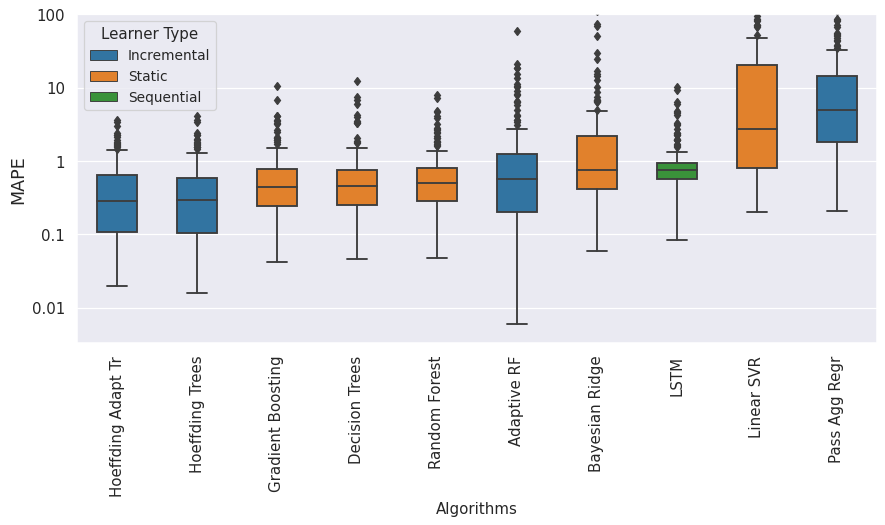

In [ ]:
save_filename = 'fig1'
read_preprocess_plot_graph(exp1_filenames, col_mapper, save_filename, metric_type)

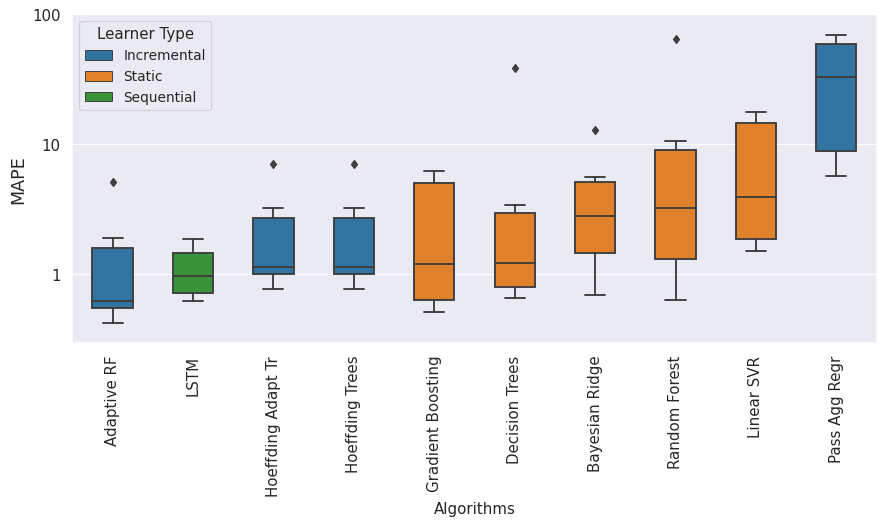

In [ ]:
save_filename = 'fig2'
read_preprocess_plot_graph(exp2_filenames, col_mapper, save_filename,  metric_type)

In [ ]:

!zip -r /content/Plots.zip /content/Plots
from google.colab import files
files.download("/content/Plots.zip")


  adding: content/Plots/ (stored 0%)
  adding: content/Plots/barplot/ (stored 0%)
  adding: content/Plots/barplot/top_selected_country_cases.pdf (deflated 32%)
  adding: content/Plots/boxplots/ (stored 0%)
  adding: content/Plots/boxplots/fig1.pdf (deflated 36%)
  adding: content/Plots/boxplots/fig2.pdf (deflated 31%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>